In [1]:
import spacy
from spacy.language import Language
from spacy import displacy
import time
import re
import math
import statistics
import os
import json
import calendar
from pathlib import Path
from datetime import date
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
from icecream import ic
import hashlib

In [446]:
alias = {"MAUS":"MONTHLY ACTIVE USERS", "ARR":"ANNUAL RECURRING REVENUE", "ARPU":"ACTIVE REVENUE PER USER"}
alias["ANNUAL RECURRING REVENUE ARR"] = "ANNUAL RECURRING REVENUE"
alias["ANNUALIZED RECURRING REVENUE"] = "ANNUAL RECURRING REVENUE"
alias["ANNUALIZED RECURRING REVENUE ARR"] = "ANNUAL RECURRING REVENUE"
alias["NET NEW ARR"] = "NET NEW ANNUAL RECURRING REVENUE"
alias["NET DOLLAR EXPANSION CUSTOMERS WITH MORE THAN 10 EMPLOYEES"] = "NET DOLLAR EXPANSION"
alias["CUSTOMERS CONTRIBUTING MORE THAN $100,000 REVENUE"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS CONTRIBUTING MORE THAN $100,000 TTM REVENUE"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS CONTRIBUTING MORE THAN $100,000 IN REVENUE"] = "LARGE PAID CUSTOMERS"
alias["CUSTOMERS WITH MORE THAN 10 EMPLOYEES"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["NET NEW SUBSCRIPTION CUSTOMERS"] = "NEW PAID CUSTOMERS"
alias["SUBSCRIPTION CUSTOMERS"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["CUSTOMER COUNT"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["CUSTOMERS WITH ARR OVER $100K"] = "LARGE PAID CUSTOMERS"
alias["CASH AND"] = "CASH AND EQUIVALENTS"
alias["CASH EQUIVALENTS"] = "CASH AND EQUIVALENTS"
alias["CASH EQUIVALENTS AND INVESTMENTS"] = "CASH AND EQUIVALENTS"
alias["NON-GAAP DILUTED EPS"] = "EPS"
alias["DILUTED EPS"] = "EPS"
alias["NON-GAAP EPS"] = "EPS"
alias["NET LOSS PER SHARE"] = "GAAP-EPS" #Temp fix, come back
alias["NON-GAAP EARNINGS PER SHARE"] = "EPS"
alias["NET INCOME LOSS) PER SHARE NON-GAAP"] = "EPS"
alias["NET INCOME INCOME) PER SHARE NON-GAAP"] = "EPS"
alias["GAAP DILUTED EPS"] = "GAAP-EPS"
alias["NON-GAAP NET INCOME PER SHARE"] = "EPS"
alias["NET INCOME PER SHARE NON-GAAP"] = "EPS"
alias["GAAP NET INCOME PER SHARE"] = "GAAP-EPS"
alias["GAAP NET INCOME PER BASIC"] = "GAAP-EPS"
alias["NON-GAAP EARNING PER SHARE"] = "EPS"
alias["GAAP EARNING PER SHARE"] = "GAAP-EPS"
alias["REVENUES"] = "REVENUE"
alias["CALCULATED BILLINGS"] = "BILLINGS"
alias["NET INCOME GAAP LOSS"] = "GAAP NET LOSS"
alias["NET INCOME NON-GAAP"] = "NON-GAAP NET INCOME"
alias["NON-GAAP INCOME"] = "NON-GAAP INCOME FROM OPERATIONS"
alias["SUBSCRIPTIONS, SOFTWARE AND REVENUE"] = "SUBSCRIPTIONS, SOFTWARE AND SUPPORT REVENUE"
alias["CORE REVENUE"] = "SUBSCRIPTION AND TRANSACTION REVENUE"
alias["SUBSCRIPTION AND TRANSACTION) REVENUE"] = "SUBSCRIPTION AND TRANSACTION REVENUE"
alias["SC SUBSCRIPTION AND TRANSACTION REVENUE"] = "SUBSCRIPTION AND TRANSACTION REVENUE"
alias["CORE REVENUE SUBSCRIPTION AND TRANSACTION FEES"] = "SUBSCRIPTION AND TRANSACTION REVENUE"
alias["ORGANIC CORE REVENUE"] = "ORGANIC SUBSCRIPTION AND TRANSACTION REVENUE"
alias["ORGANIC REVENUE"] = "ORGANIC SUBSCRIPTION AND TRANSACTION REVENUE"
alias["GROSS PROFIT"] = "GAAP GROSS PROFIT"
alias["CUSTOMERS"] = "TOTAL NUMBER OF CUSTOMERS"
alias["NEW CUSTOMERS GLOBAL BASE"] = "TOTAL NUMBER OF CUSTOMERS"
#alias["GAAP NET LOSS PER BASIC AND DILUTED SHARE"] = "GAAP-EPS"
alias["GAAP NET INCOME PER BASIC AND DILUTED SHARE"] = "GAAP-EPS"
alias["GAAP NET INCOME PER SHARE"] = "GAAP-EPS"
alias["GAAP NET INCOME PER BASIC AND DILUTED SHARE-FULLYEAR"] = "GAAP-EPS-FULLYEAR"
alias["NON-GAAP NET INCOME PER DILUTED SHARE"] = "EPS"
alias["NET INCOME PER SHARE"] = "GAAP-EPS" #Temp fix, come back
alias["NET CASH USED IN OPERATING"] = "OPERATING CASH FLOW"
alias["NET CASH GENERATED FROM OPERATIONS"] = "OPERATING CASH FLOW"
alias["CASH PROVIDED BY OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["CASH GENERATED FROM OPERATIONS"] = "OPERATING CASH FLOW"
alias["NET CASH PROVIDED BY OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["NET CASH FLOW FROM OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["NET CASH USED IN OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["NET CASH PROVIDED BY OPERATING"] = "OPERATING CASH FLOW"
alias["CASH USED IN OPERATING"] = "OPERATING CASH FLOW"
alias["CASH USED IN OPERATIONS"] = "OPERATING CASH FLOW"
alias["CASH USED IN OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["CASH FROM OPERATIONS"] = "OPERATING CASH FLOW"
alias["CASH PROVIDED BY OPERATIONS"] = "OPERATING CASH FLOW"
alias["STOCK AND NON-GAAP INCOME FROM OPERATIONS"] = "NON-GAAP INCOME FROM OPERATIONS"
alias["NON-GAAP INCOME (LOSS) FROM OPERATIONS"] = "NON-GAAP INCOME FROM OPERATIONS"
alias["NET DOLLAR EXPANSION CUSTOMERS WITH GREATER THAN 10 EMPLOYEES"] = "NET DOLLAR EXPANSION"
alias["REVENUE RETENTION"] = "NET DOLLAR EXPANSION"
alias["NET DOLLAR EXPANSION TOTAL NUMBER OF CUSTOMERS"] = "NET DOLLAR EXPANSION"
alias["RETENTION RATE"] = "NET DOLLAR EXPANSION"
alias["SUBSCRIPTION REVENUE RETENTION RATE"] = "NET DOLLAR EXPANSION"
alias["NET REVENUE RETENTION"] = "NET DOLLAR EXPANSION"
alias["NET DOLLAR - BASED RETENTION RATE"] = "NET DOLLAR EXPANSION"
alias["SUBSCRIPTION REVENUE NET DOLLAR EXPANSION"] = "NET DOLLAR EXPANSION"
alias["FREE CASH FLO"] = "FREE CASH FLOW"
alias["CASH FLOW"] = "FREE CASH FLOW"
alias["SUBSCRIPTIONS REVENUE SALES SAAS"] = "SUBSCRIPTIONS REVENUE"
alias["ADJUSTED EBITDA LOSS"] = "ADJUSTED EBITDA"
alias["NON - GAAP SUBSCRIPTION GROSS MARGIN"] = "NON-GAAP SUBSCRIPTION GROSS MARGIN"
alias["NON - GAAP LOSS FROM OPERATIONS"] = "NON-GAAP LOSS FROM OPERATIONS"
alias["NON - GAAP NET LOSS"] = "NON-GAAP NET LOSS"
alias["NON - GAAP NET INCOME PER SHARE"] = "EPS"
alias["INCOME FROM OPERATIONS"] = "GAAP INCOME FROM OPERATIONS"
alias["NET LOSS"] = "GAAP NET LOSS"
alias["NET INCOME"] = "GAAP NET INCOME"
alias["NON - GAAP GROSS PROFIT"] = "NON-GAAP GROSS PROFIT"
alias["OTRANSACTION FEES"] = "TRANSACTION FEES"
alias["OSUBSCRIPTION FEES"] = "SUBSCRIPTION FEES"
alias["REVENUE MILLIONS"] = "REVENUE"
alias["PAYMENT VOLUME TPV"] = "PAYMENT VOLUME"
alias["TPV PAYMENT VOLUME"] = "PAYMENT VOLUME"
alias["ADJUSTED EBITDA MARGIN"] = "NON-GAAP EBITDA MARGIN"
alias["ANNUAL RUN-RATE REVENUE ARR"] = "ANNUAL RECURRING REVENUE"
alias["ADJUSTED GROSS PROFIT"] = "NON-GAAP GROSS PROFIT"
alias["ADJUSTED EBITDA"] = "NON-GAAP EBITDA"
alias["NET DOLLAR RETENTION NDR"] = "NET DOLLAR EXPANSION"
alias["AVERAGE REVENUE PER CUSTOMER ARPU"] = "ACTIVE REVENUE PER USER"
alias["CAPITAL EXPENDITURES AS A PERCENTAGE OF REVENUE"] = "CAPEX AS A PERCENTAGE OF REVENUE"
alias["NET DOLLAR RETENTION"] = "NET DOLLAR EXPANSION"
alias["AVERAGE REVENUE PER CUSTOMER"] = "ACTIVE REVENUE PER USER"
alias["OPERATING MARGIN"] = "GAAP OPERATING MARGIN"
alias["NON-GAAP DILUTED NET INCOME PER SHARE"] = "EPS"
alias["CASH FLOW FROM OPERATIONS"] = "OPERATING CASH FLOW"
alias["CONFLUENT CLOUD"] = "CONFLUENT CLOUD REVENUE"
alias["CUSTOMERS WITH $100,000 ARR"] = "LARGE PAID CUSTOMERS"
alias["REMAINING PERFORMANCE"] = "REMAINING PERFORMANCE OBLIGATIONS"
alias["FREE CASH"] = "FREE CASH FLOW"
alias["NET RETENTION RATE"] = "NET DOLLAR EXPANSION"
alias["NON-GAAP GROSS-MARGIN"] = "NON-GAAP GROSS MARGIN"
alias["DOLLAR-BASED NET RETENTION"] = "NET DOLLAR EXPANSION"
alias["NET RETENTION"] = "NET DOLLAR EXPANSION"
alias["OPERATING INCOME GAAP LOSS FROM OPERATIONS"] = "GAAP LOSS FROM OPERATIONS"
alias["CASH FLOW FROM OPERATING ACTIVITIES"] = "OPERATING CASH FLOW"
alias["NON-GAAP NET INCOME (LOSS) PER SHARE"] = "EPS"
alias["TOTAL NUMBER OF CUSTOMERS"] = "TOTAL NUMBER OF PAID CUSTOMERS"
alias["TOTAL NUMBER OF LARGE CUSTOMERS"] = "LARGE PAID CUSTOMERS"
alias["TOTAL LARGE CUSTOMERS"] = "LARGE PAID CUSTOMERS"
alias["ADJUSTED EBITDA2"] = "NON-GAAP EBITDA"
alias["NON-GAAP NET INCOME2"] = "NON-GAAP NET INCOME"
alias["GAAP NET INCOME PER DILUTED SHARE"] = "GAAP-EPS"
alias["ADJUSTED EBITDA1"] = "NON-GAAP EBITDA"
alias["NON-GAAP NET INCOME1"] = "NON-GAAP NET INCOME"
alias["NON-GAAP NET INCOME(1"] = "NON-GAAP NET INCOME"
alias["ADJUSTED EBITDA(1"] = "NON-GAAP EBITDA"
alias["ANNUAL REVENUE RETENTION RATE"] = "ANNUAL CLIENT RETENTION RATE"
alias["REVENUE RETENTION RATE"] = "ANNUAL CLIENT RETENTION RATE"
alias["CLIENT COUNT"] = "TOTAL NUMBER OF PAID CUSTOMERS"
print(alias)

excludeMetric = list()
excludeMetric.append("OPERATING INCOME AND MARGIN NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("INCOME FROM OPERATIONS AND OPERATING MARGIN STOCK-BASED COMPENSATION")
excludeMetric.append("NON-GAAP")
excludeMetric.append("NON-GAAP SALES")
excludeMetric.append("OTHER INCOME")
excludeMetric.append("CAPITAL EXPENDITURES")
excludeMetric.append("STOCK-BASED COMPENSATION")
excludeMetric.append("NON-GAAP SALES AND MARKETING")
excludeMetric.append("INCOME TAXES")
excludeMetric.append("NON-GAAP AND OTHER INCOME")
excludeMetric.append("SENIOR NOTES")
excludeMetric.append("GAAP")
excludeMetric.append("CASH IN OPERATING")
excludeMetric.append("GAAP AND NON-GAAP NET LOSS")
excludeMetric.append("ARR NET NEW")
excludeMetric.append("ARR AND NET NEW")
excludeMetric.append("BROAD-BASED DEMAND")
excludeMetric.append("ENDING ARR")
excludeMetric.append("STOCK")
excludeMetric.append("SPEND MANAGEMENT REVENUE")
excludeMetric.append("TOP-LINE")
excludeMetric.append("STOCK TRANSACTIONS AND")
excludeMetric.append("STOCK-BASED COMPENSATION AND SALES STOCK")
excludeMetric.append("EFFECTIVE INCOME TAX RATE")
excludeMetric.append("NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("REVENUES NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("ADJUSTED EBITDA NET INCOME INTEREST EXPENSE AND NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("FAIR VALUE NON-GAAP NET INCOME NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("GROSS MARGIN PROFIT NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("FAIR VALUE GROSS PROFIT NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("PER DILUTED SHARE")
excludeMetric.append("INTEREST EXPENSE NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("FAIR VALUE NON-GAAP NET INCOME")
excludeMetric.append("RESEARCH AND DEVELOPMENT NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("REVENUE AND ADJUSTED EBITDA")
excludeMetric.append("HEADCOUNT RECURRING REVENUE")
excludeMetric.append("RECURRING REVENUE HEADCOUNT")
excludeMetric.append("CLIENTS HEADCOUNT SOCIAL SECURITY CARES")
excludeMetric.append("NON-CASH STOCK-BASED COMPENSATION ADJUSTED EBITDA MARGIN REVENUES AND REVENUE")
excludeMetric.append("GROSS PROFIT NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("INTEREST EXPENSE AND NON-CASH STOCK-BASED COMPENSATION")
excludeMetric.append("NON-CASH STOCK-BASED COMPENSATION ADJUSTED EBITDA MARGIN REVENUES REVENUE")
print(excludeMetric)

paraBreak = "PG*** "
print(paraBreak)

sectionStart = "SC*** "
print(sectionStart)

sepBreak = ": "
print(sepBreak)

dsep = ":"
print(dsep)

fiscalTag = "FULLYEAR"
print(fiscalTag)

maxMetricLen = 10
print(maxMetricLen)

maxGraphCnt = 12
print(maxGraphCnt)

moneyType = ["REVENUE", "EPS"]
print(moneyType)

millnames = ['','T','MN','BN','TN']
print(millnames)

cdType = ["MAUS", "MAU"]
print(cdType)

unitSkip = ["PER SHARE", "ARPU"]
print(unitSkip)

posBias = ["EXPENSE", "EXPENSES", "DEBT"]
print(posBias)

famousInst = ["FISHER","COOPERMAN","ARK","BAILLIE GIFFORD","BERKSHIRE","GOLDMAN SACHS","SUSQUEHANNA","MORGAN STANLEY","RENAISSANCE","JP MORGAN"]
print(famousInst)

{'MAUS': 'MONTHLY ACTIVE USERS', 'ARR': 'ANNUAL RECURRING REVENUE', 'ARPU': 'ACTIVE REVENUE PER USER', 'ANNUAL RECURRING REVENUE ARR': 'ANNUAL RECURRING REVENUE', 'ANNUALIZED RECURRING REVENUE': 'ANNUAL RECURRING REVENUE', 'ANNUALIZED RECURRING REVENUE ARR': 'ANNUAL RECURRING REVENUE', 'NET NEW ARR': 'NET NEW ANNUAL RECURRING REVENUE', 'NET DOLLAR EXPANSION CUSTOMERS WITH MORE THAN 10 EMPLOYEES': 'NET DOLLAR EXPANSION', 'CUSTOMERS CONTRIBUTING MORE THAN $100,000 REVENUE': 'LARGE PAID CUSTOMERS', 'CUSTOMERS CONTRIBUTING MORE THAN $100,000 TTM REVENUE': 'LARGE PAID CUSTOMERS', 'CUSTOMERS CONTRIBUTING MORE THAN $100,000 IN REVENUE': 'LARGE PAID CUSTOMERS', 'CUSTOMERS WITH MORE THAN 10 EMPLOYEES': 'TOTAL NUMBER OF PAID CUSTOMERS', 'NET NEW SUBSCRIPTION CUSTOMERS': 'NEW PAID CUSTOMERS', 'SUBSCRIPTION CUSTOMERS': 'TOTAL NUMBER OF PAID CUSTOMERS', 'CUSTOMER COUNT': 'TOTAL NUMBER OF PAID CUSTOMERS', 'CUSTOMERS WITH ARR OVER $100K': 'LARGE PAID CUSTOMERS', 'CASH AND': 'CASH AND EQUIVALENTS', 'C

In [3]:
def millify(n):
    n = float(n)
    millidx = max(0,min(len(millnames)-1,
                        int(math.floor(0 if n == 0 else math.log10(abs(n))/3))))

    return '{:.0f}{}'.format(n / 10**(3 * millidx), millnames[millidx])

In [4]:
def getOrgData(org):
    orgDataPath = "../../Summary/orgData/"+org+".txt"
    file = Path(orgDataPath)
    if file.is_file():
        #print(True)
        with open(orgDataPath) as f:
            data = json.load(f)
        #print(data)
        return data
    return None

In [5]:
def getOrgAttr(orgData, attr):
    if not orgData:
        return None
    asplit = attr.split("|")
    parent = asplit[0]
    if "SOURCE" in orgData[parent]:
        src = orgData[parent]["SOURCE"]
        if src == "YH" or (parent == "ORGPROFILE" and src == "AD"):
            p = orgData
            for i in range(0, len(asplit)):
                if asplit[i] not in p:
                    return None
                p = p[asplit[i]]
            #print(p)
            return(p)
    return None

In [6]:
def getOrgEst(orgData, attr):
    if not orgData:
        return None
    newAttr = "ANALYSIS|"+attr+"-EST"
    val = getOrgAttr(orgData, newAttr)
    return(val)

In [7]:
data = getOrgData("PINS")
val = getOrgAttr(data, "ORGPROFILE|FiscalYearEnd")
print(val)
dobj = datetime.strptime(val, "%B")
print(dobj.month)

December
12


In [8]:
def getQtrs(org, edate, fynd):
    #print(edate)
    dateObj = datetime.strptime(edate, '%Y-%m-%d')
    #print(dateObj.month)
    emonth = dateObj.month
    eyr = dateObj.year
    k = 1
    qend = fynd
    qstart = 0
    year = eyr
    #print(year)
    qtrs = dict()
    while(k!=5):
        #print(k)
        qstart = (qend + 1)%12
        qend = (qend + 3)%12
        if qstart == 0:
            qstart = 12
        if qend == 0:
            qend = 12
        if((emonth >= qstart and emonth <= qend) or (qstart > qend and (emonth >= qstart or emonth <= qend))):
            #print("CQTR:", "Q"+str(k))
            qtrs["CQTR"] = "Q"+str(k)
            qtrs["GQTR"] = "Q"+str(k) # Guidance qtr is same as current qtr
            qtrs["CYR"] = str(year)
            qtrs["GYR"] = str(year) # Guidance year same as current year
            eqtr = (k-1)%4
            if(eqtr == 0):
                eqtr = 4
            nqtr = (k+1)%4
            if(nqtr == 0):
                nqtr = 4
            pqtr = (k-2)%4
            if(pqtr == 0):
                pqtr = 4
            qtrs["EQTR"] = "Q"+str(eqtr)
            qtrs["PQTR"] = "Q"+str(pqtr)
            #print("EQTR:", "Q"+str(eqtr))
            #print("PQTR:", "Q"+str(pqtr))
            #print("NQTR:", "Q"+str(nqtr))
        #print("Q"+str(k), "START", qstart)
        #print("Q"+str(k), "END", qend)
        qtr = "Q"+str(k)
        if (qtr not in qtrs):
            qtrs[qtr] = dict()
        qtrs[qtr]["START"] = qstart
        qtrs[qtr]["SM"] = calendar.month_abbr[qstart].upper()
        qtrs[qtr]["END"] = qend
        qtrs[qtr]["EM"] = calendar.month_abbr[qend].upper()
        #print("Q"+str(k), "YEAR", year)
        k = k + 1
    
    #print(eyr)   
    if("EQTR" in qtrs and "CQTR" in qtrs and "PQTR" in qtrs):
        eqtrEnd = qtrs[qtrs["EQTR"]]["END"]
        cqtrEnd = qtrs[qtrs["CQTR"]]["END"]
        pqtrEnd = qtrs[qtrs["PQTR"]]["END"]
        #print(eqtrEnd, cqtrEnd, pqtrEnd)
        qtrs["EYR"] = str(eyr)
        qtrs["PYR"] = str(eyr)
        #print(eqtrEnd, cqtrEnd, qtrs[qtrs["CQTR"]]["START"], qtrs[qtrs["CQTR"]]["END"])
        if(eqtrEnd > cqtrEnd):
            if(qtrs[qtrs["CQTR"]]["START"] > qtrs[qtrs["CQTR"]]["END"] and emonth > fynd):
                gyr = year + 1
                qtrs["GYR"] = str(gyr)
                qtrs["EYR"] = str(gyr - 1)
            else:
                qtrs["EYR"] = str(eyr - 1)
                qtrs["PYR"] = str(eyr - 1)
        if(pqtrEnd > eqtrEnd):
            qtrs["PYR"] = str(int(qtrs["EYR"]) - 1)
    if(emonth <= fynd):
        qtrs["CFYR"] = str(year)
    else:
        qtrs["CFYR"] = str(year + 1)
    qtrs["FYR"] = qtrs["CFYR"]
    if(qtrs[qtrs["EQTR"]]["END"] <= fynd and qtrs["EQTR"] > qtrs["CQTR"]):
        qtrs["FYR"] = str(int(qtrs["FYR"]) - 1)
    qtrs["EFYR"] = qtrs["FYR"]
    qtrs["PFYR"] = qtrs["FYR"]
    if(qtrs["PQTR"] > qtrs["EQTR"]):
        qtrs["PFYR"] = str(int(qtrs["FYR"]) - 1)
    qtrs["GFYR"] = qtrs["CFYR"]
    #qtrs["EYR"] = qtrs["FYR"]
    #qtrs["CYR"] = qtrs["CFYR"]
    #qtrs["PYR"] = qtrs["FYR"]
    qtrs["CYR"] = qtrs["GYR"]
    #print(qtrs)
    return (qtrs)

In [9]:
#getQtrs("PINS", "2021-10-20", 12)
#getQtrs("ZM", "2021-11-22", 1)
#getQtrs("PINS", "2021-01-22", 12)
getQtrs("CRWD","2019-07-19", 1)

{'Q1': {'START': 2, 'SM': 'FEB', 'END': 4, 'EM': 'APR'},
 'CQTR': 'Q2',
 'GQTR': 'Q2',
 'CYR': '2019',
 'GYR': '2019',
 'EQTR': 'Q1',
 'PQTR': 'Q4',
 'Q2': {'START': 5, 'SM': 'MAY', 'END': 7, 'EM': 'JUL'},
 'Q3': {'START': 8, 'SM': 'AUG', 'END': 10, 'EM': 'OCT'},
 'Q4': {'START': 11, 'SM': 'NOV', 'END': 1, 'EM': 'JAN'},
 'EYR': '2019',
 'PYR': '2019',
 'CFYR': '2020',
 'FYR': '2020',
 'EFYR': '2020',
 'PFYR': '2019',
 'GFYR': '2020'}

In [10]:
def isLatestQtr(csym, qstr):
    today = datetime.today().strftime('%Y-%m-%d')
    orgData = getOrgData(csym)
    if orgData:
        val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
        if(val):
            dobj = datetime.strptime(val, "%B")
            fynd = (dobj.month)
            qtrs = getQtrs(csym, today, fynd)
            cstr = qtrs["CQTR"]+"-"+qtrs["CFYR"]
            estr = qtrs["EQTR"]+"-"+qtrs["EFYR"]
            print("CSTRRRRRRRRRRRRRR", cstr, "ESTRRRRRRRRRRRRRRRR", estr, "QSTRRRRRRRRRR", qstr)
            if(qstr == cstr or qstr == estr):
                return(True)
    return False

In [11]:
def getCurrency(csym):
    orgData = getOrgData(csym)
    if not orgData:
        currency = "$"
    currency = getOrgAttr(orgData, "ORGPROFILE|Currency")
    if not currency:
        currency = "$"
    elif currency == "USD":
        currency = "$"
    return currency

In [12]:
def getMetricTbl(tbls, tblType, metric):
    if "PARSESUCCESS" not in tbls:
        return None
    for i,v in enumerate(tbls["PARSESUCCESS"]):
        #print(v)
        if str(v) in tbls and "PARSE" in tbls[str(v)]:
            parse = tbls[str(v)]["PARSE"]
            for j,k in enumerate(parse):
                tType = k["TABLENAME"]
                #unit = k["UNIT"]
                if(tType == tblType):
                    if(metric and metric in k["METRICS"]):
                        return k
                    elif not metric: #return entire table
                        return k
                    #print(k["METRICS"])
                    #tbl = pd.read_json(k["TABLE"])
                    #break
    return None

In [13]:
def getMetricVal(tb, metric):
    if(tb is not None):
        tbl = pd.read_json(tb["TABLE"])
        unit = tb["UNIT"]
        index = list(tbl["METRIC"]).index(metric)
        val = tbl.iloc[index,1]
        val = str(val).replace(",","")
        #if "PER SHARE" not in metric and "ARPU" not in metric:
        if all(x not in metric for x in unitSkip):
            if unit == "T":
                temp = re.findall('\d*\.?\d+', (val))
                if(len(temp) > 0):
                    nval = float(temp[0]) * 10**3
                    if(not str(val)[0].isdigit()):
                        val = str(val)[0]+millify(nval)
                    else:
                        val = millify(nval)
                else:
                    val = str(val)+unit
            else:
                if(unit == "M"):
                    val = str(val)+"MN"
                else:
                    val = str(val)+"BN"
        #print(tbl.iloc[index,1])
        return val
    return None

In [14]:
def fillEntity(metric, val, mtype, eqtr, moreEntity, metricType=None):
    sentence = metric+" is " + str(val) + " in " + eqtr
    moreEntity[metric] = list()
    moreEntity[metric].append(("-1","LINE",-1,-1))
    moreEntity[metric].append(("REGULAR","SECTION",-1,-1))
    moreEntity[metric].append((str(val),mtype,-1,-1))
    moreEntity[metric].append((eqtr,"CALENDAR",-1,-1))
    if(metricType):
        moreEntity[metric].append((metricType,"METRICTYPE",-1,-1))
    moreEntity[metric].append((sentence,"SENTENCE",-1,-1))
    return moreEntity

In [15]:
def getMetric(tbls, tblType, metric):
    tb = getMetricTbl(tbls, tblType, metric)
    if tb:
        val = getMetricVal(tb,metric)
        return val
    return None

In [16]:
def getAllMetrics(tbls, tblType, eqtr, moreEntity):
    tb = getMetricTbl(tbls, tblType, None)
    metricType = None
    opmetrics = list()
    if tb:
        if(tblType == "OPMETRIC"):
            metricType = tblType
            opmetrics = opmetrics + tb["METRICS"]
        #print(tb["METRICS"])
        for i,metric in enumerate(tb["METRICS"]):
            val = getMetricVal(tb,metric)
            if val:
                mtype = "MONEY"
                if any(x in metric for x in cdType):
                    mtype = "CD"
                newMetric = metric
                for aval in alias:
                    if aval in metric:
                        newMetric = newMetric.replace(aval, alias[aval])
                        opmetrics.append(newMetric)
                        #print(newMetric)
                moreEntity = fillEntity(newMetric,str(val),mtype,eqtr,moreEntity,metricType)
    opmetrics = (list(set(opmetrics)))
    return moreEntity, opmetrics

In [17]:
def getOtherEntitiesFromTbls(csym, filename, eqtr):
    newFilename = filename.replace(csym, csym+"-REPORT")
    tblDest = "../../Summary/report/"+newFilename+".txt"
    opmetricFile = "../../Summary/OTHER/opmetric.json"
    moreEntity = dict()
    opmetrics = list()
    #print(tblDest)
    
    epsStr = "NON-GAAP NET INCOME PER SHARE"
    revStr = "REVENUE"
    spcTbl = "OPMETRIC"
    tbls = None
    
    file = Path(tblDest)
    if file.is_file():
        with open(tblDest) as f:
            tbls = json.load(f)
        #print(tbls["PARSESUCCESS"])
    if not tbls:
        return(moreEntity)
    
    opFile = Path(opmetricFile)
    if opFile.is_file():
        with open(opmetricFile) as f:
            opmetrics = json.load(f)
    
    val = getMetric(tbls, "ACCOUNTING", epsStr)
    if(val):
        moreEntity = fillEntity("EPS",str(val),"MONEY",eqtr,moreEntity)
    
    val = getMetric(tbls, "STMTOP", revStr)
    #print(val)
    if(val):
        moreEntity = fillEntity("REVENUE",str(val),"MONEY",eqtr,moreEntity)
    else:
        val = getMetric(tbls, "STMTOP", "TOTAL "+revStr)
        if(val):
            moreEntity = fillEntity("REVENUE",str(val),"MONEY",eqtr,moreEntity)
    
    moreEntity, newOpmetrics = getAllMetrics(tbls, spcTbl, eqtr, moreEntity)
    
    opmetrics = list(set(opmetrics + newOpmetrics))
    
    json_object = json.dumps(opmetrics, indent = 4)
  
    # Writing to sample.json
    with open(opmetricFile, "w") as outfile:
        outfile.write(json_object)
    
    return(moreEntity)

In [18]:
getOtherEntitiesFromTbls("PINS", "PINS-2021-11-04_12-53-41.533916", "Q3")

{'EPS': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$0.28', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),
  ('EPS is $0.28 in Q3', 'SENTENCE', -1, -1)],
 'REVENUE': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$633MN', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),
  ('REVENUE is $633MN in Q3', 'SENTENCE', -1, -1)],
 'REVENUE - GLOBAL': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$633MN', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),
  ('OPMETRIC', 'METRICTYPE', -1, -1),
  ('REVENUE - GLOBAL is $633MN in Q3', 'SENTENCE', -1, -1)],
 'REVENUE - UNITED STATES': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$498MN', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),
  ('OPMETRIC', 'METRICTYPE', -1, -1),
  ('REVENUE - UNITED STATES is $498MN in Q3', 'SENTENCE', -1, -1)],
 'REVENUE - INTERNATIONAL': [('-1', 'LINE', -1, -1),
  ('REGULAR', 'SECTION', -1, -1),
  ('$135MN', 'MONEY', -1, -1),
  ('Q3', 'CALENDAR', -1, -1),


In [57]:
def splitSentences(nlp, sent, lner, addPrefix=None, splSection=None, tblTitle=None):
    ss = list()
    doc = nlp(sent)
    
    date = None
    
    if(len(lner) > 0 and lner[0][1] == "DATE"):
        date = lner[0][0]

    #for i,token in enumerate(doc):
    #    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
    #            token.conjuncts, token.shape_, token.is_alpha, token.is_stop, i)
    #print(sent)
    #print("\n")
    start = -1
    end = -1
    prev_start = -1
    prev_chunk = None
    curr_chunk = None
    first = False
    prefix = None

    for chunk in doc.noun_chunks:
        #print(chunk.text, chunk.root.text, chunk.root.dep_,
        #        chunk.root.head.text)
        #print(chunk.text, chunk.root.dep_, chunk.start, chunk.end)
    
        if chunk.root.dep_ == "nsubj" or chunk.root.dep_ == "nsubjpass":
            #print(chunk.text, chunk.root.dep_, chunk.start, chunk.end)
        
            start = chunk.start
            if not first:
                if start > 0:
                    if(date and date in str(doc[0:start])):
                        prefix = date
                    start = 0
                first = True
                
            curr_chunk = chunk
            verb_cnt = 0
            if prev_start != -1:
                end = start
            if(end!=-1):
                #print(prev_start,end, start, doc[prev_start:end])
                text = None
                if prev_chunk:
                    text = prev_chunk.text
                sc = prev_start
                ec = -1
                pc = -1
                for i in range(prev_start,end):
                    token = doc[i]
                    if(token.pos_ == "VERB"):
                        verb_cnt = verb_cnt + 1
                    if(token.dep_ == "conj" and verb_cnt > 1 and token.pos_ == "VERB" and token.tag_ != "VB"):
                        #print(token.text,i)
                        ec = i
                        if (text): 
                            if(text in str(doc[sc:ec])):
                                #print(sc,ec,doc[sc:ec])
                                ss.append(str(doc[sc:ec]))
                            else:
                                #print(sc,ec, text + " " + str(doc[sc:ec]))
                                ss.append(text + " " + str(doc[sc:ec]))
                        else:
                            #print(sc,ec,doc[sc:ec])
                            ss.append(str(doc[sc:ec]))
                        sc = ec
                #if(sc>0 and sc!=prev_start):
                if(sc>=0):
                    #text = chunk.text
                    fnd = False
                    for f in range(sc,end):
                        token = doc[f]
                        #print(token, token.pos_, token.dep_, token.tag_)
                        if(token.tag_ == "VBP" or token.tag_ == "VBD"):
                            fnd = True
                            break
                        if(token.pos_ == "VERB" and token.tag_ != "VB"):
                            fnd = True
                            break
                    if(fnd):
                        if(text):
                            if (text in str(doc[sc:end])):
                                #print(sc,end,doc[sc:end])
                                ss.append(str(doc[sc:end]))
                            else:
                                #print(sc,end, text + " " + str(doc[sc:end]))
                                ss.append(text + " " + str(doc[sc:end]))
                        else:
                            #print(sc,end,doc[sc:end])
                            ss.append(str(doc[sc:end]))
                    else:
                        if(text and text in str(doc[sc:end])):
                            if(prefix):
                                prefix = prefix + " " + str(doc[sc:end])
                            else:
                                prefix = str(doc[sc:end])
                        else:
                            if(prefix):
                                prefix = prefix + " " + text + " " + str(doc[sc:end])
                            else:
                                prefix = text + " " + str(doc[sc:end])
            prev_start = start
            prev_chunk = chunk
    
    if(start >= 0):
        #print(prev_start,len(doc), start, doc[start:len(doc)])
        text = curr_chunk.text
        end = len(doc)
        sc = prev_start
        ec = -1
        pc = -1
        verb_cnt = 0
        for i in range(prev_start,end):
            token = doc[i]
            if(token.pos_ == "VERB"):
                verb_cnt = verb_cnt + 1
            #text = token.text
            if(token.dep_ == "conj" and verb_cnt > 1 and token.pos_ == "VERB" and token.tag_ != "VB"):
                #print(token.text,i)
                ec = i
                fnd = False
                for f in range(sc,ec):
                    token = doc[f]
                    #print(token, token.pos_, token.dep_, token.tag_)
                    if(token.tag_ == "VBP" or token.tag_ == "VBD"):
                        fnd = True
                        break
                    if(token.pos_ == "VERB" and token.tag_ != "VB"):
                        fnd = True
                        break
                if(fnd):
                    if curr_chunk.root.dep_ == "nsubj" or curr_chunk.root.dep_ == "nsubjpass" and text == str(doc[sc:ec]):
                        if(not prefix):
                            prefix = str(doc[sc:ec])
                        else:
                            prefix = prefix + " " + str(doc[sc:ec])
                        #print("HELLO20", ss, prefix)
                    elif (text): 
                        if(text in str(doc[sc:ec])):
                            #print("HELLO", token.text, token.pos_, token.dep_)
                            #print(sc,ec,doc[sc:ec])
                            #if(prefix and prefix not in str(doc[sc:ec])):
                            if(prefix):
                                ss.append(prefix + " " + str(doc[sc:ec]))
                            else:
                                ss.append(str(doc[sc:ec]))
                            #ss.append(str(doc[sc:ec]))
                        else:
                            #print("HELLO1")
                            #print(sc,ec, text + " " + str(doc[sc:ec]))
                            ss.append(text + " " + str(doc[sc:ec]))
                    else:
                        #print("HELLO2")
                        #print(sc,ec,doc[sc:ec])
                        #if(prefix and prefix not in str(doc[sc:ec])):
                        if(prefix):
                            ss.append(prefix + " " + str(doc[sc:ec]))
                        else:
                            ss.append(str(doc[sc:ec]))
                        #ss.append(str(doc[sc:ec]))
                else:
                    if(text and text in str(doc[sc:ec])):
                        if(prefix):
                            prefix = prefix + " " + str(doc[sc:ec])
                        else:
                            prefix = str(doc[sc:ec])
                    else:
                        if(prefix):
                            prefix = prefix + " " + text + " " + str(doc[sc:ec])
                        else:
                            prefix = text + " " + str(doc[sc:ec])
                sc = ec
            #if(sc>0 and sc!=prev_start):
        if(sc>=0):
            #text = token.text
            if (text):
                if (text in str(doc[sc:end])):
                    #print("HELLO3")
                    #print(sc,end,doc[sc:end])
                    #if(prefix and prefix not in str(doc[sc:end])):
                    if(prefix):
                        ss.append(prefix + " " + str(doc[sc:end]))
                    else:
                        ss.append(str(doc[sc:end]))
                else:
                    #print("HELLO4")
                    #print(sc,end, text + " " + str(doc[sc:end]))
                    #if(prefix and prefix not in str(doc[sc:end])):
                    if(prefix):
                        ss.append(prefix + " " + text + " " + str(doc[sc:end]))
                    else:
                        ss.append(text + " " + str(doc[sc:end]))
                    #ss.append(text + " " + str(doc[sc:end]))
            else:
                #print("HELLO5")
                #print(sc,end,doc[sc:end])
                #if(prefix and prefix not in str(doc[sc:end])):
                if(prefix):
                    ss.append(prefix + " " + str(doc[sc:end]))
                else:
                    ss.append(str(doc[sc:end]))

    #print("\n")
    if (len(ss) == 0):
        ss.append(sent)
    
    newss = list()
    if(addPrefix):
        addPrefix = addPrefix.replace("PG*** ","")
    for s in ss:
        if(addPrefix and addPrefix not in s):
            #s = addPrefix + ": " + s
            s = s + " :" + addPrefix
        if(splSection and splSection.upper() not in s.upper()):
            #s = splSection + " " + s
            s = s + " " + splSection
        if(tblTitle and tblTitle.upper() not in s.upper()):
            #s = tblTitle + " " + s
            s = s + " " + tblTitle
        newss.append(s)
    
    #print("PREFIXXXXXXXXXX\n", addPrefix)
    print("Sentences\n", newss)
    return newss

In [341]:
def is_attr_for_metric(metric, attr, doc):
    if attr[1] == "LOC":
        value = attr[0]
        start = attr[2]
        end = attr[3]
        for chunk in doc.noun_chunks:
            if((value in chunk.text and start >= chunk.start and end <= chunk.end)):
                if(chunk.root.dep_ == "nsubj"):
                    return False
    return True

def is_earningReportLine(sent):
    words1 = ["Announces", "Reports", "Releases", "Increase", "Raises", "Announced", "Reported"]
    words2 = ["Earnings", "Results"]
    if any(word.upper() in sent.upper() for word in words1) and any(word.upper() in sent.upper() for word in words2):
        #print(True)
        return True
    return False

def get_section(text):
    
    todays_date = date.today()
    year = todays_date.year
    sy = str(year)[2:4]
    sfy = str(year)
    pfy = str(year-1)
    
    table = ["following table", "CONSOLIDATED BALANCE SHEETS", "CONSOLIDATED STATEMENTS OF OPERATIONS", "CONDENSED CONSOLIDATED"]
    guide = ["expected to", "will grow", "will decline", "forecast", "is expected", "financial guidance", "financial targets", "following guidance"]
    compare = ["compared with", "compared to", "up from"]
    fullfiscal = ["FISCAL YEAR 2020", "FISCAL YEAR "+sfy, "FISCAL YEAR "+pfy, "FISCAL "+sfy, "FISCAL "+pfy, "FY"+sy, "Annual", "Full Fiscal", "FULL FISCAL", "FULL YEAR", "FOR THE FULL YEAR", "FOR THE FISCAL YEAR", "FULL YEAR FISCAL", "for the year ended"]
    nocheck = ["QUARTER", "Q1", "Q2", "Q3", "Q4"]
    
    if is_earningReportLine(text):
        return "EARNING"
    
    if(any(word.upper() in text.upper() for word in fullfiscal) and not any(word.upper() in text.upper() for word in nocheck)):
        if(any(word.upper() in text.upper() for word in guide)):
            return "GUIDEFULL"
        if(any(word.upper() in text.upper() for word in compare)):
            return "COMPAREFULL"
        return "REGULARFULL"
    
    if(any(word.upper() in text.upper() for word in guide)):
        return "GUIDE"
    
    if(any(word.upper() in text.upper() for word in table)):
        return "TABLE"
    
    if(any(word.upper() in text.upper() for word in compare)):
        return "COMPARE"
    
    return "REGULAR"

def is_found_param(v):
    if v[1] == "MONEY" or v[1] == "PCT" or v[1] == "CD" or v[1] == "CHG":
        return True
    return False

def is_valid_param(v):
    if v[1] == "CS" or v[1] == "PER" or v[1] == "ROLE":
        return False
    if(v[0] == "NOPAD"):
        return False
    return True

def get_metric(metric_arr, doc):
    global alias
    metric = ""
    end = -1
    if(len(metric_arr) == 0):
        return None
    if(len(metric_arr) == 1):
        #if metric_arr[0][0] in alias:
        #    return alias[metric_arr[0][0]]
        #return(metric_arr[0][0])
        end = str(doc[metric_arr[0][2]])
        if(end != ":"):
            return(metric_arr[0][0])
        else:
            return None
    else:
        metric = metric_arr[0][0]
        #if metric in alias:
        #    metric = alias[metric]
        for i,v in enumerate(metric_arr):
            start = v[2]
            end = -1
            sep = " "
            if i+1 < len(metric_arr):
                #print(metric_arr[i+1])
                end = metric_arr[i+1][1]
            #print(start, end)
            if end != -1:
                for index, token in enumerate(doc):
                    if(index < start):
                        continue
                    elif(index > end):
                        break
                    else:
                        if (token.text.upper() == "AND"):
                            sep = " AND "
                            break
                        elif (token.text.upper() == ":" and ((end-start) <= 2)):
                            sep = None
                            metric = metric_arr[i+1][0]
                            #if metric in alias:
                            #    metric = alias[metric]
                            break
                if sep:
                    metric = metric + sep + metric_arr[i+1][0]
                    #if metric_arr[i+1][0] in alias:
                    #    metric = metric + sep + alias[metric_arr[i+1][0]]
                    #else:
                    #    metric = metric + sep + metric_arr[i+1][0]
            #else:
            #    metric = metric + sep + v[0]
    return(metric)

def insert_other_items(entity, v):
    if(v[1] == "ORG"):
        if("ORG" not in entity):
            entity["ORG"] = list()
        entity["ORG"].append(v[0].upper())
    elif(v[1] == "MISC"):
        if("MISC" not in entity):
            entity["MISC"] = list()
        entity["MISC"].append(v[0].upper())
    elif(v[1] == "SYM"):
        if("SYM" not in entity):
            entity["SYM"] = list()
        entity["SYM"].append(v[0].upper())
    elif(v[1] == "CALENDAR"):
        if("CALENDAR" not in entity):
            entity["CALENDAR"] = list()
        if "YEAR" not in v[0].upper():
            entity["CALENDAR"].append(v[0].upper())
    elif(v[1] == "DATE"):
        if("DATE" not in entity):
            entity["DATE"] = list()
        entity["DATE"].append(v[0].upper())
    return(entity)

def is_metric_subj(v, prev_metric, entity, doc, section, e):
    metric = v[0]
    start = v[2]
    end = v[3]
    #found = False
    
    if section == "TABLE":
        #print("HELLLOOOOOO111111")
        return True
    
    if not prev_metric:
        #print("HELLLOOOOOO")
        return True
    
    for chunk in doc.noun_chunks:
        #print(chunk.text, chunk.root.dep_)
        if((metric in chunk.text and end <= chunk.end) or (chunk.text in metric and chunk.start >= start and chunk.end <= end)):
            #print(chunk.text, chunk.root.dep_, metric, chunk.start, chunk.end)
            if(chunk.root.dep_ == "ROOT" or chunk.root.dep_ == "nsubj" or chunk.root.dep_ == "nsubjpass" or chunk.root.dep_ == "conj"):
                #print(metric, chunk.root.dep_)
                if(section != "COMPARE" and section != "COMPAREFULL"):
                    return True
            #print(metric, chunk.root.dep_)
            #print("HELLLOOOOOO2222222")
            return False
            #break

    if(prev_metric and prev_metric in entity):
        #v = entity[prev_metric][-1]
        v = e[-1]
        #print("Hello", v, metric, start, v[3])
        #print(v)
        if((v[3] - start) <= 1):
            #print("HELLLOOOOOO3333333")
            return False
    
    return True

def getPrefix(sent):
    prefix = None
    if(paraBreak in sent):
        if(sepBreak in sent):
            prefixtobe = sent.split(sepBreak)[0]
            if(len(prefixtobe.split(" ")) < 8):
                prefix = prefixtobe
            else:
                prefix = ""
        else:
            prefix = ""
    return(prefix)

In [21]:
def removeDup(presentEntity, newEntity):
    print("PRESENTTTTTTTTTTTTTT ENTITYYYYYYYYYYYYY", presentEntity)
    print("NEW ENTITYYYYYYYYYYYYYYYY", newEntity)
    tempEntity = newEntity.copy()
    tobeRemoved = list()
    presentMetrics = list()
    for i,v in enumerate(presentEntity):
        for key,val in enumerate(v):
            #print(val[1])
            if((val[1] == "MONEY" or val[1] == "PCT" or val[1] == "CD") and val[1] not in presentMetrics):
                presentMetrics.append(val[1])
    print("PRESENTTTTTTTTTTTTTT METRICCCCCCCCCCCC", presentMetrics)
    if(len(presentMetrics) > 0):
        for i,v in enumerate(tempEntity):
            print("METRICCCCCCC IN NEW ENTITYYYYYYYY", v[1])
            if(v[1] in presentMetrics):
                tobeRemoved.append(v)
            if(v[1] == "LOC" or v[1] == "DATE"):
                tobeRemoved = list()
                break
    if(len(tobeRemoved) > 0):
        for x,y in enumerate(tobeRemoved):
            newEntity.remove(y)
    print("NEW ENTITYYYYYYYYYYYYYYYY", newEntity)
    return newEntity

In [22]:
import hashlib
def dedupList(flist):
    hashList = list()
    newList = list()
    for item in flist:
        hash_object = hashlib.sha1(item.encode("UTF-8"))
        hex_dig = hash_object.hexdigest()
        if hex_dig not in hashList:
            hashList.append(hex_dig)
            #print(item, hex_dig)
            newList.append(item)
    return(newList)

In [396]:
def getRelations(nlpWebtf, nlpModel, sentences, csym, filename, rdFrmFile=True, source="YH"):
    entity = dict()
    tuples = list()
    prev_metric = None
    found = False
    cnt = 0
    spl_section = None
    prevSent = None
    prevPrefix = None
    tblTitle = None
    
    entityDest = "../../Summary/entities/"+filename+".json"
    
    if(rdFrmFile):
        file = Path(entityDest)
        if file.is_file():
            with open(entityDest, encoding="utf-8") as f:
                entity = json.load(f)
                if(entity):
                    print(entity)
                    return entity
    
    orgData = getOrgData(csym)
    
    for sent in sentences:
        cnt = cnt + 1
        print("ORIGINAL SENTENCE", cnt, sent)
        prefix = getPrefix(sent)
        if prefix != None:
            prevPrefix = prefix
        else:
            prefix = prevPrefix
        if sectionStart in sent:
            prefix = None
            spl_section = None
            tblTitle = None
        print("PREFIXXXXXXXXXXXXXXXX", prefix)
        #if(prefix and prefix not in sent):
        #    sent = prefix + ": " + sent
        sent = sent.replace(paraBreak,"")
        print("NEW SENTENCE", sent)
        text1 = list()
        text1.append(sent)
        for doc in nlpModel.pipe(text1, disable=["tagger"]):
            #print([(ent.text, ent.label_) for ent in doc.ents])
            lner = ([(ent.text, ent.label_, ent.start, ent.end) for ent in doc.ents])
        text1 = splitSentences(nlpWebtf, sent, lner, prefix, spl_section, tblTitle)
        #text1 = list()
        #text1.append(sent)
        #print("EEEEEEEEEFFFFFFF", e)
        if found and prev_metric and prev_metric in entity and len(e) > 0:
            if(prevSent):
                e.append((prevSent, "SENTENCE", -1, -1))
            #e = removeDup(entity[prev_metric], e)
            entity[prev_metric].append(e)
            print(prev_metric, entity[prev_metric])
        
        if prev_metric and prev_metric in entity and len(entity[prev_metric]) == 0:
            del entity[prev_metric]
        #print(text1)
        section = get_section(sent)
        e = list()
        cs_added = False
    
        # No need to read tables here
        if(section == "TABLE"):
            continue
            
        #if(section == "GUIDE"):
        #    print(sent)
    
        for doc in nlpModel.pipe(text1, disable=["tagger"]):
            #print([(ent.text, ent.label_) for ent in doc.ents])
            print("SPLIT SENTENCE", doc.text)
            section = get_section(doc.text)
            l = ([(ent.text, ent.label_, ent.start, ent.end) for ent in doc.ents])
            print("NER", l)
            metric = None
            metric_arr = list()
            #print("EEEEEEEEE", e)
            if found and prev_metric and prev_metric in entity and len(e) > 0:
                #if(section != "TABLE"):
                if(prevSent):
                    e.append((prevSent, "SENTENCE", -1, -1))
                #e = removeDup(entity[prev_metric], e)
                entity[prev_metric].append(e)
                print(prev_metric, entity[prev_metric])
            if prev_metric and prev_metric in entity and len(entity[prev_metric]) == 0:
                del entity[prev_metric]
            prev_metric = None
            tuples = list()
            found = False
            doc1 = nlpWebtf(sent)
            e = list()
            prevSent = sent
            
            if (len(l) == 0 and "Highlights:" in sent):
                spl_section = None
            elif ("Business Highlights:" in sent):
                spl_section = None
            elif (sectionStart in sent):
                spl_section = None
                prefix = None
                
            if("TBLET***" in sent):
                tblTitle = None
                
            print("SPL SECTIONNNNNNNNNNNNN", spl_section, sent)
        
            for i,v in enumerate(l):
                #print(i,v)
                #print(v)
                #if v[1] == "FC":
                #    print(sent)
                if (v[1] == "CS" or v[1] == "PER"):
                    #print("HELLOOOOOOOOOOOOOOOOOOO", sent[0])
                    if not cs_added and v[1] == "CS":
                        if "CS" not in entity:
                            entity["CS"] = sent
                        else:
                            entity["CS"] = entity["CS"] + sent
                        cs_added = True
                    person = None
                    role = None
                    if v[1] == "PER" and len(l) < 7:
                        person = v[0].upper()
                    else:
                        continue
                    for k in range(i+1, len(l)):
                        if(l[k][1] == "PER"):
                            person = l[k][0].upper()
                        elif(l[k][1] == "ROLE"):
                            if not role:
                                role = l[k][0].upper()
                            else:
                                role = role + " AND " + l[k][0].upper()
                    if (role and ("CEO" in role or "EXECUTIVE" in role)):
                        role = "CEO"
                    if (role and ("FINANCIAL" in role or "CFO" in role)):
                        role = "CFO"
                    if (role and ("MARKETING" in role or "CMO" in role)):
                        role = "CMO"
                    if (role and ("OPERATING" in role or "COO" in role)):
                        role = "COO"
                    if(role and person):
                        print("ROLEEEEEEEEEEEEEEEE", role, "PERSONNNNNNNNNNN", person)
                        if role not in entity:
                            entity[role] = list()
                        if person not in entity[role]:
                            entity[role].append(person)
                        role = None
                        person = None
                    #cs_added = True
                    break
                if(section == "EARNING"):
                    if v[1] == "ORG" and "CNAME" not in entity:
                        entity["CNAME"] = v[0].upper()
                    elif v[1] == "SYM" and "CSYM" not in entity:
                        entity["CSYM"] = v[0].upper()
                    elif v[1] == "DATE" and "EDATE" not in entity:
                        entity["EDATE"] = v[0].upper()
                    elif v[1] == "CALENDAR" and "EQTR" not in entity:
                        entity["EQTR"] = v[0].upper()
                    elif v[1] == "YEAR" and "EYR" not in entity:
                        entity["EYR"] = v[0].upper()
                elif(section == "GUIDE"):
                    if v[1] == "CALENDAR" and "GQTR" not in entity:
                        entity["GQTR"] = v[0].upper()
                    elif v[1] == "DATE" and "GDATE" not in entity:
                        entity["GDATE"] = v[0].upper()
                    elif v[1] == "YEAR" and "GYR" not in entity:
                        entity["GYR"] = v[0].upper()
                
                if("TBLST***" in sent and ("FISCAL YEAR ENDING" in sent.upper() or "YEAR ENDING" in sent.upper())):
                    tblTitle = "FULL FISCAL"
                    print("ASSIGNED TABLE TITLE", tblTitle)
                
                if "basis" in sent and "reported:" in sent:
                    #splits = sent.split(" ")
                    if(v[1] == "METRIC"):
                        print(v[0], " FOUND AT ", sent.find(v[0]))
                        print("BASIS FOUND AT ", sent.find("basis"))
                        print("REPORTED FOUND AT ", sent.find("reported:"))
                        if((sent.find(v[0]) < sent.find("basis")) and (sent.find(v[0]) < sent.find("reported:"))):
                            spl_section = v[0]
                elif sectionStart in sent and ("FINANCIAL HIGHLIGHTS FOR THE" in sent.upper() or "FINANCIAL HIGHLIGHTS:" in sent.upper() or "FINANCIAL HIGHLIGHTS." in sent.upper()):
                    print("METRICCCCCCCC", v[1], "VALLLLLLLLLLL", v[0])
                    if(v[1] == "CALENDAR" and (not spl_section or spl_section != v[0])):
                        #spl_section = v[0]
                        if not spl_section:
                            spl_section = v[0]
                        else:
                            spl_section = spl_section + " " + v[0]
                        print("ASSIGNED SPL SECTION", spl_section)
                elif sectionStart in sent and ("FINANCIAL OUTLOOK" in sent.upper() or "OUTLOOK." in sent.upper() or "OUTLOOK:" in sent.upper()):
                    spl_section = "Financial Guidance"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif sectionStart in sent and len(re.findall(r"FISCAL\s+\d{4}\s+FINANCIAL", sent.upper())) > 0 and "QUARTER" not in sent.upper():
                    spl_section = "Full Fiscal"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif sectionStart in sent and len(re.findall(r"FULL YEAR\s+\d{4}\s+FINANCIAL HIGHLIGHTS", sent.upper())) > 0:
                    spl_section = "Full Fiscal"
                    print("ASSIGNED SPL SECTION", spl_section)
                
                if "NOPAD*** " in sent and spl_section is not None and ("FOR THE FULL YEAR" in sent.upper() or "FULL FISCAL" in sent.upper() or "FULL YEAR FISCAL" in sent.upper()) and len(sent.split(" ")) < 15:
                    if "FULL FISCAL" not in spl_section:
                        spl_section = spl_section + " Full Fiscal"
                        print("ASSIGNED SPL SECTION", spl_section)
                elif(spl_section and spl_section == "Financial Guidance" and len(re.findall(r"FULL YEAR\s+\d{4}\s+GUIDANCE", sent.upper()))>0):
                    spl_section = spl_section + " Full Fiscal"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and len(re.findall(r"FINANCIAL HIGHLIGHTS FOR FISCAL YEAR\s+\d{4}", sent.upper())) > 0):
                    if spl_section and "FULL FISCAL" not in spl_section:
                        spl_section = spl_section + " Full Fiscal"
                    else:
                        spl_section = "Full Fiscal"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and ("FINANCIAL OUTLOOK." in sent.upper() or "FINANCIAL OUTLOOK:" in sent.upper())):
                    spl_section = "Financial Guidance"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and ("YEAR ENDING" in sent.upper() and "QUARTER" not in sent.upper()) and spl_section and ("FINANCIAL GUIDANCE" in spl_section.upper())):
                    if("FULL YEAR" not in spl_section.upper()):
                        spl_section = spl_section + " Full year"
                    print("ASSIGNED SPL SECTION", spl_section)
                elif("NOPAD*** " in sent and ("QUARTER" in sent.upper()) and spl_section and ("FINANCIAL GUIDANCE" in spl_section.upper())):
                    if("FULL YEAR" in spl_section.upper()):
                        spl_section = spl_section.replace(" Full year", "")
                    print("ASSIGNED SPL SECTION", spl_section)
                #if(v[1] == "METRIC" and "basis" in sent and "reported:" in sent):
                #    spl_section = v[0]
                #elif(v[1] == "METRIC" and is_metric_subj(v, prev_metric, entity, doc1, section)):
                if(v[1] == "METRIC" and is_metric_subj(v, prev_metric, entity, doc1, section, e)):
                    #print(i, v)
                    if not metric:
                        metric = v[0].upper()
                        metric_arr.append((v[0].upper(), v[2], v[3]))
                    elif metric:
                        metric = metric + " " + v[0].upper()
                        metric_arr.append((v[0].upper(), v[2], v[3]))
                    #print(metric, prev_metric)
                    #print(prev_metric,v[0],e)
                    if found and prev_metric and prev_metric in entity and len(e) > 0:
                        e.append((sent, "SENTENCE", -1, -1))
                        #e = removeDup(entity[prev_metric], e)
                        entity[prev_metric].append(e)
                        print(prev_metric, entity[prev_metric])
                    if prev_metric and prev_metric in entity and len(entity[prev_metric]) == 0:
                        del entity[prev_metric]
                    prev_metric = None
                    found = False
                    e = list()
                else:
                    if(metric):
                        #print(text1)
                        #print(l)
                        #print(metric_arr)
                        #print(metric_arr)
                        entity = insert_other_items(entity, v)
                        metric = (get_metric(metric_arr, doc))
                        if not metric:
                            metric_arr = list()
                            prev_metric = metric
                            tuples = list()
                            if not prev_metric:
                                if(is_valid_param(v)):
                                    tuples.append(v)
                                if(is_found_param(v)):
                                    found = True
                            continue
                        metric = ' '.join(dict.fromkeys(metric.split()))
                        if metric in alias:
                            metric = alias[metric]
                        #metric = metric + "-" + str(cnt)
                        if len(metric.split()) > maxMetricLen or metric in excludeMetric:
                            metric = None
                            metric_arr = list()
                            prev_metric = metric
                            tuples = list()
                            continue
                        if metric not in entity:    
                            entity[metric] = list()
                            found = False
                        prev_metric = metric
                        #print(prev_metric)
                        e.append((str(cnt), "LINE", -1, -1))
                        #if spl_section is not None:
                            #entity[metric].append((spl_section, "SPLSECTION", -1, -1))
                        #    e.append((spl_section, "SPLSECTION", -1, -1))
                        if section is not None:
                            #entity[metric].append((section, "SECTION", -1, -1))
                            e.append((section, "SECTION", -1, -1))
                        if(len(tuples) > 0):
                            #entity[metric] = entity[metric] + tuples
                            e = e + tuples
                            for i, tu in enumerate(tuples):
                                if(is_found_param(tu)):
                                    found = True
                                    break
                            tuples = list()
                        if(is_valid_param(v)):
                            #entity[metric].append(v)
                            e.append(v)
                        if(is_found_param(v)):
                            found = True
                        #print(metric)
                        metric = None
                        metric_arr = list()
                    else:
                        entity = insert_other_items(entity, v)
                        if not is_attr_for_metric(prev_metric, v, doc1):
                            prev_metric = None
                        if not prev_metric:
                            if(is_valid_param(v)):
                                tuples.append(v)
                            if(is_found_param(v)):
                                found = True
                        elif prev_metric in entity:
                            if(is_valid_param(v)):
                                #entity[prev_metric].append(v)
                                e.append(v)
                            if(is_found_param(v)):
                                found = True
    if prev_metric and prev_metric in entity and len(entity[prev_metric]) == 0:
        del entity[prev_metric]
        
    print(entity["ORG"])
    
    entity["LAST-UPDATE"] = str(date.today())
    
    if orgData:
        val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
        if not val:
            print("Fiscal Year End Data for {} not present".format(csym))
    
    if not orgData or not val:
        
        print("Profile data for ORG {} not present, trying to guess it from entities...".format(csym))

        entity["CSYM"] = csym
        entity["CNAME"] = statistics.mode(entity["ORG"])
        entity["EQTR"] = statistics.mode(entity["CALENDAR"])


        if entity["EQTR"] == "FIRST QUARTER":
            entity["EQTR"] = "Q1"
        elif entity["EQTR"] == "SECOND QUARTER":
            entity["EQTR"] = "Q2"
        elif entity["EQTR"] == "THIRD QUARTER":
            entity["EQTR"] = "Q3"
        elif entity["EQTR"] == "FOURTH QUARTER":
            entity["EQTR"] = "Q4"
    
        if "GQTR" in entity:
            if entity["GQTR"] == "FIRST QUARTER":
                entity["GQTR"] = "Q1"
            elif entity["GQTR"] == "SECOND QUARTER":
                entity["GQTR"] = "Q2"
            elif entity["GQTR"] == "THIRD QUARTER":
                entity["GQTR"] = "Q3"
            elif entity["GQTR"] == "FOURTH QUARTER":
                entity["GQTR"] = "Q4"
        else:
            if entity["EQTR"] == "Q1":
                entity["GQTR"] = "Q2"
            elif entity["EQTR"] == "Q2":
                entity["GQTR"] = "Q3"
            elif entity["EQTR"] == "Q3":
                entity["GQTR"] = "Q4"
            elif entity["EQTR"] == "Q4":
                entity["GQTR"] = "Q1"

        if "EYR" not in entity and "EDATE" in entity:
            esplit = entity["EDATE"].split(" ")
            if len(esplit) >= 3:
                entity["EYR"] = esplit[2]
    else:
        if(source == "8K"):
            fsplit = filename.split("_")
            edate = fsplit[1]
        else:
            fsplit = filename.split("-")
            edate = fsplit[1]+"-"+fsplit[2]+"-"+fsplit[3].split("_")[0]
        print("\nEARNING DATE", edate)
        dobj = datetime.strptime(val, "%B")
        fynd = (dobj.month)
    
        qtrs = getQtrs(csym, edate, fynd)
        print("\nQUARTER INFORMATION")
        print(qtrs)
        
        entity["CSYM"] = csym
        
        orgName = getOrgAttr(orgData, "ORGPROFILE|Name")
        if orgName:
            entity["CNAME"] = orgName
        else:
            entity["CNAME"] = statistics.mode(entity["ORG"])
        
        for key in qtrs:
            entity[key] = qtrs[key]
        
        moreEntities = getOtherEntitiesFromTbls(csym, filename, qtrs["EQTR"])
        for key in moreEntities:
            e = moreEntities[key]
            if key not in entity:
                entity[key] = list()
            e = removeDup(entity[key], e)
            entity[key].append(e)
    
    print("\nENTITY FOR ORG {} EXTRACTED FROM FILE {}".format(csym, filename))
    print("\n================================================================")
    print(entity)
    
    json_object = json.dumps(entity, indent = 4)
  
    # Writing to sample.json
    with open(entityDest, "w") as outfile:
        outfile.write(json_object)
    
    return(entity)
    

In [449]:
rules = [
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CD-5 CHG-6 ORG-7 CD-8 METRIC-9 DATE-10"],
        "ACTIONS":["ITEM-0 ARE CD-4 CHG-3 IN *CALENDAR *YEAR", "ITEM-9#METRIC-9 ARE CD-8 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC", "ITEM-9#METRIC-9 CD-8 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 DATE-5 MONEY-6 METRIC-7 CHG-8"],
        "ACTIONS":["ITEM-7#METRIC-7 CHG-8 MONEY-6 IN *CALENDAR *YEAR", "ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-7#METRIC-7 MONEY-6", "ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 MONEY-4 MONEY-5 ORG-6 CHG-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 ARE CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 CHG-5 METRIC-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 ARE CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CHG-5 METRIC-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 ARE CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CD-5 METRIC-6 DATE-7"],
        "ACTIONS":["ITEM-0 ARE CD-4 CHG-3 IN *CALENDAR *YEAR", "ITEM-6#METRIC-6 ARE CD-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC", "ITEM-6#METRIC-6 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
        #"ACTIONS":["ITEM-0 IS MONEY-7 IN *CALENDAR *YEAR", "ITEM-0 CHG-4 PCT-5 CALENDAR-6 IN *CALENDAR *YEAR"],
        "ACTIONS":["ITEM-0 IS MONEY-7 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-7 PCT-5 CHG-4 CALENDAR-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CHG-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO CHG-4 PCT-5 CALENDAR-6 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE CHG-4 PCT-5 CALENDAR-6"]
    },
    #{
    #    "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MISC-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
    #    "ACTIONS":["ITEM-0 FOR MISC-3 IS MONEY-7 IN *CALENDAR *YEAR"],
    #    "DATA-ACTIONS":["ITEM-0+MISC-3 MONEY-7"]
    #},
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 XXX-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-7 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4 CALENDAR-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 YEAR-4 MONEY-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CHG-5 ORG-6"],
        "ACTIONS":["ITEM-0 ARE CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4 CALENDAR-5 CD-6"],
        #"ACTIONS":["ITEM-0 IS CD-6 IN *CALENDAR *YEAR", "ITEM-0 CHG-3 PCT-4 CALENDAR-5 IN *CALENDAR *YEAR"],
        "ACTIONS":["ITEM-0 IS CD-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-6 PCT-4 CHG-3 CALENDAR-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 LOC-4 CHG-5 PCT-6"],
        "ACTIONS":["ITEM-0 CHG-5 PCT-6 IN LOC-4 AS OF DATE-3"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 LOC-4 CD-5"],
        "ACTIONS":["ITEM-0 IS CD-5 IN LOC-4 AS OF DATE-3"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 CHG-4 PCT-5"],
        "ACTIONS":["ITEM-0 CHG-4 PCT-5 AS OF DATE-3"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 CD-4"],
        "ACTIONS":["ITEM-0 IS CD-4 AS OF DATE-3"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 CHG-3 PCT-4 CALENDAR-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 CALENDAR-4 METRICTYPE-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3 METRICTYPE-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 CALENDAR-4"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3 CALENDAR-4"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CD-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4"],
        "ACTIONS":["ITEM-0 *CHANGED PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CALENDAR-4 METRICTYPE-5"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CALENDAR-4"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CD-4 ORG-5"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 METRIC-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CHG-3 CD-4"],
        "ACTIONS":["GUIDANCE: ITEM-0 IS EXPECTED TO CHG-3 CD-4 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE CHG-3 CD-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CD-3 CALENDAR-4"],
        "ACTIONS":["GUIDANCE: ITEM-0 IS EXPECTED TO BE CD-3 CALENDAR-4 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CHG-3 CHG-4 CALENDAR-5"],
        "ACTIONS":["GUIDANCE: ITEM-0 CHG-3 TO CHG-4 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CHG-3"],
        "ACTIONS":["GUIDANCE: ITEM-0 CHG-3 TO BE EXPECTED IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 TABLE-2 LOC-3 MONEY-4 MONEY-5 PCT-6"],
        "ACTIONS":["ITEM-0 IN LOC-3 IS MONEY-4 *CHANGED PCT-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+LOC-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 TABLE-2 PCT-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS *CHANGED PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 TABLE-2 MONEY-3 MONEY-4 PCT-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 *CHANGED PCT-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CHG-4 CALENDAR-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO CHG-4 CALENDAR-5 IN *GCALENDAR *YEAR"],
        "DATA-ACTIONS":[]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 EARNING-2 ORG-3 CALENDAR-4 YEAR-5 MONEY-6 CHG-7 PCT-8 CALENDAR-9"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CALENDAR-4 FC-5 MONEY-6 MONEY-7 FC-8"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CALENDAR-4 METRIC-5 MONEY-6 MONEY-7 FC-8"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 FC-5 MONEY-6 MONEY-7"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 CALENDAR-5 MONEY-6 CD-7"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 CALENDAR-4 FC-5 MONEY-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 FC-4 PCT-5 PCT-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-5 AND PCT-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 MONEY-4 MONEY-5 FC-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 FC-4 MONEY-5 MONEY-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 FC-3 MONEY-4 MONEY-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 YEAR-3 FC-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 MONEY-4 MONEY-5 FC-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 FC-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 METRIC-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 YEAR-3 MONEY-4 MONEY-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 ORG-3 CALENDAR-4 FC-5 MONEY-6 MONEY-7"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MISC-3 MONEY-4 MONEY-5 CALENDAR-6"],
        "ACTIONS":["GUIDANCE : ITEM-0 FOR MISC-3 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3+GUIDE MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 CALENDAR-3 YEAR-4 CALENDAR-5 MONEY-6 MONEY-7 CD-8"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MONEY-3 MONEY-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 FC-3 PCT-4 PCT-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-4 AND PCT-5 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 PCT-3 PCT-4 FC-5"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-3 AND PCT-4 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MONEY-3 CD-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDE-2 MONEY-3 FC-4"],
        "ACTIONS":["GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-3 IN *GCALENDAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDE MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 EARNING-2 PCT-3"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 METRIC-4 METRIC-5 MONEY-6 METRIC-7 PCT-8 CALENDAR-9"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6 CALENDAR-7 YEAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CD-3 CALENDAR-4 CHG-5 PCT-6 CALENDAR-7 YEAR-8"],
        "ACTIONS":["ITEM-0 ARE CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 METRIC-4 MONEY-5 METRIC-6 PCT-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 ORG-3 MONEY-4 MONEY-5 CALENDAR-6 YEAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5 METRIC-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 MONEY-4 CHG-5 PCT-6 METRIC-7"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 METRIC-4 MONEY-5 PCT-6"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 MONEY-4 CHG-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 DATE-3 ORG-4 MONEY-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 MISC-3 MONEY-4 CALENDAR-5 YEAR-6"],
        "ACTIONS":["ITEM-0 FOR MISC-3 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 DATE-5"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MONEY-3"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 AS OF DATE-3"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MISC-3 PCT-4 DATE-5"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 DATE-3 ORG-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 METRIC-4 DATE-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-6 AS OF DATE-5"],
        "DATA-ACTIONS":["ITEM-0 MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CALENDAR-4 CHG-5 PCT-6"],
        "ACTIONS":["ITEM-0 ARE CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CHG-5 YEAR-6"],
        "ACTIONS":["ITEM-0 ARE CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 MISC-3 MONEY-4 CALENDAR-5 YEAR-6"],
        "ACTIONS":["ITEM-0 FOR MISC-3 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 DATE-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 AS OF DATE-4"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS CHG-3 CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CALENDAR-3 ORG-4 CD-5"],
        "ACTIONS":["ITEM-0 ARE CD-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 PCT-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 MONEY-3 MONEY-4 CALENDAR-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 MONEY-3 MONEY-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR", "ITEM-5#METRIC-5 IS MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3", "ITEM-5#METRIC-5 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 CALENDAR-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 PCT-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 ORG-3 ORG-4 CD-5"],
        "ACTIONS":["ITEM-0 IS CD-5 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CD-4 CD-5 ORG-6"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3 CHG-4 PCT-5"],
        #"ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR", "ITEM-0 CHG-4 PCT-5 IN *CALENDAR *YEAR"],
        "ACTIONS":["ITEM-0 IS CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 PCT-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 CHG-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPARE-2 MONEY-3"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 PCT-3"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 MONEY-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 PCT-5 CALENDAR-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-7 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 YEAR-4 MONEY-5 CHG-6 PCT-7"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 PCT-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-6 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 YEAR-3 PCT-4 CHG-5 CD-6"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 CD-5"],
        "ACTIONS":["ITEM-0 ARE CHG-4 CD-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 DATE-3 ORG-4 CD-5"],
        "ACTIONS":["ITEM-0 ARE CD-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CD-5 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 CALENDAR-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 METRIC-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 DATE-3 ORG-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS MONEY-5 AS OF DATE-3"],
        "DATA-ACTIONS":["ITEM-0 MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 ORG-3 CHG-4 PCT-5"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 PCT-3"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 MONEY-4 MONEY-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 DATE-4 METRIC-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 METRIC-5 MONEY-6 PCT-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 ORG-3 CHG-4 PCT-5 CHG-6 PCT-7 YEAR-8"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CHG-3 METRIC-4 MONEY-5 PCT-6 METRIC-7 MONEY-8"],
        "ACTIONS":["ITEM-0 IS MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 METRIC-5 MONEY-6 PCT-7 METRIC-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 METRIC-5 METRIC-6 MONEY-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 CHG-6 PCT-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 CD-6 METRIC-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CHG-3 MONEY-4 CHG-5 MONEY-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 CHG-5 MONEY-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 METRIC-4 METRIC-5 MONEY-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 MONEY-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 ORG-3 PCT-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 MONEY-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR", "ITEM-5#METRIC-5 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3", "ITEM-5#METRIC-5+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 PCT-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 MONEY-4 YEAR-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 METRIC-4 MONEY-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 DATE-4 MONEY-5 DATE-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CALENDAR-4 YEAR-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 YEAR-4 CD-5 METRIC-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 METRIC-5 METRIC-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CD-4 METRIC-5 METRIC-6 MONEY-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CD-4 METRIC-5 METRIC-6 METRIC-7 MONEY-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 PCT-4 CHG-5 METRIC-6 MONEY-7 CALENDAR-8"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 PCT-3 PCT-4 CALENDAR-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS PCT-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 MONEY-3 CD-4 METRIC-5 MONEY-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 PCT-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 ORG-3 CHG-4 PCT-5 YEAR-6"],
        "ACTIONS":["ITEM-0 IS PCT-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CHG-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS CHG-3 MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR CHG-3 MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 MISC-4 CHG-5 PCT-6 CALENDAR-7 MONEY-8"],
        "ACTIONS":["ITEM-0 FOR MISC-4 IS MONEY-8 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-4+FULLYEAR MONEY-8"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 MISC-5 PCT-6 MONEY-7"],
        "ACTIONS":["ITEM-0 FOR MISC-5 IS MONEY-7 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-5+FULLYEAR MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 MONEY-4 CHG-5 PCT-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 CHG-4 PCT-5 CALENDAR-6 CALENDAR-7"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 CHG-4 PCT-5 CALENDAR-6"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MISC-3 MONEY-4 CALENDAR-5 YEAR-6"],
        "ACTIONS":["ITEM-0 FOR MISC-3 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 YEAR-4 CD-5"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 CHG-4 MONEY-5"],
        "ACTIONS":["ITEM-0 IS CHG-4 MONEY-5 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CHG-3 PCT-4 CALENDAR-5"],
        "ACTIONS":["ITEM-0 *CHANGED PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CALENDAR-3 MONEY-4"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 MONEY-3 CALENDAR-4"],
        "ACTIONS":["ITEM-0 IS MONEY-3 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 ORG-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULARFULL-2 CHG-3 PCT-4"],
        "ACTIONS":["ITEM-0 IS PCT-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR PCT-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 CALENDAR-4 METRIC-5 MONEY-6 MONEY-7 FC-8"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 CALENDAR-4 FC-5 MONEY-6 MONEY-7 FC-8"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 ORG-3 CALENDAR-4 FC-5 MONEY-6 MONEY-7"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 FC-4 PCT-5 PCT-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-5 AND PCT-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 YEAR-4 MONEY-5 MONEY-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-5 AND MONEY-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5 RANGEM1:MONEY-6"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 FC-5 CALENDAR-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 METRIC-5 CD-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MISC-3 MONEY-4 MONEY-5 CALENDAR-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 FOR MISC-3 IS EXPECTED TO BE BETWEEN MONEY-4 AND MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+MISC-3+GUIDEFULL MONEY-4 RANGEM1:MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 CD-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 FC-4 MONEY-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE MONEY-5 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 FC-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 MONEY-3 MONEY-4 CALENDAR-5"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-3 AND MONEY-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-3 RANGEM1:MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 FC-4 PCT-5 PCT-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-5 AND PCT-6 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 PCT-3 PCT-4 FC-5 CALENDAR-6"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN PCT-3 AND PCT-4 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL PCT-3"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 MONEY-4 METRIC-5"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 COMPAREFULL-2 CALENDAR-3 MONEY-4 CHG-5"],
        "ACTIONS":["ITEM-0 IS MONEY-4 IN FULL FISCAL YEAR *FYEAR"],
        "DATA-ACTIONS":["ITEM-0+FULLYEAR MONEY-4"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 GUIDEFULL-2 CALENDAR-3 YEAR-4 CALENDAR-5 MONEY-6 MONEY-7"],
        "ACTIONS":["YEARLY GUIDANCE : ITEM-0 IS EXPECTED TO BE BETWEEN MONEY-6 AND MONEY-7 IN FULL FISCAL YEAR *GYEAR"],
        "DATA-ACTIONS":["ITEM-0+GUIDEFULL MONEY-6 RANGEM1:MONEY-7"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 METRIC-4 CD-5"],
        "ACTIONS":["ITEM-4#METRIC-4 ARE CD-5 IN CURRENT YEAR"],
        "DATA-ACTIONS":["ITEM-4#METRIC-4 CD-5"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4"],
        "ACTIONS":["ITEM-0 *CHANGED CD-4 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-4 METRICTYPE:OPMETRIC"]
    },
    {
        "CONDITIONS":["ITEM-0 LINE-1 REGULAR-2 CD-3"],
        "ACTIONS":["ITEM-0 ARE CD-3 IN *CALENDAR *YEAR"],
        "DATA-ACTIONS":["ITEM-0 CD-3 METRICTYPE:OPMETRIC"]
    }
]
print(rules)
print(len(rules))

[{'CONDITIONS': ['ITEM-0 LINE-1 REGULAR-2 CHG-3 CD-4 CD-5 CHG-6 ORG-7 CD-8 METRIC-9 DATE-10'], 'ACTIONS': ['ITEM-0 ARE CD-4 CHG-3 IN *CALENDAR *YEAR', 'ITEM-9#METRIC-9 ARE CD-8 IN *CALENDAR *YEAR'], 'DATA-ACTIONS': ['ITEM-0 CD-4 METRICTYPE:OPMETRIC', 'ITEM-9#METRIC-9 CD-8 METRICTYPE:OPMETRIC']}, {'CONDITIONS': ['ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 DATE-5 MONEY-6 METRIC-7 CHG-8'], 'ACTIONS': ['ITEM-7#METRIC-7 CHG-8 MONEY-6 IN *CALENDAR *YEAR', 'ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR'], 'DATA-ACTIONS': ['ITEM-7#METRIC-7 MONEY-6', 'ITEM-0 MONEY-4']}, {'CONDITIONS': ['ITEM-0 LINE-1 REGULAR-2 ORG-3 MONEY-4 MONEY-5 ORG-6 CHG-7 CALENDAR-8'], 'ACTIONS': ['ITEM-0 IS MONEY-4 IN *CALENDAR *YEAR'], 'DATA-ACTIONS': ['ITEM-0 MONEY-4']}, {'CONDITIONS': ['ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 CHG-5 PCT-6 CALENDAR-7'], 'ACTIONS': ['ITEM-0 ARE CHG-3 MONEY-4 IN *CALENDAR *YEAR'], 'DATA-ACTIONS': ['ITEM-0 MONEY-4']}, {'CONDITIONS': ['ITEM-0 LINE-1 REGULAR-2 CHG-3 MONEY-4 CHG-5 METRIC-6 CALENDAR-7'], 'ACTI

In [321]:
def get_number_from_string(numstr):
    if(numstr and numstr == "MID-TEENS"):
        return 15
    elif("HIGH TEENS" in numstr or "HIGH-TEENS" in numstr):
        return 19
    elif("HALF A MILLION" in numstr):
        return 500000
    elif("A MILLION" in numstr):
        return 1000000
    return None

In [26]:
def getFactSentiment(chng, metric):
    #if("EXPENSE" in metric or "RESEARCH" in metric):
    #    if chng == "DECLINED" or chng == "REDUCED":
    #        return "POS"
    #    if chng == "GREW" or chng == "RAISED":
    #        return "NEG"
    if chng == "DECLINED" or chng == "REDUCED":
        if any(x in metric for x in posBias):
            return "POS"
        else:
            return "NEG"
    elif chng == "GREW" or chng == "RAISED":
        if any(x in metric for x in posBias):
            return "NEG"
        else:
            return "POS"
    elif chng == "BEAT":
        return "POS"
    elif chng == "MISSES":
        return "NEG"
    else:
        return "POS"

In [440]:
def get_facts(rules, metric, entity, orgEntities, origKeys, fromFile=False):
    #if not data_facts:
    #    return None
    
    facts = list()
    dfacts = dict()
    posfacts = list()
    negfacts = list()
    attrb = entity[metric]
    print(metric,attrb)
    eqtr = None
    gqtr = None
    eyr = None
    estr = None
    gstr = None
    cname = None
    csym = None
    pstr = None # Previous quarter
    pqtr = None
    pyr = None
    yoyr = None
    yoystr = None # year over year quarter
    emonth = None
    gmonth = None
    pmonth = None
    pgyr = None
    pgstr = None
    fyr = None
    gfstr = None
    
    if "CSYM" in entity:
        #print("Symbol:", entity["CSYM"])
        csym = entity["CSYM"]
    
    orgData = getOrgData(csym)
    if not orgData:
        print("No profile data present for org {}".format(csym))
        return None
    
    currency = getOrgAttr(orgData, "ORGPROFILE|Currency")
        
    if "CNAME" in entity:
        #print("Name:", entity["CNAME"])
        cname = entity["CNAME"]
        
    if "EQTR" in entity and "PQTR" in entity:
        #print("EY Quarter:", entity["EQTR"])
        eqtr = entity["EQTR"]
        pqtr = entity["PQTR"]
        emonth = entity[eqtr]["EM"]
        pmonth = entity[pqtr]["EM"]
    if "EFYR" in entity and "PFYR" in entity:
        #print("EY Year:", entity["EYR"])
        ayr = entity["EYR"] #Actual Year for earning quarter
        eyr = entity["EFYR"] #Fiscal Year for earning quarter
        pyr = entity["PFYR"] #Fiscal Year for previous earning quarter
        yoyr = str(int(eyr) - 1)
        estr = eqtr + "-" + eyr
        pstr = pqtr + "-" + pyr
        yoystr = eqtr + "-" + yoyr
        efstr = "ALL-" + entity["EFYR"]
    if "GQTR" in entity and "GFYR" in entity:
        #print("Guidance Quarter:", entity["GQTR"])
        gayr = entity["GYR"]
        gqtr = entity["GQTR"]
        gyr = entity["GFYR"]
        pgyr = str(int(gyr) - 1)
        gstr = gqtr + "-" + gyr
        gfstr = "ALL-" + gyr #Full fiscal year
        pgstr = gqtr + "-" + pgyr
        gmonth = entity[gqtr]["EM"]
    if "FYR" in entity:
        fyr = entity["EFYR"]
        
    print("PSTRRRRRRRRRRRRR", pstr)
    print("ESTRRRRRRRRRRRRR", estr)
    
    if metric:
        #print(item)
        item = metric
        #ma = metric[item]
        ma = attrb
        #print(item, ma)
    
        for j, v in enumerate(ma):
            #print("\n")
            mv = ma[j]
            #print(mv)
            condition = None
            metrics = dict()
            metrics["ITEM-0"] = item
            #condition = "ITEM0"
            for i, attr in enumerate(mv):
                #print(i+1, attr[1])
                #print("ATTRRRRRRRRRR", attr)
                if(len(attr) < 4):
                    continue
                if attr[1] != "SECTION":
                    key = attr[1]+"-"+str(i+1)
                else:
                    key = attr[0]+"-"+str(i+1)
                metrics[key] = attr[0]
                #condition = condition + " " + key 

            #print(metrics)
            match = False
            last_cond_match_cnt = 0
            cond_match_cnt = 0
            #print(condition)
        
            for i,v in enumerate(rules):
                #print(rules[i])
                #rule = rules[i]
                rule = v
                #print(rule, rule["CONDITIONS"])
                for index,cond in enumerate(rule["CONDITIONS"]):
                    csplit = cond.split(" ")
                    cond_match_cnt = len(csplit)
                    #print(csplit)
                    for key,value in enumerate(csplit):
                        #print(value)
                        if("XXX" in value):
                            continue
                        elif value not in metrics:
                            #error = "Condition " + cond + " is not match for metric " + item + " and attribute " + str(mv)
                            #print(error)
                            match = False
                            break
                        else:
                            match = True
                if match:
                    #error = "Condition " + cond + " is match for metric " + item + " and attribute " + str(mv)
                    #print(error)
                    #error = "Executing Actions " + str(rule["ACTIONS"])
                    #print(error)
                    # Keep better match
                    # VISIT AGAIN: STILL GENERATE DUPLICATE FACTS IF CONDITION ORDERS ARE NOT MAINTAINED
                    if cond_match_cnt <= last_cond_match_cnt:
                        #error = "Ignoring matched condition " + cond + " as last condition match count " + str(last_cond_match_cnt) + " is better match than current match count " + str(cond_match_cnt)
                        #print(error)
                        continue
                    
                    million = ["MILLION", "MN", "MILLIONS", "MNS"]
                    billion = ["BILLION", "BN", "BILLIONS", "BNS", "B"]
                    th = ["K", "THOUSAND"]
                    dactions = rule["DATA-ACTIONS"]
                    dkey = None
                    dkeyValid = "VALID"
                    isLoss = False
                    for k, daction in enumerate(dactions):
                        dkey = None
                        dkeyValid = "VALID"
                        isLoss = False
                        dsplit = daction.split(" ")
                        for key, value in enumerate(dsplit):
                            if ("ITEM" in value):
                                vsplit = value.split("+")
                                for u,v in enumerate(vsplit):
                                    if not dkey:
                                        if v in metrics:
                                            dkey = metrics[v]
                                        elif "#" in v:
                                            var = v.split("#")
                                            vln = len(var)
                                            if(vln == 2):
                                                nv = var[1]
                                                if nv in metrics:
                                                    nv = metrics[nv]
                                                    nv = nv.strip().upper()
                                                    item0 = metrics["ITEM-0"]
                                                    if(nv == "PER SHARE" and nv not in item0):
                                                        nv = item0 + " " + nv
                                                    elif(nv == "PER DILUTED SHARE" and nv not in item0):
                                                        nv = item0 + " " + nv
                                                    if nv in alias:
                                                        nv = alias[nv]
                                                    dkey = nv
                                                    #print("NEW DKEYYYYYYYYYYYYYYYYYYYYY",dkey)
                                        else:
                                            dkey = v
                                    else:
                                        if v in metrics:
                                            dkey = dkey + "-" + metrics[v]
                                        else:
                                            dkey = dkey + "-" + v
                                    if dkey and ("OPERATING LOSS" in dkey or "NET LOSS" in dkey or "LOSS FROM" in dkey or "LOSS PER" in dkey):
                                        dkey = dkey.replace("LOSS", "INCOME")
                                        if dkey in alias:
                                            dkey = alias[dkey]
                                        isLoss = True
                                if(fromFile and estr in orgEntities and dkey in orgEntities[estr] and dkey in origKeys):
                                    #print("DKEYYYYYYYYYYYYYYYYYYYYY",dkey)
                                    dfacts[dkey] = dict()
                                    dfacts[dkey] = orgEntities[estr][dkey]
                                    break
                                elif dkey not in dfacts:
                                    dfacts[dkey] = dict()
                                    #print("DFACTS KEEESSSSSSSSSSSSSSS", dfacts.keys())
                            else:
                                if value in metrics:
                                    mvalue = metrics[value]
                                    mvalue = mvalue.replace(",","")
                                    mtype = value.split("-")[0]
                                    #dfacts[dkey]["TEXT-"+mtype] = dict()
                                    dfacts[dkey]["TEXT-"+mtype] = metrics[value].upper()
                                    dfacts[dkey]["TYPE-"+mtype] = value.split("-")[0]
                                else:
                                    print("VALUEEEEEEEEEEEEEEE", value)
                                    mvalue = value.split(dsep)[1]
                                    if mvalue in metrics:
                                        mvalue = metrics[mvalue]
                                    mvalue = mvalue.replace(",","")
                                    mtype = value.split(dsep)[0]
                                    dfacts[dkey]["TEXT-"+mtype] = mvalue.upper()
                                    dfacts[dkey]["TYPE-"+mtype] = mtype
                                    
                                if mtype == "CHG":
                                    if(mvalue.upper() == "NEGATIVE"):
                                        dfacts[dkey]["VECTOR-"+mtype] = "-"
                                elif mtype == "PCT":
                                    #temp = re.findall(r'\d+', mvalue)
                                    mvalue = re.sub(r'%.*',"",mvalue)
                                    mvalue = mvalue+"%"
                                    #metrics[value] = mvalue
                                    temp = re.findall('\d*\.?\d+', mvalue)
                                    if(len(temp) > 0):
                                        if("(" in mvalue):
                                            dfacts[dkey]["NUMBER-"+mtype] = -float(temp[0])
                                        else:
                                            dfacts[dkey]["NUMBER-"+mtype] = float(temp[0])
                                    else:
                                        dfacts[dkey]["NUMBER-"+mtype] = get_number_from_string(mvalue.upper())
                                    mvalue = mvalue.replace("(","-")
                                    mvalue = mvalue.replace(")","")
                                    dfacts[dkey]["TEXT-"+mtype] = mvalue
                                elif mtype == "MONEY" or "RANGEM" in mtype:
                                    mvalue = mvalue.replace(",","")
                                    mvalue = mvalue.replace("$ (","$")
                                    #mvalue = re.sub(r'\s+.*',"",mvalue)
                                    #metrics[value] = mvalue
                                    dfacts[dkey]["TEXT-"+mtype] = mvalue
                                    tm = "TEXT-MONEY"
                                    trm = "TEXT-RANGEM1"
                                    for m,n in enumerate(million+billion):
                                        if n in mvalue.upper():
                                            temp = re.findall('\d*\.?\d+', mvalue)
                                            dfacts[dkey]["CURRENCY-"+mtype] = mvalue[0]
                                            if(dfacts[dkey]["CURRENCY-"+mtype] != "$"):
                                                dfacts[dkey]["CURRENCY-"+mtype] = "$" #TEMP FIX, come back
                                            dfacts[dkey]["VECTOR-"+mtype] = "+"
                                            
                                            if n in million:
                                                dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**6)
                                                dfacts[dkey]["RTEXT-"+mtype] = dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"MN"
                                                if(tm in dfacts[dkey] and trm in dfacts[dkey]):
                                                    #print("TMMMMMMM", dfacts[dkey][tm], n)
                                                    #print("TRRRRMMMMMMM", dfacts[dkey][trm], n)
                                                    tmt = dfacts[dkey][tm].upper()
                                                    trmt = dfacts[dkey][trm].upper()
                                                    if((n in tmt or "MN" in tmt) and (n not in trmt and "MN" not in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-RANGEM1"]
                                                        dfacts[dkey]["NUMBER-RANGEM1"] = int(float(nrval) * 10**6)
                                                        dfacts[dkey]["RTEXT-RANGEM1"] = dfacts[dkey]["RTEXT-RANGEM1"]+"MN"
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                                    elif((n not in tmt and "MN" not in tmt) and (n in trmt or "MN" in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-MONEY"]
                                                        dfacts[dkey]["NUMBER-MONEY"] = int(float(nrval) * 10**6)
                                                        dfacts[dkey]["RTEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]+"MN"
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                            else:
                                                dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**9)
                                                dfacts[dkey]["RTEXT-"+mtype] = dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"BN"
                                                if(tm in dfacts[dkey] and trm in dfacts[dkey]):
                                                    tmt = dfacts[dkey][tm].upper()
                                                    trmt = dfacts[dkey][trm].upper()
                                                    if((n in tmt or "BN" in tmt) and (n not in trmt and "BN" not in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-RANGEM1"]
                                                        dfacts[dkey]["NUMBER-RANGEM1"] = int(float(nrval) * 10**9)
                                                        dfacts[dkey]["RTEXT-RANGEM1"] = dfacts[dkey]["RTEXT-RANGEM1"]+"BN"
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                                    elif((n not in tmt and "BN" not in tmt) and (n in trmt or "BN" in trmt)):
                                                        nrval = dfacts[dkey]["NUMBER-MONEY"]
                                                        dfacts[dkey]["NUMBER-MONEY"] = int(float(nrval) * 10**9)
                                                        dfacts[dkey]["RTEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]+"BN"
                                                        dfacts[dkey]["TEXT-MONEY"] = dfacts[dkey]["RTEXT-MONEY"]
                                                
                                            if ("VECTOR-CHG" in dfacts[dkey] and dfacts[dkey]["VECTOR-CHG"] == "-") or isLoss or (dfacts[dkey]["CURRENCY-"+mtype]+"(") in mvalue or (dfacts[dkey]["CURRENCY-"+mtype]+" (") in mvalue:
                                                dfacts[dkey]["VECTOR-"+mtype] = "-"
                                                dfacts[dkey]["NUMBER-"+mtype] = -dfacts[dkey]["NUMBER-"+mtype]
                                                    
                                                if n in million:
                                                    dfacts[dkey]["RTEXT-"+mtype] = "-"+dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"MN"
                                                else:
                                                    dfacts[dkey]["RTEXT-"+mtype] = "-"+dfacts[dkey]["CURRENCY-"+mtype]+temp[0]+"BN"
                                            dfacts[dkey]["TEXT-"+mtype] = dfacts[dkey]["RTEXT-"+mtype]
                                            break
                                    if "NUMBER-"+mtype not in dfacts[dkey]:
                                        #temp = re.findall(r'\d+', mvalue)
                                        #dfacts[dkey]["NUMBER"] = int(temp[0])
                                        mvalue = mvalue.replace(mvalue[0]+" ", mvalue[0])
                                        nvalue = mvalue[1:len(mvalue)].replace(",","")
                                        dfacts[dkey]["CURRENCY-"+mtype] = mvalue[0]
                                        if(dfacts[dkey]["CURRENCY-"+mtype] != "$"):
                                            dfacts[dkey]["CURRENCY-"+mtype] = "$" #TEMP FIX, come back
                                        dfacts[dkey]["VECTOR-"+mtype] = "+"
                                        if ("VECTOR-CHG" in dfacts[dkey] and dfacts[dkey]["VECTOR-CHG"] == "-") or isLoss or (dfacts[dkey]["CURRENCY-"+mtype]+"(") in mvalue or (dfacts[dkey]["CURRENCY-"+mtype]+" (") in mvalue:
                                            #print("mvalueeeeeeeeeeee", mvalue)
                                            mv = mvalue.replace((dfacts[dkey]["CURRENCY-"+mtype]+"("), "")
                                            mv = mvalue.replace(dfacts[dkey]["CURRENCY-"+mtype], "")
                                            mv = mv.replace(")", "")
                                            mv = mv.replace("(", "")
                                            mv = mv.replace("$", "")
                                            dfacts[dkey]["NUMBER-"+mtype] = -float(mv)
                                            dfacts[dkey]["VECTOR-"+mtype] = "-"
                                            dfacts[dkey]["RTEXT-"+mtype] = "-"+dfacts[dkey]["CURRENCY-"+mtype]+str(abs(dfacts[dkey]["NUMBER-"+mtype]))
                                        else:
                                            dfacts[dkey]["NUMBER-"+mtype] = float(nvalue)
                                            dfacts[dkey]["RTEXT-"+mtype] = dfacts[dkey]["CURRENCY-"+mtype]+str(dfacts[dkey]["NUMBER-"+mtype])
                                        dfacts[dkey]["TEXT-"+mtype] = dfacts[dkey]["RTEXT-"+mtype]  
                                elif mtype == "CD" or "RANGEC" in mtype:
                                    pattern = r'[A-Z]+'
                                    mt = re.findall(pattern, mvalue.upper())
                                    if(len(mt) > 0):
                                        mt = mt[0]
                                    else:
                                        mt = "NONE"
                                    for m,n in enumerate(million+billion+th):
                                        if n == mt.upper():
                                            temp = re.findall('\d*\.?\d+', mvalue)
                                            dfacts[dkey]["VECTOR-"+mtype] = "+"
                                            
                                            if(len(temp) > 0):
                                                if n in million:
                                                    dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**6)
                                                    dfacts[dkey]["RTEXT-"+mtype] = temp[0]+"MN"
                                                elif n in billion:
                                                    dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**9)
                                                    dfacts[dkey]["RTEXT-"+mtype] = temp[0]+"BN"
                                                else:
                                                    dfacts[dkey]["NUMBER-"+mtype] = int(float(temp[0]) * 10**3)
                                                    dfacts[dkey]["RTEXT-"+mtype] = temp[0]+"K"
                                                
                                                if ("(") in mvalue or (" (") in mvalue:
                                                    dfacts[dkey]["VECTOR-"+mtype] = "-"
                                                    if n in million:
                                                        dfacts[dkey]["RTEXT-"+mtype] = "-"+temp[0]+"MN"
                                                    elif n in billion:
                                                        dfacts[dkey]["RTEXT-"+mtype] = "-"+temp[0]+"BN"
                                                    else:
                                                        dfacts[dkey]["RTEXT-"+mtype] = "-"+temp[0]+"K"
                                                    dfacts[dkey]["NUMBER-"+mtype] = -dfacts[dkey]["NUMBER-"+mtype]
                                                break
                                    if "NUMBER-"+mtype not in dfacts[dkey]:
                                        temp = re.findall('\d*\.?\d+', mvalue)
                                        if(len(temp) > 0):
                                            dfacts[dkey]["NUMBER-"+mtype] = float(temp[0])
                                            dfacts[dkey]["VECTOR-"+mtype] = "+"
                                            dfacts[dkey]["RTEXT-"+mtype] = temp[0]
                                        else:
                                            dfacts[dkey]["VECTOR-"+mtype] = "+"
                                            dfacts[dkey]["RTEXT-"+mtype] = mvalue.upper()
                                            number = get_number_from_string(mvalue.upper())
                                            if number:
                                                dfacts[dkey]["NUMBER-"+mtype] = number
                                                if(number > 500):
                                                    dfacts[dkey]["RTEXT-"+mtype] = millify(number)
                                            else:
                                                dkeyValid = "INVALID"
                                        if ("(") in mvalue or (" (") in mvalue:
                                            dfacts[dkey]["VECTOR-"+mtype] = "-"
                                            if(len(temp) > 0):
                                                dfacts[dkey]["RTEXT-"+mtype] = "-"+temp[0]
                                            else:
                                                dfacts[dkey]["RTEXT-"+mtype] = "-"+mvalue.upper()
                                            dfacts[dkey]["NUMBER-"+mtype] = -dfacts[dkey]["NUMBER-"+mtype]
                    
                    if(dkeyValid == "INVALID"):
                        dfacts.pop(dkey)
                        dkey = None
                        dkeyValid = "VALID"
                    if(dkey):
                        if("TEXT-MONEY" not in dfacts[dkey] and "GUIDE" in dkey and "TEXT-PCT" in dfacts[dkey] and "TEXT-CALENDAR" in dfacts[dkey]):
                            #print("CHANGE PCTTTTTTTTTTT TO NUMBERRRRRRRRRRRRRRRR")
                            calendar = dfacts[dkey]["TEXT-CALENDAR"]
                            if("YEAR" in calendar.upper() or "YOY" in calendar.upper()):
                                akey = dkey.split("-")[0]
                                if(orgEntities and pgstr in orgEntities and akey in orgEntities[pgstr] and "TEXT-MONEY" in orgEntities[pgstr][akey]):
                                    pmoney = orgEntities[pgstr][akey]["NUMBER-MONEY"]
                                    numpct = dfacts[dkey]["NUMBER-PCT"]
                                    gmoney = (pmoney * (numpct + 100))/100
                                    if("TEXT-CHG" in dfacts[dkey] and "DECLINE" in dfacts[dkey]["TEXT-CHG"]):
                                        gmoney = (pmoney * (100 - numpct))/100
                                    if("NUMBER-MONEY" not in dfacts[dkey]):
                                        dfacts[dkey]["NUMBER-MONEY"] = gmoney
                                        dfacts[dkey]["TEXT-MONEY"] = millify(gmoney)
                                        dfacts[dkey]["RTEXT-MONEY"] = dfacts[dkey]["TEXT-MONEY"]
                                        dfacts[dkey]["TYPE-MONEY"] = "MONEY"
                                elif(orgEntities and pgstr in orgEntities and akey in orgEntities[pgstr] and "TEXT-CD" in orgEntities[pgstr][akey]):
                                    pcd = orgEntities[pgstr][akey]["NUMBER-CD"]
                                    numpct = dfacts[dkey]["NUMBER-PCT"]
                                    gcd = (pcd * (numpct + 100))/100
                                    if("TEXT-CHG" in dfacts[dkey] and "DECLINE" in dfacts[dkey]["TEXT-CHG"]):
                                        gcd = (pcd * (100 - numpct))/100
                                    if("NUMBER-CD" not in dfacts[dkey]):
                                        dfacts[dkey]["NUMBER-CD"] = gcd
                                        dfacts[dkey]["TEXT-CD"] = millify(gcd)
                                        dfacts[dkey]["RTEXT-CD"] = dfacts[dkey]["TEXT-CD"]
                                        dfacts[dkey]["TYPE-CD"] = "CD"
                        #print("HELLLLLLLLLLOOOOOOOOOOOOOOOOOOO", dkey)
                        nkey = dkey+"-GUIDE-"+gqtr+"-CSUS"
                        if nkey in dfacts:
                            nkey = None
                        #elif fromFile and estr and estr in orgEntities and nkey in orgEntities[estr]:
                        #    dfacts[nkey] = orgEntities[estr][nkey]
                        else:
                            dkeyEst = getOrgEst(orgData, dkey)
                            if gmonth and dkeyEst:
                                search1 = "Current Qtr. ("+gmonth+" "+gayr
                                search2 = "Next Qtr. ("+gmonth+" "+gayr
                                for ekey in dkeyEst:
                                    #print(ekey.upper(), search1.upper(), search2.upper())
                                    if(search1.upper() in ekey.upper() or search2.upper() in ekey.upper()):
                                        #print("EKEYYYYYYYYYYYYY", ekey)
                                        est = dkeyEst[ekey]
                                        est = str(est)
                                        dfacts[nkey] = dict()
                                        if dkey in moneyType:
                                            mtype = "MONEY"
                                            dfacts[nkey]["CURRENCY-MONEY"] = currency
                                            dfacts[nkey]["TEXT-MONEY"] = est.strip().upper()
                                            dfacts[nkey]["TYPE-MONEY"] = "MONEY"
                                        elif "%" in est:
                                            mtype = "PCT"
                                            dfacts[nkey]["TEXT-PCT"] = est.strip().upper()
                                            dfacts[nkey]["TYPE-PCT"] = "PCT"
                                        else:
                                            mtype = "CD"
                                            dfacts[nkey]["TEXT-CD"] = est.strip().upper()
                                            dfacts[nkey]["TYPE-CD"] = "CD"
                                        dfacts[nkey]["TEXT-CHG"] = "GROW"
                                        temp = re.findall('\d*\.?\d+', est)
                                        if(len(temp)>0):           
                                            dfacts[nkey]["NUMBER-"+mtype] = (float(temp[0]))
                                            dfacts[nkey]["VECTOR-"+mtype] = "+"
                                            dfacts[nkey]["RTEXT-"+mtype] = temp[0]
                                            if "M" in est.upper() or "MN" in est.upper():
                                                dfacts[nkey]["NUMBER-"+mtype] = int((float(temp[0])) * 10**6)
                                                dfacts[nkey]["RTEXT-"+mtype] = str(float(temp[0]))+"MN"
                                            elif "B" in est.upper() or "BN" in est.upper():
                                                dfacts[nkey]["NUMBER-"+mtype] = int((float(temp[0])) * 10**9)
                                                dfacts[nkey]["RTEXT-"+mtype] = str(float(temp[0]))+"BN"
                                            if est[0] == "-":
                                                dfacts[nkey]["VECTOR-"+mtype] = "-"
                                                dfacts[nkey]["RTEXT-"+mtype] = "-"+dfacts[nkey]["RTEXT-"+mtype]
                                                dfacts[nkey]["NUMBER-"+mtype] = -dfacts[nkey]["NUMBER-"+mtype]
                                                dfacts[nkey]["TEXT-CHG"] = "DECLINE"
                                        break
                            if nkey not in dkey and estr and estr in orgEntities and nkey in orgEntities[estr]:
                                dfacts[nkey] = orgEntities[estr][nkey]
                        if(orgEntities and pstr and pstr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[pstr] and "TEXT-PCT" in orgEntities[pstr][dkey]):
                            if("TEXT-CHG" in orgEntities[pstr][dkey]):
                                stmt = dkey + " " + orgEntities[pstr][dkey]["TEXT-CHG"] + " " + orgEntities[pstr][dkey]["TEXT-PCT"] + " " + orgEntities[pstr][dkey]["TEXT-CALENDAR"] + " IN " + pqtr + " " + pyr
                                facts.append(stmt)
                            else:
                                stmt = dkey + " WAS " + orgEntities[pstr][dkey]["TEXT-PCT"] + " IN " + pqtr + " " + pyr
                                facts.append(stmt)
                                if("TEXT-PCT" in dfacts[dkey]):
                                    cpct = dfacts[dkey]["NUMBER-PCT"]
                                    ppct = orgEntities[pstr][dkey]["NUMBER-PCT"]
                                    diffpct = float(cpct) - float(ppct)
                                    if(diffpct < 0):
                                        chng = "DECLINED"
                                    elif(diffpct > 0):
                                        chng = "GREW"
                                    else:
                                        chng = "FLAT"
                                    diffpct = round(diffpct, 2)
                                    diffpct = abs(diffpct)
                                    if (chng != "FLAT"):
                                        stmt = dkey + " " + chng + " " + str(diffpct) + "BPS QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                    else:
                                        stmt = dkey + " " + chng + " " + "QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                    sentiment = getFactSentiment(chng, dkey)
                                    if sentiment == "POS":
                                        posfacts.append(stmt)
                                    else:
                                        negfacts.append(stmt)
                        if(orgEntities and yoystr and yoystr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[yoystr] and "TEXT-PCT" in orgEntities[yoystr][dkey]):
                            if(fiscalTag not in dkey):
                                if("TEXT-CHG" in orgEntities[yoystr][dkey]):
                                    stmt = dkey + " " + orgEntities[yoystr][dkey]["TEXT-CHG"] + " " + orgEntities[yoystr][dkey]["TEXT-PCT"] + " " + orgEntities[yoystr][dkey]["TEXT-CALENDAR"] + " IN " + eqtr + " " + yoyr
                                    facts.append(stmt)
                                else:
                                    stmt = dkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-PCT"] + " IN " + eqtr + " " + yoyr
                                    facts.append(stmt)
                            else:
                                fkey = dkey.replace("-"+fiscalTag, "")
                                if("TEXT-CHG" in orgEntities[yoystr][dkey]):
                                    stmt = "YEARLY " + fkey + " " + orgEntities[yoystr][dkey]["TEXT-CHG"] + " " + orgEntities[yoystr][dkey]["TEXT-PCT"] + " " + orgEntities[yoystr][dkey]["TEXT-CALENDAR"] + " IN FULL FISCAL YEAR " + yoyr
                                    facts.append(stmt)
                                else:
                                    stmt = "YEARLY " + fkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-PCT"] + " IN FULL FISCAL YEAR " + yoyr
                                    facts.append(stmt)
                                    
                                if("TEXT-PCT" in dfacts[dkey] and "TEXT-MONEY" not in orgEntities[yoystr][dkey]):
                                    cpct = dfacts[dkey]["NUMBER-PCT"]
                                    ppct = orgEntities[yoystr][dkey]["NUMBER-PCT"]
                                    diffpct = float(cpct) - float(ppct)
                                    if(diffpct < 0):
                                        chng = "DECLINED"
                                    elif(diffpct > 0):
                                        chng = "GREW"
                                    else:
                                        chng = "FLAT"
                                    diffpct = round(diffpct, 2)
                                    diffpct = abs(diffpct)
                                    if(fiscalTag not in dkey):
                                        if (chng != "FLAT"):
                                            stmt = dkey + " " + chng + " " + str(diffpct) + "BPS YEAR OVER YEAR IN " + eqtr + " " + eyr
                                            facts.append(stmt)
                                        else:
                                            stmt = dkey + " " + chng + " " + "YEAR OVER YEAR IN " + eqtr + " " + eyr
                                            facts.append(stmt)
                                    else:
                                        fkey = dkey.replace("-"+fiscalTag, "")
                                        if (chng != "FLAT"):
                                            stmt = "YEARLY " + fkey + " " + chng + " " + str(diffpct) + "BPS IN FULL FISCAL YEAR " + eyr
                                            facts.append(stmt)
                                        else:
                                            stmt = "YEARLY " + fkey + " " + chng + " " + "IN FULL FISCAL YEAR " + eyr
                                            facts.append(stmt)
                                    sentiment = getFactSentiment(chng, dkey)
                                    if sentiment == "POS":
                                        posfacts.append(stmt)
                                    else:
                                        negfacts.append(stmt)
                        if(orgEntities and "NUMBER-MONEY" in dfacts[dkey] and pstr and pstr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][dkey]):
                            stmt = dkey + " WAS " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " IN " + pqtr + " " + pyr
                            facts.append(stmt)
                            stmt = None
                            if (dfacts[dkey]["NUMBER-MONEY"] - orgEntities[pstr][dkey]["NUMBER-MONEY"]) == 0 :
                                chng = "FLAT"
                            elif (dfacts[dkey]["NUMBER-MONEY"] - orgEntities[pstr][dkey]["NUMBER-MONEY"]) < 0:
                                chng = "DECLINED"
                            else:
                                chng = "GREW"
                            
                            prct = abs(dfacts[dkey]["NUMBER-MONEY"] - orgEntities[pstr][dkey]["NUMBER-MONEY"])/(.001 + orgEntities[pstr][dkey]["NUMBER-MONEY"])
                            prct = prct * 100
                            prct = round(prct, 2)
                            prct = abs(prct)
                            if("NUMBER-QTR-PCT" not in dfacts[dkey] or dkey not in origKeys):
                                if(chng == "DECLINED"):
                                    dfacts[dkey]["NUMBER-QTR-PCT"] = -prct
                                else:
                                    dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                dfacts[dkey]["TYPE-QTR-PCT"] = "PCT"
                                dfacts[dkey]["TEXT-QTR-PCT"] = str(prct)+"%"
                                dfacts[dkey]["RTEXT-QTR-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                dfacts[dkey]["TEXT-QTR-CHG"] = chng
                                dfacts[dkey]["TYPE-QTR-CHG"] = "CHG"
                                dfacts[dkey]["TEXT-QTR-CALENDAR"] = "QUARTER OVER QUARTER"
                                dfacts[dkey]["TYPE-QTR-CALENDAR"] = "CALENDAR"
                            if (chng != "FLAT"):
                                stmt = dkey + " " + chng + " " + str(prct) + "% QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                            else:
                                stmt = dkey + " " + chng + " " + "QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                            facts.append(stmt)
                            sentiment = getFactSentiment(chng, dkey)
                            if sentiment == "POS":
                                posfacts.append(stmt)
                            else:
                                negfacts.append(stmt)
                        elif(orgEntities and pstr and pstr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[pstr] and "TEXT-CD" in orgEntities[pstr][dkey]):
                            stmt = dkey + " WAS " + orgEntities[pstr][dkey]["TEXT-CD"] + " IN " + pqtr + " " + pyr
                            facts.append(stmt)
                            stmt = None
                            if (dfacts[dkey]["NUMBER-CD"] - orgEntities[pstr][dkey]["NUMBER-CD"]) == 0 :
                                chng = "FLAT"
                            elif (dfacts[dkey]["NUMBER-CD"] - orgEntities[pstr][dkey]["NUMBER-CD"]) < 0:
                                chng = "DECLINED"
                            else:
                                chng = "GREW"
                            prct = abs(dfacts[dkey]["NUMBER-CD"] - orgEntities[pstr][dkey]["NUMBER-CD"])/orgEntities[pstr][dkey]["NUMBER-CD"]
                            prct = abs(prct * 100)
                            prct = round(prct, 2)
                            prct = abs(prct)
                            if("NUMBER-QTR-PCT" not in dfacts[dkey] or dkey not in origKeys):
                                if(chng == "DECLINED"):
                                    dfacts[dkey]["NUMBER-QTR-PCT"] = -prct
                                else:
                                    dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                #dfacts[dkey]["NUMBER-QTR-PCT"] = prct
                                dfacts[dkey]["TYPE-QTR-PCT"] = "PCT"
                                dfacts[dkey]["TEXT-QTR-PCT"] = str(prct)+"%"
                                dfacts[dkey]["RTEXT-QTR-PCT"] = dfacts[dkey]["TEXT-QTR-PCT"]
                                dfacts[dkey]["TEXT-QTR-CHG"] = chng
                                dfacts[dkey]["TYPE-QTR-CHG"] = "CHG"
                                dfacts[dkey]["TEXT-QTR-CALENDAR"] = "QUARTER OVER QUARTER"
                                dfacts[dkey]["TYPE-QTR-CALENDAR"] = "CALENDAR"
                            if (chng != "FLAT"):
                                stmt = dkey + " " + chng + " " + str(prct) + "% QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                            else:
                                stmt = dkey + " " + chng + " " + "QUARTER OVER QUARTER IN " + eqtr + " " + eyr
                            facts.append(stmt)
                            sentiment = getFactSentiment(chng, dkey)
                            if sentiment == "POS":
                                posfacts.append(stmt)
                            else:
                                negfacts.append(stmt)
                        if(orgEntities and "NUMBER-MONEY" in dfacts[dkey] and yoystr and yoystr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[yoystr] and "TEXT-MONEY" in orgEntities[yoystr][dkey]):
                            if(fiscalTag not in dkey):
                                stmt = dkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-MONEY"] + " IN " + eqtr + " " + yoyr
                            else:
                                fkey = dkey.replace("-"+fiscalTag, "")
                                stmt = "YEARLY " + fkey + " WAS " + orgEntities[yoystr][dkey]["TEXT-MONEY"] + " IN FULL FISCAL YEAR " + yoyr
                            facts.append(stmt)
                            stmt = None
                            if (dfacts[dkey]["NUMBER-MONEY"] - orgEntities[yoystr][dkey]["NUMBER-MONEY"]) == 0 :
                                chng = "FLAT"
                            elif (dfacts[dkey]["NUMBER-MONEY"] - orgEntities[yoystr][dkey]["NUMBER-MONEY"]) < 0:
                                chng = "DECLINED"
                            else:
                                chng = "GREW"
                            prct = abs(dfacts[dkey]["NUMBER-MONEY"] - orgEntities[yoystr][dkey]["NUMBER-MONEY"])/(.001 + orgEntities[yoystr][dkey]["NUMBER-MONEY"])
                            prct = abs(prct * 100)
                            prct = round(prct, 2)
                            prct = abs(prct)
                            if("NUMBER-PCT" not in dfacts[dkey]):
                                if(chng == "DECLINED"):
                                    dfacts[dkey]["NUMBER-PCT"] = -prct
                                else:
                                    dfacts[dkey]["NUMBER-PCT"] = prct
                                dfacts[dkey]["TYPE-PCT"] = "PCT"
                                dfacts[dkey]["TEXT-PCT"] = str(prct)+"%"
                                dfacts[dkey]["RTEXT-PCT"] = dfacts[dkey]["TEXT-PCT"]
                                dfacts[dkey]["TEXT-CHG"] = chng
                                dfacts[dkey]["TYPE-CHG"] = "CHG"
                                dfacts[dkey]["TEXT-CALENDAR"] = "YEAR OVER YEAR"
                                dfacts[dkey]["TYPE-CALENDAR"] = "CALENDAR"
                            if (chng != "FLAT"):
                                if(fiscalTag not in dkey):
                                    stmt = dkey + " " + chng + " " + str(prct) + "% YEAR OVER YEAR IN " + eqtr + " " + eyr
                                else:
                                    fkey = dkey.replace("-"+fiscalTag, "")
                                    stmt = "YEARLY " + fkey + " " + chng + " " + str(prct) + "% YEAR OVER YEAR IN FULL FISCAL YEAR " + eyr
                            else:
                                if(fiscalTag not in dkey):
                                    stmt = dkey + " " + chng + " " + "YEAR OVER YEAR IN " + eqtr + " " + eyr
                                else:
                                    fkey = dkey.replace("-"+fiscalTag, "")
                                    stmt = "YEARLY " + fkey + " " + chng + " " + "YEAR OVER YEAR IN FULL FISCAL YEAR " + eyr
                            facts.append(stmt)
                            sentiment = getFactSentiment(chng, dkey)
                            if sentiment == "POS":
                                posfacts.append(stmt)
                            else:
                                negfacts.append(stmt)
                            stmt = None
                        if(orgEntities and pgstr and pgstr in orgEntities and "GUIDE" not in dkey and dkey in orgEntities[pgstr] and "TEXT-MONEY" in orgEntities[pgstr][dkey]):
                            stmt = dkey + " WAS " + orgEntities[pgstr][dkey]["TEXT-MONEY"] + " IN " + gqtr + " " + pgyr
                            facts.append(stmt)
                            stmt = None
                        
                        if "GUIDEFULL" in dkey and eqtr:
                            akey = dkey.split("-GUIDEFULL")[0]
                            gkey = akey + "-GUIDE-CSUS"
                            if(eqtr != "Q4" and pstr and pstr in orgEntities and dkey in orgEntities[pstr] and "TEXT-PCT" in orgEntities[pstr][dkey] and "TEXT-MONEY" not in orgEntities[pstr][dkey]):
                                stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][dkey]["TEXT-PCT"] + " FOR FULL FISCAL YEAR " + gyr
                                facts.append(stmt)
                                stmt = None
                                realAmnt = dfacts[dkey]["NUMBER-PCT"]
                                guideAmnt = orgEntities[pstr][dkey]["NUMBER-PCT"]
                                print(realAmnt, guideAmnt)
                                
                                margin = (realAmnt - guideAmnt)
                                margin = round(margin, 2)
                                cgkey = dkey+"-RESULT"
                                if(cgkey not in dkey):
                                    dfacts[cgkey] = dict()
                                dfacts[cgkey]["NUMBER-PCT"] = margin
                                dfacts[cgkey]["RTEXT-PCT"] = str(round(realAmnt, 2))+"%"
                                dfacts[cgkey]["TEXT-PCT"] = dfacts[cgkey]["RTEXT-PCT"]
                                
                                if(realAmnt > guideAmnt):
                                    stmt = akey + " GUIDANCE RAISED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    senti = getFactSentiment("RAISED", dkey)
                                    if(senti == "POS"):
                                        posfacts.append(stmt)
                                    else:
                                        negfacts.append(stmt)
                                    #posfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = True
                                    dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                    dfacts[cgkey]["BEATSTR"] = "raises"
                                    stmt = None
                                elif(realAmnt == guideAmnt):
                                    stmt = akey + " GUIDANCE MAINTAINED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = True
                                    dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                    dfacts[cgkey]["BEATSTR"] = "maintains"
                                    stmt = None
                                else:
                                    stmt = akey + " GUIDANCE REDUCED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    senti = getFactSentiment("REDUCED", dkey)
                                    if(senti == "POS"):
                                        posfacts.append(stmt)
                                    else:
                                        negfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = False
                                    dfacts[cgkey]["ISBEATSTR"] = "No"
                                    dfacts[cgkey]["BEATSTR"] = "reduces"
                                    stmt = None
                                
                            elif(eqtr != "Q4" and pstr and pstr in orgEntities and dkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][dkey]):
                                if("TEXT-RANGEM1" not in dfacts[dkey] and "TEXT-RANGEM1" not in orgEntities[pstr][dkey]):
                                    stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " FOR FULL FISCAL YEAR " + gyr
                                    facts.append(stmt)
                                    stmt = None
                                    realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                    guideAmnt = orgEntities[pstr][dkey]["NUMBER-MONEY"]
                                    print(realAmnt, guideAmnt)
                                elif("TEXT-RANGEM1" in dfacts[dkey] and "TEXT-RANGEM1" in orgEntities[pstr][dkey]):
                                    stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE BETWEEN " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " AND " + orgEntities[pstr][dkey]["TEXT-RANGEM1"] + " FOR FULL FISCAL YEAR " + gyr
                                    facts.append(stmt)
                                    stmt = None
                                    realAmnt = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                    guideAmnt = (orgEntities[pstr][dkey]["NUMBER-MONEY"] + orgEntities[pstr][dkey]["NUMBER-RANGEM1"])/2
                                    print(realAmnt, guideAmnt)
                                elif("TEXT-RANGEM1" not in dfacts[dkey] and "TEXT-RANGEM1" in orgEntities[pstr][dkey]):
                                    stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE BETWEEN " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " AND " + orgEntities[pstr][dkey]["TEXT-RANGEM1"] + " FOR FULL FISCAL YEAR " + gyr
                                    facts.append(stmt)
                                    stmt = None
                                    realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                    guideAmnt = (orgEntities[pstr][dkey]["NUMBER-MONEY"] + orgEntities[pstr][dkey]["NUMBER-RANGEM1"])/2
                                    print(realAmnt, guideAmnt)
                                else:
                                    stmt = "YEARLY GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][dkey]["TEXT-MONEY"] + " FOR FULL FISCAL YEAR " + gyr
                                    facts.append(stmt)
                                    stmt = None
                                    realAmnt = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                    guideAmnt = orgEntities[pstr][dkey]["NUMBER-MONEY"]
                                    print(realAmnt, guideAmnt)
                                    
                                margin = (realAmnt - guideAmnt)
                                margin = round(margin, 2)
                                cgkey = dkey+"-RESULT"
                                if(cgkey not in dkey):
                                    dfacts[cgkey] = dict()
                                dfacts[cgkey]["NUMBER-MONEY"] = margin
                                dfacts[cgkey]["RTEXT-AVG-MONEY"] = str(round(realAmnt, 2))
                                
                                if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                    dfacts[cgkey]["RTEXT-AVG-MONEY"] = millify(round(realAmnt, 2))
                                    dfacts[cgkey]["RTEXT-AVG-MONEY"] = "$"+dfacts[cgkey]["RTEXT-AVG-MONEY"]
                                    dfacts[cgkey]["RTEXT-AVG-MONEY"] = dfacts[cgkey]["RTEXT-AVG-MONEY"].replace("$-","-$")
                                
                                dfacts[cgkey]["TEXT-AVG-MONEY"] = dfacts[cgkey]["RTEXT-AVG-MONEY"]
                                
                                if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                    dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                    dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                    dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                else:
                                    dfacts[cgkey]["RTEXT-MONEY"] = str(margin)
                                dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]
                                
                                if(realAmnt > guideAmnt):
                                    stmt = akey + " GUIDANCE RAISED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = True
                                    dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                    dfacts[cgkey]["BEATSTR"] = "raises"
                                    stmt = None
                                elif(realAmnt == guideAmnt):
                                    stmt = akey + " GUIDANCE MAINTAINED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = True
                                    dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                    dfacts[cgkey]["BEATSTR"] = "maintains"
                                    stmt = None
                                else:
                                    stmt = akey + " GUIDANCE REDUCED FOR FULL FISCAL YEAR " + gyr + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    negfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = False
                                    dfacts[cgkey]["ISBEATSTR"] = "No"
                                    dfacts[cgkey]["BEATSTR"] = "reduces"
                                    stmt = None
                            
                            if(eqtr != "Q4" and gfstr and gfstr in orgEntities and gkey in orgEntities[gfstr] and "TEXT-MONEY" in orgEntities[gfstr][gkey] and "TEXT-MONEY" in dfacts[dkey]):
                                cgkey = dkey+"-CSUS-RESULT"
                                if((cgkey in orgEntities[estr] and "RTEXT-MONEY-CSUS" in orgEntities[estr][cgkey])):
                                    stmt = "CONSENSUS GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[estr][cgkey]["RTEXT-MONEY-CSUS"] + " FOR FULL FISCAL YEAR " + gyr
                                    facts.append(stmt)
                                    stmt = None
                                elif(isLatestQtr(csym, estr)):
                                    stmt = "CONSENSUS GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[gfstr][gkey]["RTEXT-MONEY"] + " FOR FULL FISCAL YEAR " + gyr
                                    facts.append(stmt)
                                    stmt = None
                                if(cgkey in orgEntities[estr]):
                                    stmt = akey + " GUIDANCE " + orgEntities[estr][cgkey]["BEATSTR"].upper() + " CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                    facts.append(stmt)
                                    if(orgEntities[estr][cgkey]["BEATSTR"].upper() == "BEATS"):
                                        posfacts.append(stmt)
                                    else:
                                        negfacts.append(stmt)
                                    stmt = None
                                elif(isLatestQtr(csym, estr)):
                                    if("TEXT-RANGEM1" not in dfacts[dkey]):
                                        realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                        guideAmnt = orgEntities[gfstr][gkey]["NUMBER-MONEY"]
                                        print(realAmnt, guideAmnt)
                                    else:
                                        realAmnt = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                        guideAmnt = orgEntities[gfstr][gkey]["NUMBER-MONEY"]
                                        print(realAmnt, guideAmnt)
                                
                                    margin = (realAmnt - guideAmnt)
                                    margin = round(margin, 2)
                                    #cgkey = dkey+"-CSUS-RESULT"
                                    if(cgkey not in dkey):
                                        dfacts[cgkey] = dict()
                                    hkey = dkey+"-GUIDE-CSUS"
                                    if hkey not in dfacts:
                                        dfacts[hkey] = orgEntities[gfstr][gkey]
                                    dfacts[cgkey]["NUMBER-MONEY"] = margin
                                    if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                        dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                        dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                        dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                    else:
                                        dfacts[cgkey]["RTEXT-MONEY"] = str(margin)
                                    dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]
                                    dfacts[cgkey]["RTEXT-AVG-MONEY"] = str(round(realAmnt, 2))
                                    dfacts[cgkey]["RTEXT-MONEY-CSUS"] = orgEntities[gfstr][gkey]["RTEXT-MONEY"]
                                    dfacts[cgkey]["NUMBER-MONEY-CSUS"] = orgEntities[gfstr][gkey]["NUMBER-MONEY"]
                                
                                    if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                        dfacts[cgkey]["RTEXT-AVG-MONEY"] = millify(round(realAmnt, 2))
                                        dfacts[cgkey]["RTEXT-AVG-MONEY"] = "$"+dfacts[cgkey]["RTEXT-AVG-MONEY"]
                                        dfacts[cgkey]["RTEXT-AVG-MONEY"] = dfacts[cgkey]["RTEXT-AVG-MONEY"].replace("$-","-$")
                                
                                    dfacts[cgkey]["TEXT-AVG-MONEY"] = dfacts[cgkey]["RTEXT-AVG-MONEY"]
                                
                                    if(realAmnt >= guideAmnt):
                                        stmt = akey + " GUIDANCE BEATS CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = True
                                        dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                        dfacts[cgkey]["BEATSTR"] = "beats"
                                        stmt = None
                                    else:
                                        stmt = akey + " GUIDANCE MISSES CONSENSUS GUIDANCE FOR FULL FISCAL YEAR " + gyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = False
                                        dfacts[cgkey]["ISBEATSTR"] = "No"
                                        dfacts[cgkey]["BEATSTR"] = "misses"
                                        stmt = None
                                    
                        if "GUIDE" in dkey and "GUIDEFULL" not in dkey and gqtr:
                            # Check if metric beats consensus guidance for next quarter
                            gkey = dkey+"-"+gqtr+"-CSUS"
                            akey = dkey.split("-")[0]
                            #print("GUIDEEE DKEYYY", dfacts.keys(), dkey)
                            if gkey not in dfacts:
                                if estr in orgEntities and gkey in orgEntities[estr]:
                                    dfacts[gkey] = orgEntities[estr][gkey]
                                    if("TEXT-MONEY" in dfacts[gkey]):
                                        stmt = "CONSENSUS GUIDANCE: " + akey + " WILL BE " + dfacts[gkey]["TEXT-MONEY"] + " IN " + gqtr + " " + gyr
                                        facts.append(stmt)
                                        stmt = None
                            #print("GUIDEEE DKEYYY", dfacts.keys(), dkey, orgEntities[estr].keys())
                            if(gkey in dfacts and "TEXT-MONEY" in dfacts[gkey] and "TEXT-MONEY" in dfacts[dkey]):
                                if("TEXT-RANGEM1" not in dfacts[dkey]):
                                    stmt = "OWN GUIDANCE: " + akey + " WILL BE " + dfacts[dkey]["TEXT-MONEY"] + " IN " + gqtr + " " + gyr
                                    facts.append(stmt)
                                    stmt = None
                                    realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                    guideAmnt = dfacts[gkey]["NUMBER-MONEY"]
                                    print(realAmnt, guideAmnt)
                                else:
                                    stmt = "OWN GUIDANCE: " + akey + " WILL BE BETWEEN " + dfacts[dkey]["TEXT-MONEY"] + " AND " + dfacts[dkey]["TEXT-RANGEM1"] + " IN " + gqtr + " " + gyr
                                    facts.append(stmt)
                                    stmt = None
                                    realAmnt = (dfacts[dkey]["NUMBER-MONEY"] + dfacts[dkey]["NUMBER-RANGEM1"])/2
                                    guideAmnt = dfacts[gkey]["NUMBER-MONEY"]
                                    print(realAmnt, guideAmnt)
                                    
                                margin = (realAmnt - guideAmnt)
                                margin = round(margin, 2)
                                cgkey = dkey+"-RESULT"
                                if(cgkey not in dkey):
                                    dfacts[cgkey] = dict()
                                dfacts[cgkey]["NUMBER-MONEY"] = margin
                                if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                    dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                    dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                    dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                else:
                                    dfacts[cgkey]["RTEXT-MONEY"] = str(margin)
                                dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]
                                
                                if(realAmnt >= guideAmnt):
                                    stmt = akey + " GUIDANCE BEATS CONSENSUS GUIDANCE IN " + gqtr + " " + gyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = True
                                    dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                    dfacts[cgkey]["BEATSTR"] = "beats"
                                    stmt = None
                                else:
                                    stmt = akey + " GUIDANCE MISSES CONSENSUS GUIDANCE IN " + gqtr + " " + gyr
                                    facts.append(stmt)
                                    negfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = False
                                    dfacts[cgkey]["ISBEATSTR"] = "No"
                                    dfacts[cgkey]["BEATSTR"] = "misses"
                                    stmt = None
                        elif "GUIDE" not in dkey and eqtr:
                            #print("NKEYYYYYYYYYYYYYYYYYY", nkey, "DKEYYYYYYYYYYYYY", dkey)
                            # Check if metric beats consensus guidance in current quarter
                            pkey = dkey+"-GUIDE-"+eqtr+"-CSUS"
                            wkey = dkey+"-GUIDE-CSUS"
                            gfkey = None
                            
                            if(fiscalTag in dkey):
                                akey = dkey.replace("-"+fiscalTag,"")
                                gfkey = akey+"-GUIDE-CSUS"
                            
                            if(eqtr == "Q4" and fiscalTag in dkey and gfkey and orgEntities and efstr and efstr in orgEntities and gfkey in orgEntities[efstr] and "TEXT-MONEY" in orgEntities[efstr][gfkey] and "TEXT-MONEY" in dfacts[dkey]):
                                stmt = "CONSENSUS GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[efstr][gfkey]["TEXT-MONEY"] + " IN FULL FISCAL YEAR " + eyr
                                facts.append(stmt)
                                stmt = None
                                realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                guideAmnt = orgEntities[efstr][gfkey]["NUMBER-MONEY"]
                                
                                margin = (realAmnt - guideAmnt)
                                margin = round(margin, 2)
                                cgkey = dkey+"-CSUS-RESULT"
                                if(cgkey not in dkey):
                                    dfacts[cgkey] = dict()
                                dfacts[cgkey]["NUMBER-MONEY"] = margin
                                if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                    dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                    dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                    dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                else:
                                    dfacts[cgkey]["RTEXT-MONEY"] = str(margin)
                                dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]
                                hkey = dkey+"-GUIDE-CSUS"
                                if hkey not in dfacts:
                                    dfacts[hkey] = orgEntities[efstr][gfkey]
                                
                                if(realAmnt >= guideAmnt):
                                    stmt = akey + " BEATS CONSENSUS GUIDANCE IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = True
                                    dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                    dfacts[cgkey]["BEATSTR"] = "beats"
                                    stmt = None
                                else:
                                    stmt = akey + " MISSES CONSENSUS GUIDANCE IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    negfacts.append(stmt)
                                    dfacts[cgkey]["ISBEAT"] = False
                                    dfacts[cgkey]["ISBEATSTR"] = "No"
                                    dfacts[cgkey]["BEATSTR"] = "misses"
                                    stmt = None
                            elif("TEXT-MONEY" in dfacts[dkey]):
                                guideAmnt = None
                                guideStr = None
                                if(orgEntities and pstr and pstr in orgEntities and pkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][pkey] and "TEXT-MONEY" in dfacts[dkey]):
                                    guideAmnt = orgEntities[pstr][pkey]["NUMBER-MONEY"]
                                    guideStr = orgEntities[pstr][pkey]["TEXT-MONEY"]
                                elif(orgEntities and estr and estr in orgEntities and wkey in orgEntities[estr] and "TEXT-MONEY" in orgEntities[estr][wkey]):
                                    guideAmnt = orgEntities[estr][wkey]["NUMBER-MONEY"]
                                    guideStr = orgEntities[estr][wkey]["TEXT-MONEY"]
                                
                                if guideStr and guideAmnt:
                                    stmt = "CONSENSUS GUIDANCE: " + dkey + " WAS EXPECTED TO BE " + guideStr + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    realAmnt = dfacts[dkey]["NUMBER-MONEY"]
                                    #guideAmnt = orgEntities[pstr][pkey]["NUMBER-MONEY"]
                                
                                    margin = (realAmnt - guideAmnt)
                                    margin = round(margin, 2)
                                    cgkey = dkey+"-RESULT"
                                    if(cgkey not in dkey):
                                        dfacts[cgkey] = dict()
                                    dfacts[cgkey]["NUMBER-MONEY"] = margin
                                    if("T" in dfacts[dkey]["RTEXT-MONEY"] or "M" in dfacts[dkey]["RTEXT-MONEY"] or "B" in dfacts[dkey]["RTEXT-MONEY"]):
                                        dfacts[cgkey]["RTEXT-MONEY"] = millify(margin)
                                        dfacts[cgkey]["RTEXT-MONEY"] = "$"+dfacts[cgkey]["RTEXT-MONEY"]
                                        dfacts[cgkey]["RTEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"].replace("$-","-$")
                                    else:
                                        dfacts[cgkey]["RTEXT-MONEY"] = str(margin)
                                
                                    dfacts[cgkey]["TEXT-MONEY"] = dfacts[cgkey]["RTEXT-MONEY"]
                                    hkey = dkey+"-GUIDE-CSUS"
                                    if hkey not in dfacts and pstr in orgEntities and pkey in orgEntities[pstr]:
                                        dfacts[hkey] = orgEntities[pstr][pkey]
                                
                                    if(realAmnt >= guideAmnt):
                                        stmt = dkey + " BEATS CONSENSUS GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        posfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = True
                                        dfacts[cgkey]["ISBEATSTR"] = "Yes"
                                        dfacts[cgkey]["BEATSTR"] = "beats"
                                        stmt = None
                                    else:
                                        stmt = dkey + " MISSES CONSENSUS GUIDANCE IN " + eqtr + " " + eyr
                                        facts.append(stmt)
                                        negfacts.append(stmt)
                                        dfacts[cgkey]["ISBEAT"] = False
                                        dfacts[cgkey]["ISBEATSTR"] = "No"
                                        dfacts[cgkey]["BEATSTR"] = "misses"
                                        stmt = None
                            
                            if nkey and nkey in dfacts and "TEXT-MONEY" in dfacts[nkey] and gqtr and gyr:
                                stmt = "CONSENSUS GUIDANCE: " + dkey + " WILL BE " + dfacts[nkey]["RTEXT-MONEY"] + " IN " + gqtr + " " + gyr 
                                facts.append(stmt)
                                stmt = None
                            elif nkey and nkey in dfacts and "TEXT-CD" in dfacts[nkey] and gqtr and gyr:
                                stmt = "CONSENSUS GUIDANCE: " + dkey + " WILL BE " + dfacts[nkey]["RTEXT-CD"] + " IN " + gqtr + " " + gyr 
                                facts.append(stmt)
                                stmt = None
                            elif nkey and nkey in dfacts and "TEXT-PCT" in dfacts[nkey] and "TEXT-CHG" in dfacts[nkey] and gqtr and gyr:
                                stmt = "CONSENSUS GUIDANCE: " + dkey + " WILL " + dfacts[nkey]["TEXT-CHG"] + " " + dfacts[nkey]["RTEXT-PCT"] + " IN " + gqtr + " " + gyr 
                                facts.append(stmt)
                                stmt = None
                            
                            gkey = dkey+"-GUIDE"
                            if(fiscalTag in dkey):
                                akey = dkey.replace("-"+fiscalTag,"")
                                gfkey = akey+"-GUIDEFULL"
                            if(orgEntities and pstr and pstr in orgEntities and gkey in orgEntities[pstr] and "TEXT-PCT" in orgEntities[pstr][gkey] and "TEXT-CHG" in orgEntities[pstr][gkey]):
                                stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO " + orgEntities[pstr][gkey]["TEXT-CHG"] + " " + orgEntities[pstr][gkey]["TEXT-PCT"] + " " + orgEntities[pstr][gkey]["TEXT-CALENDAR"] + " IN " + eqtr + " " + eyr
                                facts.append(stmt)
                                stmt = None
                                if (dfacts[dkey]["NUMBER-PCT"] - orgEntities[pstr][gkey]["NUMBER-PCT"]) >= 0 :
                                    stmt = dkey + " BEATS OWN GUIDANCE IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                else:
                                    stmt = dkey + " MISSES OWN GUIDANCE IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    negfacts.append(stmt)
                            elif(orgEntities and pstr and pstr in orgEntities and gkey in orgEntities[pstr] and "TEXT-PCT" in orgEntities[pstr][gkey] and "TEXT-CHG" not in orgEntities[pstr][gkey]):
                                stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO BE " + orgEntities[pstr][gkey]["TEXT-PCT"] + " IN " + eqtr + " " + eyr
                                facts.append(stmt)
                                stmt = None
                                if (dfacts[dkey]["NUMBER-PCT"] - orgEntities[pstr][gkey]["NUMBER-PCT"]) >= 0 :
                                    stmt = dkey + " BEATS OWN GUIDANCE IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                else:
                                    stmt = dkey + " MISSES OWN GUIDANCE IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    negfacts.append(stmt)
                            elif(orgEntities and pstr and pstr in orgEntities and gkey in orgEntities[pstr] and "TEXT-CD" in orgEntities[pstr][gkey] and "TEXT-CHG" in orgEntities[pstr][gkey]):
                                stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO " + orgEntities[pstr][gkey]["TEXT-CHG"] + " " + orgEntities[pstr][gkey]["TEXT-CD"] + " IN " + eqtr + " " + eyr
                                facts.append(stmt)
                                stmt = None
                                if "NUMBER-CD" in dfacts[dkey] and orgEntities[pstr][gkey]["NUMBER-CD"] > 100:
                                    currNum = (dfacts[dkey]["NUMBER-CD"])
                                else:
                                    currNum = (dfacts[dkey]["NUMBER-PCT"])
                                if (currNum - orgEntities[pstr][gkey]["NUMBER-CD"]) >= 0 :
                                    stmt = dkey + " BEATS OWN GUIDANCE IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                else:
                                    stmt = dkey + " MISSES OWN GUIDANCE IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    negfacts.append(stmt)
                            elif(orgEntities and "NUMBER-MONEY" in dfacts[dkey] and pstr and pstr in orgEntities and gkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][gkey]):
                                if("TEXT-RANGEM1" not in orgEntities[pstr][gkey]):
                                    stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO BE " + orgEntities[pstr][gkey]["TEXT-MONEY"] + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    prevMoney = orgEntities[pstr][gkey]["NUMBER-MONEY"]
                                else:
                                    stmt = "OWN GUIDANCE: " + dkey + " WAS EXPECTED TO BE BETWEEN " + orgEntities[pstr][gkey]["TEXT-MONEY"] + " AND " + orgEntities[pstr][gkey]["TEXT-RANGEM1"] + " IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    prevMoney = (orgEntities[pstr][gkey]["NUMBER-MONEY"] + orgEntities[pstr][gkey]["NUMBER-RANGEM1"])/2
                                
                                if (dfacts[dkey]["NUMBER-MONEY"] - prevMoney) >= 0 :
                                    stmt = dkey + " BEATS OWN GUIDANCE IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                else:
                                    stmt = dkey + " MISSES OWN GUIDANCE IN " + eqtr + " " + eyr
                                    facts.append(stmt)
                                    negfacts.append(stmt)
                            elif(eqtr == "Q4" and fiscalTag in dkey and gfkey and orgEntities and pstr and pstr in orgEntities and gfkey in orgEntities[pstr] and "TEXT-MONEY" in orgEntities[pstr][gfkey]):
                                akey = dkey.replace("-"+fiscalTag,"")
                                if("TEXT-RANGEM1" not in orgEntities[pstr][gfkey]):
                                    stmt = "OWN GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][gfkey]["TEXT-MONEY"] + " IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    prevMoney = orgEntities[pstr][gfkey]["NUMBER-MONEY"]
                                else:
                                    stmt = "OWN GUIDANCE: " + akey + " WAS EXPECTED TO BE BETWEEN " + orgEntities[pstr][gfkey]["TEXT-MONEY"] + " AND " + orgEntities[pstr][gfkey]["TEXT-RANGEM1"] + " IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    stmt = None
                                    prevMoney = (orgEntities[pstr][gfkey]["NUMBER-MONEY"] + orgEntities[pstr][gfkey]["NUMBER-RANGEM1"])/2
                                
                                if (dfacts[dkey]["NUMBER-MONEY"] - prevMoney) >= 0 :
                                    stmt = akey + " BEATS OWN GUIDANCE IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                else:
                                    stmt = akey + " MISSES OWN GUIDANCE IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    negfacts.append(stmt)
                            elif(eqtr == "Q4" and fiscalTag in dkey and gfkey and orgEntities and pstr and pstr in orgEntities and gfkey in orgEntities[pstr] and "TEXT-PCT" in orgEntities[pstr][gfkey]):
                                akey = dkey.replace("-"+fiscalTag,"")
                                stmt = "OWN GUIDANCE: " + akey + " WAS EXPECTED TO BE " + orgEntities[pstr][gfkey]["TEXT-PCT"] + " IN FULL FISCAL YEAR " + eyr
                                facts.append(stmt)
                                stmt = None
                                if (dfacts[dkey]["NUMBER-PCT"] - orgEntities[pstr][gfkey]["NUMBER-PCT"]) >= 0 :
                                    stmt = akey + " BEATS OWN GUIDANCE IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    posfacts.append(stmt)
                                else:
                                    stmt = akey + " MISSES OWN GUIDANCE IN FULL FISCAL YEAR " + eyr
                                    facts.append(stmt)
                                    negfacts.append(stmt)
                    
                    last_cond_match_cnt = cond_match_cnt
                    actions = rule["ACTIONS"]
                    isLoss = False
                    for k, action in enumerate(actions):
                        #print(action)
                        asplit = action.split(" ")
                        #print(asplit)
                        stmt = None
                        for key, value in enumerate(asplit):
                            if "#" in value:
                                lar = value.split("#")
                                if(len(lar) == 2):
                                    nval = lar[1]
                                    if(nval in metrics):
                                        fv = metrics[nval]
                                        fv = fv.strip().upper()
                                        item0 = metrics["ITEM-0"]
                                        if(fv == "PER SHARE" and fv not in item0):
                                            fv = item0 + " " + fv
                                        elif(fv == "PER DILUTED SHARE" and fv not in item0):
                                            fv = item0 + " " + fv
                                        #print("PRE FVVVVVVVVVVVVVVVV", fv, isLoss)
                                        if("OPERATING LOSS" in fv or "LOSS FROM" in fv or "LOSS PER" in fv or "NET LOSS" in fv):
                                            isLoss = True
                                            fv = fv.replace("LOSS", "INCOME")
                                            #print("FVVVVVVVVVVVVVVVV", fv)
                                        if fv in alias:
                                            fv = alias[fv]
                                        metrics[value] = fv
                                        #print("FINAL FVVVVVVVVVVVVVVVV", fv, isLoss)
                                        if not stmt:
                                            stmt = fv.strip()
                                        else:
                                            stmt = stmt + " " + fv.strip()
                                    else:
                                        if not stmt:
                                            stmt = value.strip()
                                        else:
                                            stmt = stmt + " " + value.strip()
                                else:
                                    if not stmt:
                                        stmt = value.strip()
                                    else:
                                        stmt = stmt + " " + value.strip()
                            elif "-" in value:
                                #print(value)
                                if(value in metrics):
                                    metval = metrics[value]
                                    if(value == "ITEM-0"):
                                        if("OPERATING LOSS" in metval or "LOSS FROM" in metval or "LOSS PER" in metval or "NET LOSS" in metval):
                                            isLoss = True
                                            metval = metval.replace("LOSS", "INCOME")
                                            if metval in alias:
                                                metval = alias[metval]
                                            metrics[value] = metval
                                    #print("isLOSSSSS", isLoss)
                                    if("MONEY-" in value and isLoss):
                                        metrics[value] = "-"+metrics[value]
                                    if not stmt:
                                        stmt = metrics[value].strip()
                                    else:
                                        stmt = stmt + " " + metrics[value].strip()
                                else:
                                    if not stmt:
                                        stmt = value.strip()
                                    else:
                                        stmt = stmt + " " + value.strip()
                            elif "*CALENDAR" in value:
                                if not stmt:
                                    stmt = eqtr
                                else:
                                    stmt = stmt + " " + eqtr
                            elif "*YEAR" in value:
                                if not stmt:
                                    stmt = eyr
                                else:
                                    stmt = stmt + " " + eyr
                            elif "*GYEAR" in value:
                                if not stmt:
                                    stmt = gyr
                                else:
                                    stmt = stmt + " " + gyr
                            elif "*FYEAR" in value:
                                if not stmt:
                                    stmt = fyr
                                else:
                                    stmt = stmt + " " + fyr
                            elif "*GCALENDAR" in value:
                                if not stmt:
                                    stmt = gqtr
                                else:
                                    stmt = stmt + " " + gqtr
                            elif "*CHANGED" in value:
                                if key+1 < len(asplit):
                                    val = asplit[key+1]
                                    if val[0] == "(":
                                        if not stmt:
                                            stmt = "DECLINED"
                                        else:
                                            if("GUIDANCE" not in stmt):
                                                stmt = stmt + " " + "DECLINED"
                                            else:
                                                stmt = stmt + " " + "WILL DECLINE"
                                    else:
                                        if not stmt:
                                            stmt = "GREW"
                                        else:
                                            if("GUIDANCE" not in stmt):
                                                stmt = stmt + " " + "GREW"
                                            else:
                                                stmt = stmt + " " + "WILL GROW"
                            else:
                                if not stmt:
                                    stmt = value.strip()
                                else:
                                    stmt = stmt + " " + value.strip()
                        #print(stmt)
                        facts.append(stmt.upper())
                        #break
    #print(dfacts)
    if(len(facts) > 0):
        return facts, dfacts, posfacts, negfacts
    return None, None, None, None

In [28]:
def getTagValue(sreport, tag, smy, emy, member=None):
    if tag not in sreport:
        return None
    revList = sreport[tag]
    for item in range(0, len(revList)):
        skey=ekey=None
        #print(revList)
        #print(revList[item]["CONTEXT"])
        #print(revList[item]["CONTEXT"].keys())
        
        keys = revList[item]["CONTEXT"].keys()
        if "startdate" in keys and "enddate" in keys:
            skey = "startdate"
            ekey = "enddate"
        elif "xbrli:startdate" in keys and "xbrli:enddate" in keys:
            skey = "xbrli:startdate"
            ekey = "xbrli:enddate"
        
        if skey and ekey:
            #print(revList[item]["CONTEXT"]["startdate"][0]["TEXT"], revList[item]["CONTEXT"]["enddate"][0]["TEXT"])
            if smy in revList[item]["CONTEXT"][skey][0]["TEXT"] and emy in revList[item]["CONTEXT"][ekey][0]["TEXT"]:
                if member is None and 'xbrldi:explicitmember' not in revList[item]["CONTEXT"].keys():
                    #print(revList[item]["CONTEXT"][skey][0]["TEXT"], revList[item]["CONTEXT"][ekey][0]["TEXT"])
                    #print(revList[item]["TEXT"])
                    return revList[item]["TEXT"]
    return None

In [422]:
#Build Facts
def buildFacts(entities, entity, csym, fromFile=False):
    excludes = ["CNAME", "CSYM", "Q1", "Q2", "Q3", "Q4", "CFYR", "EFYR", "GFYR", "PFYR", "PYR", "PQTR", "CYR", "CQTR", "EQTR", "EDATE", "EYR", "GQTR", "CEO", "CFO", "CMO", "COO", "CS", "ORG", "MISC", "GDATE", "GYR", "SYM", "DATE", "CALENDAR"]
    csym = None
    estr = None
    gstr = None
    cname = None
    
    opmetricFile = "../../Summary/OTHER/opmetric.json"
    opmetrics = list()
    
    opFile = Path(opmetricFile)
    if opFile.is_file():
        with open(opmetricFile) as f:
            opmetrics = json.load(f)
    
    if "CNAME" in entity:
        print("Name:", entity["CNAME"])
        cname = entity["CNAME"]
    else:
        print("Company Name missing, bailing out")
        return None
    if "CSYM" in entity:
        print("Symbol:", entity["CSYM"])
        csym = entity["CSYM"]
    else:
        print("Company Symbol missing, bailing out")
        return None
    if "EQTR" in entity:
        print("EY Quarter:", entity["EQTR"])
    else:
        print("Earning Quarter missing, bailing out")
        return None
    if "EFYR" in entity:
        print("Fiscal EY Year:", entity["EFYR"])
        estr = entity["EQTR"] + "-" + entity["EFYR"]
        efstr = "ALL-" + entity["EFYR"]
    else:
        print("Earning Year missing, bailing out")
        return None

    #data_facts = dict()
    lqtrChg = False
    
    if csym not in entities:
        entities[csym] = dict()
    if "COMPANY-NAME" not in entities[csym]:
        entities[csym]["COMPANY-NAME"] = cname
    if "LATEST-QTR" not in entities[csym]:
        entities[csym]["LATEST-QTR"] = estr
        lqtrChg = True
    else:
        if(entities[csym]["LATEST-QTR"] != estr):
            lsplit = entities[csym]["LATEST-QTR"].split("-")
            lyr = int(lsplit[1])
            lqtr = lsplit[0]
            if(int(entity["EFYR"]) > lyr):
                entities[csym]["LATEST-QTR"] = estr
                lqtrChg = True
            elif(int(entity["EFYR"]) == lyr and entity["EQTR"] > lqtr):
                entities[csym]["LATEST-QTR"] = estr
                lqtrChg = True
     
    if estr not in entities[csym]:
        entities[csym][estr] = dict()
    if efstr not in entities[csym]:
        entities[csym][efstr] = dict()
    entities[csym]["LAST-QUERY-REPORT"] = estr
    entities[csym][estr]["FACTS"] = list()
    entities[csym][estr]["POSFACTS"] = list()
    entities[csym][estr]["NEGFACTS"] = list()
    entities[csym][estr]["LAST-UPDATE"] = str(date.today())
    
    if "EDATE" in entity:
        print("EY Quarter End Date:", entity["EDATE"])
        entities[csym][estr]["EDATE"] = entity["EDATE"]
        if(lqtrChg):
            entities[csym]["LATEST-QTR-DATE"] = entity["EDATE"]
        
    if "EFILE" in entity:
        print("EY Quarter Eearning Release Date:", entity["EFILE"])
        entities[csym][estr]["EFILE"] = entity["EFILE"]
    
    if "SOURCE" in entity:
        entities[csym][estr]["SOURCE"] = entity["SOURCE"]
        
    if "GQTR" in entity:
        print("Guidance Quarter:", entity["GQTR"])
        gstr = entity["GQTR"] + "-" + entity["GFYR"]
        entities[csym][estr]["GUIDE"] = gstr
    #if "GDATE" in entity:
        #    print("Guidance End Date:", entity["GDATE"])
    if "GFYR" in entity:
        print("Fiscal Guidance Year:", entity["GFYR"])
    if "CEO" in entity:
        print("CEO:", entity["CEO"])
        entities[csym][estr]["CEO"] = entity["CEO"]
    if "CFO" in entity:
        print("CFO:", entity["CFO"])
        entities[csym][estr]["CFO"] = entity["CFO"]
    if "COO" in entity:
        print("COO:", entity["CFO"])
        entities[csym][estr]["COO"] = entity["COO"]
    if "CS" in entity:
        print("Management Commentary:", entity["CS"])
        entities[csym][estr]["COMMENT"] = entity["CS"]
    if "ORG" in entity:
        entities[csym][estr]["ORG"] = list(set(entity["ORG"]))
    if "MISC" in entity:
        entities[csym][estr]["MISC"] = list(set(entity["MISC"]))
    
    print("\n")
    origKeys = entities[csym][estr].keys()
    origKeys = list(origKeys).copy()
    for item in entity:
        if item not in excludes:
            #print(item, entity[item])
            print(item, origKeys)
            facts, dfacts, posfacts, negfacts = get_facts(rules, item, entity, entities[csym], origKeys, fromFile)
            if(facts):
                #print(item, entity[item])
                #print("\n")
                entities[csym][estr]["FACTS"] = entities[csym][estr]["FACTS"] + facts
                print(item)
                print("\n".join(facts))
            #if(dfacts and not fromFile):
            if(posfacts and len(posfacts)>0):
                entities[csym][estr]["POSFACTS"] = entities[csym][estr]["POSFACTS"] + posfacts
            if(negfacts and len(negfacts)>0):
                entities[csym][estr]["NEGFACTS"] = entities[csym][estr]["NEGFACTS"] + negfacts
            if(dfacts):
                for key in dfacts:
                    print("DFACTS KEEYYYYYYYYYYYYY", key)
                    if(opmetrics): 
                        if(key in opmetrics):
                            if "TEXT-METRICTYPE" not in dfacts[key]:
                                dfacts[key]["TEXT-METRICTYPE"] = "OPMETRIC"
                                dfacts[key]["TYPE-METRICTYPE"] = "METRICTYPE"
                        else:
                            if "TEXT-METRICTYPE" in dfacts[key]:
                                opmetrics.append(key)
                    if("OPERATING LOSS" in key or "LOSS FROM" in key or "LOSS PER" in key or "NET LOSS" in key):
                        nkey = key.replace("LOSS", "INCOME")
                        if nkey in alias:
                            nkey = alias[nkey]
                        entities[csym][estr][nkey] = dfacts[key]
                    else:
                        entities[csym][estr][key] = dfacts[key]
                    if(fiscalTag in key):
                        nkey = key.replace("-"+fiscalTag, "")
                        if("OPERATING LOSS" in key or "LOSS FROM" in key or "LOSS PER" in key or "NET LOSS" in key):
                            nkey = key.replace("LOSS", "INCOME")
                            if nkey in alias:
                                nkey = alias[nkey]
                        entities[csym][efstr][nkey] = dfacts[key]
                        entities[csym][efstr]["LAST-UPDATE"] = str(date.today())
                        
            print("\n")
    
    entities[csym][estr]["FACTS"] = dedupList(entities[csym][estr]["FACTS"])
    entities[csym][estr]["POSFACTS"] = dedupList(entities[csym][estr]["POSFACTS"])
    entities[csym][estr]["NEGFACTS"] = dedupList(entities[csym][estr]["NEGFACTS"])
    if not entities[csym][estr]["NEGFACTS"]:
        entities[csym][estr]["NEGFACTS"] = list()
    if("REVENUE-GUIDE" not in entities[csym][estr]):
        entities[csym][estr]["NEGFACTS"].append("REVENUE GUIDANCE NOT GIVEN FOR "+entity["EQTR"] + " " + entity["EFYR"])
    if("REVENUE-GUIDEFULL" not in entities[csym][estr]):
        entities[csym][estr]["NEGFACTS"].append("REVENUE GUIDANCE NOT GIVEN FOR FULL FISCAL YEAR "+ entity["EFYR"])
    if("EPS-GUIDE" not in entities[csym][estr]):
        entities[csym][estr]["NEGFACTS"].append("EPS GUIDANCE NOT GIVEN FOR "+entity["EQTR"] + " " + entity["EFYR"])
    if("EPS-GUIDEFULL" not in entities[csym][estr]):
        entities[csym][estr]["NEGFACTS"].append("EPS GUIDANCE NOT GIVEN FOR FULL FISCAL YEAR "+ entity["EFYR"])
    
    json_object = json.dumps(opmetrics, indent = 4)
  
    with open(opmetricFile, "w") as outfile:
        outfile.write(json_object)
        
    print(entities[csym])
    return(entities)

In [268]:
def updateEntityForTag(csym, tag, metricStr, mtype, currency, write=False):
    #csym = "PINS"
    jsonDest = "../../Summary/EDGAR/JSON/"+csym

    path = sorted(Path(jsonDest).iterdir(), key=os.path.getmtime)
    qtrData = 0
    qendData = 0
    missing = False
    entities = None
    
    entPath = "../../Summary/entities/"+csym+"-ENTITIES.json"
    
    if(True):
        entFile = Path(entPath)
        if entFile.is_file():
            with open(entPath, encoding="utf-8") as f:
                entity = json.load(f)
                entities = entity[csym]
    
    if not entities:
        entity = dict()
        entity[csym] = dict()
        entities = entity[csym]
        
    orgData = getOrgData(csym)
    if orgData:
        val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")

    for file in path:
        #print(file)
        basefile = os.path.basename(file)
        filename = os.path.splitext(basefile)[0]
        #print(filename)
        edate = filename.split("_")[1]
        rtype = filename.split("_")[0]
        yearly = False
        if orgData:
            if(val):
                dobj = datetime.strptime(val, "%B")
                fynd = (dobj.month)
                qtrs = getQtrs(csym, edate, fynd)
                eqtr = qtrs["EQTR"]
                eyr = qtrs["EYR"]
                efyr = qtrs["EFYR"]
                estr = eqtr + "-" + efyr
                sm = qtrs[eqtr]["START"]
                sm = str(sm).zfill(2)
                em = qtrs[eqtr]["END"]
                em = str(em).zfill(2)
                smy = str(eyr)+"-"+sm
                if(int(em) < int(sm)):
                    smy = str(int(eyr) - 1) + "-" + sm
                emy = str(eyr)+"-"+em
                if(rtype == "10-K"):
                    sm = qtrs["Q1"]["START"]
                    yr = str(eyr)
                    if(int(em) < 12):
                        yr = int(eyr) - 1
                    sm = str(sm).zfill(2)
                    smy = str(yr)+"-"+sm
                    yearly = True
                with open(file) as f:
                    sreport = json.load(f)
                for t in tag:
                    metric = getTagValue(sreport, t, smy, emy)
                    #print("GETMETRICCCCCCCCC", t, smy, emy, metric)
                    if metric:
                        break
                if not yearly:
                    if not metric:
                        missing = True
                    else:
                        if "." in str(metric):
                            qtrData = qtrData + float(metric)
                        else:
                            qtrData = qtrData + int(metric)
                else:
                    if(eqtr == "Q4"):
                        if("Q3-"+efyr not in entities or "Q2-"+efyr not in entities or "Q1-"+efyr not in entities):
                            missing = True
                    if not missing and metric:
                        if "." in str(metric):
                            qendData = float(metric) - qtrData
                            qendData = round(qendData, 2)
                        else:
                            qendData = int(metric) - qtrData
                        sq = qtrs[eqtr]["START"]
                        sq = str(sq).zfill(2)
                        eq = qtrs[eqtr]["END"]
                        eq = str(eq).zfill(2)
                        sqy = str(eyr)+"-"+sq
                        eqy = str(eyr)+"-"+eq
                        if estr not in entities:
                            entities[estr] = dict()
                        if metricStr not in entities[estr]:
                            entities[estr][metricStr] = dict()
                        if qendData > (10**6):
                            textData =  millify(qendData)
                            textData = currency+textData
                            textData = textData.replace(currency+"-", "-"+currency)
                            numberData = qendData
                            print(filename, rtype, edate, fynd, eqtr, eyr, estr, sq, eq, sqy, eqy, False, qendData, millify(qendData))
                        else:
                            textData =  str(qendData)
                            textData = currency+textData
                            textData = textData.replace(currency+"-", "-"+currency)
                            numberData = qendData
                            print(filename, rtype, edate, fynd, eqtr, eyr, estr, sq, eq, sqy, eqy, False, qendData, qendData)
                        if("TEXT-"+mtype not in entities[estr][metricStr]):
                            entities[estr][metricStr]["TEXT-"+mtype] = textData
                            entities[estr][metricStr]["TYPE-"+mtype] = mtype
                            entities[estr][metricStr]["CURRENCY-"+mtype] = currency
                            entities[estr][metricStr]["NUMBER-"+mtype] = numberData
                            entities[estr][metricStr]["RTEXT-"+mtype] = textData
                            #print(filename, rtype, edate, fynd, eqtr, eyr, estr, sq, eq, sqy, eqy, False, qendData, qendData)
                        #print(entities)
                    qtrData = 0
                    missing = False
                    qendData = 0
                if not yearly and metric:
                    if estr not in entities:
                        entities[estr] = dict()
                    if metricStr not in entities[estr]:
                        entities[estr][metricStr] = dict()
                    else:
                        continue
                    if float(metric) > (10**6):
                        textData =  millify(metric)
                        textData = currency+textData
                        textData = textData.replace(currency+"-", "-"+currency)
                        if "." in str(metric):
                            numberData = float(metric)
                        else:
                            numberData = int(metric)
                        print(filename, rtype, edate, fynd, eqtr, eyr, estr, sm, em, smy, emy, yearly, metric, millify(metric))
                    else:
                        textData =  str(metric)
                        textData = currency+textData
                        textData = textData.replace(currency+"-", "-"+currency)
                        if "." in str(metric):
                            numberData = float(metric)
                        else:
                            numberData = int(metric)
                        print(filename, rtype, edate, fynd, eqtr, eyr, estr, sm, em, smy, emy, yearly, metric, metric)
                    entities[estr][metricStr]["TEXT-"+mtype] = textData
                    entities[estr][metricStr]["TYPE-"+mtype] = mtype
                    entities[estr][metricStr]["CURRENCY-"+mtype] = currency
                    entities[estr][metricStr]["NUMBER-"+mtype] = numberData
                    entities[estr][metricStr]["RTEXT-"+mtype] = textData
                    #print(entities)
                elif metric:
                    astr = "ALL-"+efyr
                    if astr not in entities:
                        entities[astr] = dict()
                    if metricStr not in entities[astr]:
                        entities[astr][metricStr] = dict()
                    else:
                        continue
                    if float(metric) > (10**6):
                        textData =  millify(metric)
                        textData = currency+textData
                        textData = textData.replace(currency+"-", "-"+currency)
                        if "." in str(metric):
                            numberData = float(metric)
                        else:
                            numberData = int(metric)
                        print(filename, rtype, edate, fynd, "ALL", efyr, "ALL-"+efyr, sm, em, smy, emy, yearly, metric, millify(metric))
                    else:
                        textData =  str(metric)
                        textData = currency+textData
                        textData = textData.replace(currency+"-", "-"+currency)
                        if "." in str(metric):
                            numberData = float(metric)
                        else:
                            numberData = int(metric)
                        print(filename, rtype, edate, fynd, "ALL", efyr, "ALL-"+efyr, sm, em, smy, emy, yearly, metric, (metric))
                    entities[astr][metricStr]["TEXT-"+mtype] = textData
                    entities[astr][metricStr]["TYPE-"+mtype] = mtype
                    entities[astr][metricStr]["CURRENCY-"+mtype] = currency
                    entities[astr][metricStr]["NUMBER-"+mtype] = numberData
                    entities[astr][metricStr]["RTEXT-"+mtype] = textData
    #print(entity)
    json_object = json.dumps(entity, indent = 4)
  
    if(write):
        with open(entPath, "w") as outfile:
            outfile.write(json_object)

In [31]:
def updateEPSEstGuide(csym, mtype, currency, write=False):  
    entPath = "../../Summary/entities/"+csym+"-ENTITIES.json"   
    entFile = Path(entPath)
    if entFile.is_file():
        with open(entPath) as f:
            entity = json.load(f)
            entities = entity[csym]
    else:
        print("No File Exists!!!")
        return None

    orgData = getOrgData(csym)
    eps_hist = getOrgAttr(orgData, "ANALYSIS|EPS-EST-HIST")
    #print(eps_hist.keys())
    if orgData:
        val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
    for key in eps_hist.keys():
        if(len(key.split("/")) < 3):
            continue
        month = key.split("/")[0]
        month = month.zfill(2)
        yr = key.split("/")[2]
        dt = key.split("/")[1]
        qdate = yr+"-"+month+"-"+dt
        #print(qdate)
        if(val):
            dobj = datetime.strptime(val, "%B")
            fynd = (dobj.month)
            qtrs = getQtrs(csym, qdate, fynd)
            cqtr = qtrs["CQTR"]
            cyr = qtrs["CFYR"]
            #cyr = qtrs["CFYR"]
            cstr = cqtr+"-"+cyr
            eps = eps_hist[key]
            eps = float(eps)
            chg = "GROW"
            if eps < 0:
                chg = "DECLINE"
            metricStr = "EPS-GUIDE-CSUS"
            if cstr not in entities:
                entities[cstr] = dict()
            if metricStr not in entities[cstr]:
                entities[cstr][metricStr] = dict()
            else:
                continue
            print(cstr, eps, chg)
            textData =  str(eps)
            textData = currency+textData
            textData = textData.replace(currency+"-", "-"+currency)
            numberData = float(eps)
            entities[cstr][metricStr]["TEXT-"+mtype] = textData
            entities[cstr][metricStr]["TEXT-CHG"] = chg
            entities[cstr][metricStr]["TYPE-"+mtype] = mtype
            entities[cstr][metricStr]["CURRENCY-"+mtype] = currency
            entities[cstr][metricStr]["NUMBER-"+mtype] = numberData
            entities[cstr][metricStr]["RTEXT-"+mtype] = textData
    #print(entities)
    json_object = json.dumps(entity, indent = 4)
  
    if(write):
        with open(entPath, "w") as outfile:
            outfile.write(json_object)

In [32]:
def updateAllEstGuide(csym, metric, tag, currency="$", write=False): 
    entPath = "../../Summary/entities/"+csym+"-ENTITIES.json"   
    entFile = Path(entPath)
    if entFile.is_file():
        with open(entPath) as f:
            entities = json.load(f)
            entity = entities[csym]
    else:
        entities = dict()
        entities[csym] = dict()
        entity = entities[csym]
    
    orgData = getOrgData(csym)
    #rev_hist = getOrgAttr(orgData, "ANALYSIS|EPS-EST")
    rev_hist = getOrgAttr(orgData, tag)

    #print(rev_hist)
    for key in rev_hist:
        if("Current Year" in key or "Next Year" in key):
            #temp = re.findall('\d*\.?\d+', key)
            temp = re.findall('\d+', key)
            if(len(temp) > 0):
                print(int(temp[0]), rev_hist[key])
                nkey = "ALL-"+temp[0]
                if nkey not in entity:
                    entity[nkey] = dict()
                gkey = metric+"-GUIDE-CSUS"
                if gkey not in entity[nkey]:
                    entity[nkey][gkey] = dict()
                est = str(rev_hist[key])
            
                entity[nkey][gkey]["CURRENCY-MONEY"] = currency
                entity[nkey][gkey]["TEXT-MONEY"] = str(est).strip().upper()
                entity[nkey][gkey]["TYPE-MONEY"] = "MONEY"                            
                entity[nkey][gkey]["TEXT-CHG"] = "GROW"
                temp1 = re.findall('\d*\.?\d+', est)
                #print(round(float(temp1[0]), 2))
                if(len(temp1)>0):           
                    entity[nkey][gkey]["NUMBER-"+mtype] = round(float(temp1[0]), 2)
                    entity[nkey][gkey]["VECTOR-"+mtype] = "+"
                    entity[nkey][gkey]["RTEXT-"+mtype] = temp1[0]
                    if "M" in est.upper() or "MN" in est.upper():
                        entity[nkey][gkey]["NUMBER-"+mtype] = int((float(temp1[0])) * 10**6)
                        entity[nkey][gkey]["RTEXT-"+mtype] = str(float(temp1[0]))+"MN"
                    elif "B" in est.upper() or "BN" in est.upper():
                        entity[nkey][gkey]["NUMBER-"+mtype] = int((float(temp1[0])) * 10**9)
                        entity[nkey][gkey]["RTEXT-"+mtype] = str(float(temp1[0]))+"BN"
                    if est[0] == "-":
                        entity[nkey][gkey]["VECTOR-"+mtype] = "-"
                        entity[nkey][gkey]["RTEXT-"+mtype] = "-"+entity[nkey][gkey]["RTEXT-"+mtype]
                        entity[nkey][gkey]["NUMBER-"+mtype] = -entity[nkey][gkey]["NUMBER-"+mtype]
                        entity[nkey][gkey]["TEXT-CHG"] = "DECLINE"
    #print(entity)
    json_object = json.dumps(entities, indent = 4)
  
    if(write):
        with open(entPath, "w") as outfile:
            outfile.write(json_object)

In [366]:
@Language.component("newsent")
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        #print(token.text, token.text in ("’s", "'s"))
        if token.text.upper() in (";", "--", "\n\n", "\n", "QUARTERLY", "STORY"):
            #print("Detected:", token.text)
            doc[token.i].is_sent_start = True
    return doc

def loadModel():
    nlp = spacy.load("../../Summary/NER/RelateEntity/train/model-best-local")
    nlp.add_pipe('sentencizer')
    nlp.add_pipe('newsent', name="customsent", last=True)
    return nlp

def loadSpacy():
    nlp = spacy.load("en_core_web_trf")
    return nlp

def getSentences(path, nlpModel):
    
    with open(path, 'r', encoding="utf-8") as f:
        text = f.read()

    #print(text)

    doc = nlpModel(text)
    sentences = [str(sent).strip() for sent in doc.sents]

    print(len(sentences))
    return sentences, doc
    

In [367]:
nlpModel = loadModel()
nlpWebtf = loadSpacy()

In [368]:
import os
import glob

def getReportForOrg(csym, nlpModel, nlpWebtf, relateFrmFile=True, source="YH", files=None, processAll=False):
    #path = "../../Summary/unsup"
    if not files:
        path = "../../Summary/Refined"
        files = glob.glob(path+"/"+csym+"-*")   
        files.sort(reverse=True, key=os.path.getmtime)
        print(files)
    
    fromFile = False
    
    entPath = "../../Summary/entities/"+csym+"-ENTITIES.json"
    orgData = getOrgData(csym)
    if orgData:
        val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
    
    entFile = Path(entPath)
    if entFile.is_file():
        with open(entPath, encoding="utf-8") as f:
            entities = json.load(f)
        #print(entity)
    else:
        entities = dict()
        
    for i,file in enumerate(files):
        if not processAll:
            if i == 5:
                break
        print(file)
        basefile = os.path.basename(file)
        filename = os.path.splitext(basefile)[0]
        print(filename)
        #print(basefile)
        #print("====================================================================")
        sentences, doc = getSentences(file, nlpModel)
        #displacy.render(doc, style="ent")
        
        if(source == "8K"):
            fsplit = filename.split("_")
            edate = fsplit[1]
        else:
            fsplit = filename.split("-")
            edate = fsplit[1]+"-"+fsplit[2]+"-"+fsplit[3].split("_")[0]
        print("\nEARNING DATE", edate)
        if(val):
            dobj = datetime.strptime(val, "%B")
            fynd = (dobj.month)
    
            qtrs = getQtrs(csym, edate, fynd)
            if "EYR" in qtrs and "EQTR" in qtrs:
                #print("EY Year:", entity["EYR"])
                eqtr = qtrs["EQTR"]
                eyr = qtrs["EYR"]
                efyr = qtrs["EFYR"]
                estr = eqtr + "-" + efyr
                if csym in entities and estr in entities[csym]:
                    if "SOURCE" in entities[csym][estr]:
                        esource = entities[csym][estr]["SOURCE"]
                        if (esource != source):
                            print("Qtr {} for year {} report already processed from different source {}, skipping...".format(eqtr, eyr, esource))
                            continue
                    fromFile = True
        
        print("FROMFILEEEEEEE",fromFile)
        #relateFrmFile = False
        print("RELATEFROMFILEEEEEEE",relateFrmFile)
        entity = getRelations(nlpWebtf, nlpModel, sentences, csym, filename, relateFrmFile, source)
        if (entity):
            if "EFILE" not in entity:
                entity["EFILE"] = edate
            if "SOURCE" not in entity:
                entity["SOURCE"] = source
            for key in qtrs:
                #if key not in entity:
                entity[key] = qtrs[key]
            ret = buildFacts(entities, entity, csym, fromFile)
            
    return entities

In [369]:
def getFactsWithFilters(args):
    facts = list()
    #attr = getAttr(allEntities, source, attrList)
    if not args:
        return None
    attr = args[0]
    eqtr = args[1]
    eyr = args[2]
    fltr = args[3]
    fltrtype = args[4]
    for item in attr:
        val = None
        qpct = None
        ypct = None
        stmt = None
        if fltrtype in attr[item] and attr[item][fltrtype] == fltr:
            if("RTEXT-MONEY" in attr[item]):
                val = attr[item]["RTEXT-MONEY"]
            elif("RTEXT-CD" in attr[item]):
                val = attr[item]["RTEXT-CD"]
            if val:   
                if("RTEXT-PCT" in attr[item]):
                    ypct = attr[item]["RTEXT-PCT"]
                    ychg = attr[item]["TEXT-CHG"]
                if("RTEXT-QTR-PCT" in attr[item]):
                    qpct = attr[item]["RTEXT-QTR-PCT"]
                    qchg = attr[item]["TEXT-QTR-CHG"]
                stmt = item + " is " + val + " in " + eqtr + " " + eyr + "."
                if(ypct):
                    stmt = stmt + " It " + ychg + " " + ypct + " year over year."
                if(qpct):
                    stmt = stmt + " It " + qchg + " " + qpct + " quarter over quarter."
                facts.append(stmt)
            else:
                if("TEXT-PCT" in attr[item]):
                    ypct = attr[item]["TEXT-PCT"]
                    stmt = item + " is " + ypct + " in " + eqtr + " " + eyr + "."
                    facts.append(stmt)
    return "\n".join(facts)

In [370]:
def getTableData(args):
    gData = dict()
    gData["DATA"] = dict()
    gData["TEXT"] = dict()
    gData["INDEX"] = list()
    
    attr = args[0]
    search = args[1]
    fields = args[2]
    calendar = args[3]
    count = maxGraphCnt
    if(len(args) > 4):
        count = args[4]
    found = list()
    
    gData["FIELDS"] = fields
    gData["CALENDAR"] = calendar
    cnt = 0
    
    for item in attr:
        if(re.search(search, item)):
            #print(item)
            found = list()
            for metric in attr[item]:
                #print(metric)
                if(metric in fields):
                    found.append(metric)
                    if("NUMBER-MONEY" in attr[item][metric]):
                        #print(attr[item][metric]["RTEXT-MONEY"])
                        if(metric not in gData["DATA"]):
                            gData["DATA"][metric] = list()
                            gData["TEXT"][metric] = list()
                        if item not in gData["INDEX"]:
                            gData["INDEX"].append(item)
                        gData["DATA"][metric].append(attr[item][metric]["NUMBER-MONEY"])
                        gData["TEXT"][metric].append(attr[item][metric]["RTEXT-MONEY"])
                    elif("NUMBER-CD" in attr[item][metric]):
                        #print(attr[item][metric]["RTEXT-CD"])
                        if(metric not in gData["DATA"]):
                            gData["DATA"][metric] = list()
                            gData["TEXT"][metric] = list()
                        gData["DATA"][metric].append(attr[item][metric]["NUMBER-CD"])
                        gData["TEXT"][metric].append(attr[item][metric]["RTEXT-CD"])
                        if item not in gData["INDEX"]:
                            gData["INDEX"].append(item)
                    elif("NUMBER-PCT" in attr[item][metric]):
                        #print(attr[item][metric]["RTEXT-CD"])
                        if(metric not in gData["DATA"]):
                            gData["DATA"][metric] = list()
                            gData["TEXT"][metric] = list()
                        gData["DATA"][metric].append(attr[item][metric]["NUMBER-PCT"])
                        gData["TEXT"][metric].append(attr[item][metric]["TEXT-PCT"])
                        if item not in gData["INDEX"]:
                            gData["INDEX"].append(item)
            if(len(found)>0 and (len(found) < len(fields))):
                nf = set(found) ^ set(fields)
                nf = list(nf)
                #print(found, fields, nf)
                for metric in nf:
                    if(metric not in gData["DATA"]):
                        gData["DATA"][metric] = list()
                        gData["TEXT"][metric] = list()
                    gData["DATA"][metric].append(None)
                    gData["TEXT"][metric].append("ND")
            
            if(fields[0] in gData["DATA"] and len(gData["DATA"][fields[0]]) >= count):
                break
            
    for metric in fields:
        if metric in gData["DATA"] and metric in gData["TEXT"]:
            gData["DATA"][metric].reverse()
            gData["TEXT"][metric].reverse()
    
    if "INDEX" in gData:
        gData["INDEX"].reverse()
            
    return gData

In [371]:
def showGraph(gData):
    if not gData:
        return None
    if "DATA" not in gData:
        return None
    if not gData["DATA"]:
        print("Empty Data")
        return None
    if "INDEX" not in gData:
        return None
    if "TEXT" not in gData:
        return None
    if "FIELDS" not in gData:
        return None
    if "CALENDAR" not in gData:
        return None
    fields = gData["FIELDS"]
    calendar = gData["CALENDAR"]
    label = "/".join(fields)
    df = pd.DataFrame(data=gData["DATA"], index=gData["INDEX"])
    ax = df.plot(kind='bar', rot=0, xlabel='Earning Periods', ylabel=label, title=label+" "+calendar+" Numbers", figsize=(10, 4))
    for c in ax.containers:
        # set the bar label
        clbl = (c.get_label())
        labels = gData["TEXT"][clbl]
        ax.bar_label(c, labels=labels, fmt='%.0f', label_type='edge')

    ax.margins(y=0.1)
    #ax.legend(bbox_to_anchor=(1.0, 1.0))
    #ax.legend(loc='upper left')
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [372]:
def showGraphWithCondition(args):
    match = list()
    attr = args[0]
    search = args[1]
    calendar = args[2]
    keyCond = args[3]
    valCond = args[4]
    count = maxGraphCnt
    if(len(args) > 5):
        count = args[5]
    latestQtr = (attr["LATEST-QTR"])
    for item in attr[latestQtr].keys():
        val = attr[latestQtr][item]
        if keyCond in val and val[keyCond] == valCond:
            newArgs = list()
            match.append(item)
            newArgs.append(attr)
            newArgs.append(search)
            #print(val)
            fields = [item]
            #print(fields)
            newArgs.append(fields)
            newArgs.append(calendar)
            #args.append(8)
            gData = getTableData(newArgs)
            #print(gData)
            showGraph(gData)
    return match

In [373]:
def getDataFrame(args):
    attr = args[0]
    if not attr:
        return None
    index = args[1]
    search = args[2]
    searchList = None
    if(len(args) > 3):
        searchList = args[3]
    
    df = pd.read_json(attr)
    df[index] = df[index].str.upper()
    if(index != search):
        df[search] = df[search].str.upper()
    newdf = df
    #print(df["Holder"])

    if(searchList):
        newdf = df[df[search].str.contains("|".join(searchList))]
    newdf = newdf.set_index(index)
    #print(len(newdf))
    if(len(newdf) > 0):
        return(newdf)
    return None

In [374]:
templates = [
    {
        "NUMBER":0,
        "NAME":"T1",
        "VARIABLES": [
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*METRIC",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"EXACT",
                "FIELD":["METRIC"],
                "NF":"NA"
            },
            {
                "VAR":"*DECISION",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-RESULT|ISBEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NAME",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Name"],
                "NF":"NA"
            },
            {
                "VAR":"*CHNG",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-RESULT|BEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NUMBER",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC|RTEXT-MONEY"],
                "NF":"NA"
            },
            {
                "VAR":"*PCT",
                "OPTIONAL":"YES",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC|TEXT-PCT"],
                "NF":"NA"
            },
            {
                "VAR":"*MARGIN",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-RESULT|RTEXT-MONEY"],
                "NF":"NA"
            },
        ]
    },
    {
        "NUMBER":1,
        "NAME":"T2",
        "VARIABLES": [
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*GQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["GQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*GYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["GFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*METRIC",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"EXACT",
                "FIELD":["METRIC"],
                "NF":"NA"
            },
            {
                "VAR":"*DECISION",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDE-RESULT|ISBEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NAME",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Name"],
                "NF":"NA"
            },
            {
                "VAR":"*CHNG",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDE-RESULT|BEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NUMBER",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDE-*GQTR-CSUS|RTEXT-MONEY"],
                "NF":"NA"
            },
            {
                "VAR":"*MARGIN",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDE-RESULT|RTEXT-MONEY"],
                "NF":"NA"
            },
        ]
    },
    {
        "NUMBER":2,
        "NAME":"T3",
        "VARIABLES": [
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*ATTR",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR"],
                "NF":"NA"
            },
            {
                "VAR":"*OPMETRIC",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"APICALL",
                "FIELD":["*FUNCTION","*ARGS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":3,
        "NAME":"T4",
        "VARIABLES": [
            {
                "VAR":"*ATTR",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":None,
                "NF":"NA"
            },
            {
                "VAR":"*GDATA",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"APICALL",
                "FIELD":["*FUNCTION","*ARGS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":4,
        "NAME":"T5",
        "VARIABLES": [
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*GYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["GFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*METRIC",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"EXACT",
                "FIELD":["METRIC"],
                "NF":"NA"
            },
            {
                "VAR":"*DECISION",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDEFULL-RESULT|ISBEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NAME",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Name"],
                "NF":"NA"
            },
            {
                "VAR":"*CHNG",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDEFULL-RESULT|BEATSTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NUMBER",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDEFULL-RESULT|RTEXT-AVG-MONEY"],
                "NF":"NA"
            },
            {
                "VAR":"*MARGIN",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"EXACT",
                "FIELD":["*EQTR-*EYR|*METRIC-GUIDEFULL-RESULT|RTEXT-MONEY"],
                "NF":"NA"
            },
        ]
    }
]
print(templates)

[{'NUMBER': 0, 'NAME': 'T1', 'VARIABLES': [{'VAR': '*EQTR', 'OPTIONAL': 'NO', 'SOURCE': 'QTRS', 'HOW': 'EXACT', 'FIELD': ['EQTR'], 'NF': 'NA'}, {'VAR': '*EYR', 'OPTIONAL': 'NO', 'SOURCE': 'QTRS', 'HOW': 'EXACT', 'FIELD': ['EFYR'], 'NF': 'NA'}, {'VAR': '*METRIC', 'OPTIONAL': 'NO', 'SOURCE': 'SELF', 'HOW': 'EXACT', 'FIELD': ['METRIC'], 'NF': 'NA'}, {'VAR': '*DECISION', 'OPTIONAL': 'NO', 'SOURCE': 'ENTITIES', 'HOW': 'EXACT', 'FIELD': ['*EQTR-*EYR|*METRIC-RESULT|ISBEATSTR'], 'NF': 'NA'}, {'VAR': '*NAME', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Name'], 'NF': 'NA'}, {'VAR': '*CHNG', 'OPTIONAL': 'NO', 'SOURCE': 'ENTITIES', 'HOW': 'EXACT', 'FIELD': ['*EQTR-*EYR|*METRIC-RESULT|BEATSTR'], 'NF': 'NA'}, {'VAR': '*NUMBER', 'OPTIONAL': 'NO', 'SOURCE': 'ENTITIES', 'HOW': 'EXACT', 'FIELD': ['*EQTR-*EYR|*METRIC|RTEXT-MONEY'], 'NF': 'NA'}, {'VAR': '*PCT', 'OPTIONAL': 'YES', 'SOURCE': 'ENTITIES', 'HOW': 'EXACT', 'FIELD': ['*EQTR-*EYR|*METRIC|TEXT-PCT'], 'NF': 'NA'}, {

In [375]:
faqs = [
    {
        "NUMBER":1,
        "Q":"WHAT DOES COMPANY DO?",
        "ENTITY":{"ORG":"COMPANY"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"Company name is *NAME (*EXCHANGE : *SYMBOL). *DESC. It operates in *SECTOR sector and industry *INDUSTRY.",
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES": [
            {
                "VAR":"*NAME",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Name"],
                "NF":"NA"
            },
            {
                "VAR":"*EXCHANGE",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Exchange"],
                "NF":"NA"
            },
            {
                "VAR":"*SYMBOL",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Symbol"],
                "NF":"NA"
            },
            {
                "VAR":"*DESC",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Description"],
                "NF":"NA"
            },
            {
                "VAR":"*SECTOR",
                "OPTIONAL":"YES",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Sector"],
                "NF":"NA"
            },
            {
                "VAR":"*INDUSTRY",
                "OPTIONAL":"YES",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["ORGPROFILE|Industry"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":2,
        "Q":"DID COMPANY BEAT REVENUE EXPECTATION IN LATEST QUARTER?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"REVENUE","CHG":"BEAT","CALENDAR":"LATEST QUARTER"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC consensus guidance in *EQTR *EYR. *METRIC is *NUMBER, up *PCT year over year, *CHNG by *MARGIN in *EQTR *EYR.",
        "NF": "Not enough information is availalbe.",
        "TEMPLATE":0,
        "VARIABLES":None
    },
    {
        "NUMBER":3,
        "Q":"DID COMPANY BEAT EPS EXPECTATION IN LATEST QUARTER?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"EPS","CHG":"BEAT","CALENDAR":"LATEST QUARTER"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC consensus guidance in *EQTR *EYR. *METRIC is *NUMBER, *CHNG by *MARGIN in *EQTR *EYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":0,
        "VARIABLES":None
    },
    {
        "NUMBER":4,
        "Q":"DID COMPANY BEAT REVENUE GUIDANCE FOR NEXT QUARTER?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"REVENUE","CHG":"BEAT","CALENDAR":"NEXT QUARTER"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC consensus guidance for *GQTR *GYR. *METRIC guidance is *NUMBER, *CHNG consensus guidance by *MARGIN in *GQTR *GYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":1,
        "VARIABLES":None
    },
    {
        "NUMBER":5,
        "Q":"DID COMPANY BEAT EPS GUIDANCE FOR NEXT QUARTER?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"EPS","CHG":"BEAT","CALENDAR":"NEXT QUARTER"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC consensus guidance for *GQTR *GYR. *METRIC guidance is *NUMBER, *CHNG consensus guidance by *MARGIN in *GQTR *GYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":1,
        "VARIABLES":None
    },
    {
        "NUMBER":6,
        "Q":"DID COMPANY RAISE REVENUE GUIDANCE FOR FULL FISCAL YEAR?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"REVENUE","CHG":"RAISE","CALENDAR":"FULL FISCAL YEAR"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC guidance for full fiscal year *GYR. *METRIC midpoint guidance is *NUMBER, *CHNG by *MARGIN for fiscal year *GYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":4,
        "VARIABLES":None
    },
    {
        "NUMBER":7,
        "Q":"DID COMPANY RAISE EPS GUIDANCE FOR FULL FISCAL YEAR?",
        "ENTITY":{"ORG":"COMPANY","METRIC":"EPS","CHG":"RAISE","CALENDAR":"FULL FISCAL YEAR"},
        "INTENT":["EARNING"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*DECISION. *NAME *CHNG *METRIC guidance for full fiscal year *GYR. *METRIC midpoint guidance is *NUMBER, *CHNG by *MARGIN for fiscal year *GYR.",
        "NF": "Not enough information is available.",
        "TEMPLATE":4,
        "VARIABLES":None
    },
    {
        "NUMBER":8,
        "Q":"LIST ALL OPERATIONAL METRICS FROM LATEST QUARTER",
        "ENTITY":{"METRIC":"OPERATIONAL METRICS","CALENDAR":"LATEST QUARTER"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"Operational Metrics:\n*OPMETRIC",
        "FUNCTION":getFactsWithFilters,
        "FILTERTYPE":"TEXT-METRICTYPE",
        "FILTER":"OPMETRIC",
        "ARGS":["*ATTR","*EQTR","*EYR","*FILTER", "*FILTERTYPE"],
        "NF": "Not enough information is available.",
        "TEMPLATE":2,
        "VARIABLES":None
    },
    {
        "NUMBER":9,
        "Q":"LIST ALL POSITIVE FACTS FROM LATEST QUARTER",
        "ENTITY":{"METRIC":"POSITIVE","CALENDAR":"LATEST QUARTER"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"Positive Facts:\n*POSFACTS",
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES":[
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*POSFACTS",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"TRANSFORMTOSTR",
                "FIELD":["*EQTR-*EYR|POSFACTS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":10,
        "Q":"LIST ALL NEGATIVE FACTS FROM LATEST QUARTER",
        "ENTITY":{"METRIC":"NEGATIVE","CALENDAR":"LATEST QUARTER"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"Negative Facts:\n*NEGFACTS",
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES":[
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*NEGFACTS",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"TRANSFORMTOSTR",
                "FIELD":["*EQTR-*EYR|NEGFACTS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":11,
        "Q":"LIST ALL FACTS FROM LATEST QUARTER",
        "ENTITY":{"METRIC":"ALL","CALENDAR":"LATEST QUARTER"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "ANS":"All Facts:\n*FACTS",
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES":[
            {
                "VAR":"*EYR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EFYR"],
                "NF":"NA"
            },
            {
                "VAR":"*EQTR",
                "OPTIONAL":"NO",
                "SOURCE":"QTRS",
                "HOW":"EXACT",
                "FIELD":["EQTR"],
                "NF":"NA"
            },
            {
                "VAR":"*FACTS",
                "OPTIONAL":"NO",
                "SOURCE":"ENTITIES",
                "HOW":"TRANSFORMTOSTR",
                "FIELD":["*EQTR-*EYR|FACTS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":12,
        "Q":"SHOW TOP 10 INSTITUTIONAL INVESTORS INVESTED IN THIS STOCK",
        "ENTITY":{"METRIC":"TOP 10 INSTITUTIONAL INVESTORS"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "INDEX":"Holder",
        "SEARCH":"Holder",
        "ANS":"*FRAME",
        "FUNCTION":getDataFrame,
        "ARGS":["*ATTR", "*INDEX", "*SEARCH"],
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES": [
            {
                "VAR":"*ATTR",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["HOLDERS|INST"],
                "NF":"NA"
            },
            {
                "VAR":"*FRAME",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"APICALL",
                "FIELD":["*FUNCTION","*ARGS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":13,
        "Q":"SHOW RECENT INSIDER TRANSACTIONS FOR THIS STOCK",
        "ENTITY":{"METRIC":"INSIDER TRANSACTIONS"},
        "INTENT":["INFO"],
        "DOMAIN":["BUSINESS"],
        "INDEX":"Individual or Entity",
        "SEARCH":"Most Recent Transaction",
        "FIELDS":["PURCHASE","SALE"],
        "ANS":"*FRAME",
        "FUNCTION":getDataFrame,
        "ARGS":["*ATTR", "*INDEX", "*SEARCH", "*FIELDS"],
        "NF": "Not enough information is available.",
        "TEMPLATE":None,
        "VARIABLES": [
            {
                "VAR":"*ATTR",
                "OPTIONAL":"NO",
                "SOURCE":"ORGDATA",
                "HOW":"EXACT",
                "FIELD":["MAJORTRANS|ROSTERS"],
                "NF":"NA"
            },
            {
                "VAR":"*FRAME",
                "OPTIONAL":"NO",
                "SOURCE":"SELF",
                "HOW":"APICALL",
                "FIELD":["*FUNCTION","*ARGS"],
                "NF":"NA"
            }
        ]
    },
    {
        "NUMBER":14,
        "Q":"SHOW QUATERLY REVENUE CHART",
        "ENTITY":{"METRIC":"REVENUE","CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getTableData,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["REVENUE"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":15,
        "Q":"SHOW QUATERLY EPS VS EPS CONSENSUS GUIDANCE CHART",
        "ENTITY":{"METRIC":"EPS","CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getTableData,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FIELDS":["EPS", "EPS-GUIDE-CSUS"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":16,
        "Q":"SHOW YEARLY REVENUE CHART",
        "ENTITY":{"METRIC":"REVENUE","CALENDAR":"YEARLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":"*CHART",
        "FUNCTION":getTableData,
        "SEARCH":"ALL-[0-9][0-9][0-9][0-9]",
        "FIELDS":["REVENUE"],
        "ARGS":["*ATTR", "*SEARCH", "*FIELDS", "*CALENDAR"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    },
    {
        "NUMBER":17,
        "Q":"SHOW ALL OPERATIONAL METRIC CHARTS",
        "ENTITY":{"CALENDAR":"QUARTERLY"},
        "INTENT":["CHART"],
        "DOMAIN":["BUSINESS"],
        "ANS":None,
        "FUNCTION":showGraphWithCondition,
        "SEARCH":"Q\d+-[0-9][0-9][0-9][0-9]",
        "FILTERTYPE":"TEXT-METRICTYPE",
        "FILTER":"OPMETRIC",
        "ARGS":["*ATTR", "*SEARCH", "*CALENDAR", "*FILTERTYPE", "*FILTER"],
        "NF": "Not enough information is available.",
        "TEMPLATE":3,
        "VARIABLES":None
    }
]
print(faqs)

[{'NUMBER': 1, 'Q': 'WHAT DOES COMPANY DO?', 'ENTITY': {'ORG': 'COMPANY'}, 'INTENT': ['INFO'], 'DOMAIN': ['BUSINESS'], 'ANS': 'Company name is *NAME (*EXCHANGE : *SYMBOL). *DESC. It operates in *SECTOR sector and industry *INDUSTRY.', 'NF': 'Not enough information is available.', 'TEMPLATE': None, 'VARIABLES': [{'VAR': '*NAME', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Name'], 'NF': 'NA'}, {'VAR': '*EXCHANGE', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Exchange'], 'NF': 'NA'}, {'VAR': '*SYMBOL', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Symbol'], 'NF': 'NA'}, {'VAR': '*DESC', 'OPTIONAL': 'NO', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Description'], 'NF': 'NA'}, {'VAR': '*SECTOR', 'OPTIONAL': 'YES', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['ORGPROFILE|Sector'], 'NF': 'NA'}, {'VAR': '*INDUSTRY', 'OPTIONAL': 'YES', 'SOURCE': 'ORGDATA', 'HOW': 'EXACT', 'FIELD': ['

In [382]:
#Update Revenue and GAAP EPS data taking from XBRL Edgar filing
csym = "PAYC"
write = True
tag = ["us-gaap:revenuefromcontractwithcustomerexcludingassessedtax", "us-gaap:revenuefromcontractwithcustomerincludingassessedtax"]
metric = "REVENUE"
mtype = "MONEY"
currency = getCurrency(csym)
updateEntityForTag(csym, tag, metric, mtype, currency, write)

tag = ["us-gaap:earningspersharediluted", "us-gaap:earningspersharebasicanddiluted"]
metric = "GAAP-EPS"
updateEntityForTag(csym, tag, metric, mtype, currency, write)

10-K_2019-02-14 10-K 2019-02-14 12 ALL 2018 ALL-2018 01 12 2018-01 2018-12 True 566336000 566MN
10-K_2019-02-14 10-K 2019-02-14 12 ALL 2018 ALL-2018 01 12 2018-01 2018-12 True 2.34 2.34


In [383]:
#Update EPS Estimation for each quarter
csym = "PAYC"
write = True
mtype = "MONEY"
currency = getCurrency(csym)
#print(currency)
updateEPSEstGuide(csym, mtype, currency, write)

Q4-2020 0.79 GROW
Q1-2021 1.42 GROW
Q2-2021 0.84 GROW
Q3-2021 0.9 GROW


In [384]:
csym = "PAYC"
metric = "REVENUE"
tag = "ANALYSIS|REVENUE-EST"
currency = getCurrency(csym)
write = True
updateAllEstGuide(csym, metric, tag, currency, write)

metric = "EPS"
tag = "ANALYSIS|EPS-EST"
updateAllEstGuide(csym, metric, tag, currency, write)

2021 1.05B
2022 1.3B
2021 4.44
2022 5.62


In [411]:
org = "ZM"
path = "../../Summary/entities/"+org+"-ENTITIES.json"
relateFrmFile = True
entities = getReportForOrg(org, nlpModel, nlpWebtf, relateFrmFile)

newEnt = dict()
newEnt[org] = dict()
newEnt[org] = collections.OrderedDict(sorted(entities[org].items(), key=lambda k: (str(k[0].split("-")[1]), str(k[0].split("-")[0])), reverse=True))
#print(newEnt[org]["COMPANY-NAME"])
newEnt[org]["LAST-UPDATE"] = str(date.today())

json_object = json.dumps(newEnt, indent = 4)
  
with open(path, "w") as outfile:
    outfile.write(json_object)
entities = newEnt

['../../Summary/Refined\\ZM-2021-11-22_17-33-05.770525.txt', '../../Summary/Refined\\ZM-2021-08-30_16-24-12.513458.txt', '../../Summary/Refined\\ZM-2021-06-01_13-15-52.501544.txt']
../../Summary/Refined\ZM-2021-11-22_17-33-05.770525.txt
ZM-2021-11-22_17-33-05.770525
51

EARNING DATE 2021-11-22
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Zoom Video Communications Inc', 'ORG': ['ZOOM', 'ZOOM', 'ZOOM VIDEO COMMUNICATIONS', 'NASDAQ', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', "ZOOM'S", "ZOOM'S", 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'NASDAQ', 'ZOOM'], 'EQTR': 'Q3', 'CALENDAR': ['THIRD QUARTER', 'THIRD  QUARTER', 'THIRD QUARTER', 'THIRD FISCAL QUARTER', 'Q3', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'FOURTH QUARTER', 'FULL FISCAL', 'FOURTH QUART

46

EARNING DATE 2021-08-30
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Zoom Video Communications Inc', 'ORG': ['ZOOM', 'ZOOM', 'ZOOM VIDEO COMMUNICATIONS', 'NASDAQ', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', "ZOOM'S", "ZOOM'S", 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'NASDAQ', 'ZOOM'], 'EQTR': 'Q2', 'CALENDAR': ['SECOND QUARTER', 'SECOND   QUARTER', 'SECOND QUARTER', 'SECOND FISCAL QUARTER', 'Q2', 'Q2', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'THIRD QUARTER', 'FULL FISCAL', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'FULL FISCAL', 'FULL FISCAL', 'FULL FISCAL', 'FULL FISCAL'], 'EYR': '2021', 'REVENUE': [[['4', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['Second   quarter', 'CALENDAR', 0, 3], ['$1,021.5 million', 'MONEY',

50

EARNING DATE 2021-06-01
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Zoom Video Communications Inc', 'ORG': ['ZOOM', 'ZOOM', 'ZOOM VIDEO COMMUNICATIONS', 'NASDAQ', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', "ZOOM'S", "ZOOM'S", 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'ZOOM', 'NASDAQ', 'ZOOM'], 'EQTR': 'Q1', 'CALENDAR': ['FIRST QUARTER', 'FIRST   QUARTER', 'FISCAL QUARTER', 'FIRST QUARTER', 'FULL FISCAL', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'SECOND QUARTER', 'FULL FISCAL', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'FULL FISCAL', 'FULL FISCAL', 'FULL FISCAL', 'FULL FISCAL'], 'EYR': '2021', 'REVENUE': [[['4', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['First   quarter', 'CALENDAR', 0, 3], ['$956.2 million', 'MONEY', 6, 9], ['up', 'CHG

In [450]:
org = "PAYC"
files = list()

files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2019-02-05_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2019-04-30_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2019-07-30_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2019-10-29_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2020-02-05_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2020-04-28_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2020-08-04_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2020-11-04_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2021-02-10_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2021-05-04_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2021-08-03_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2021-11-02_EP.txt")
files.append("../../Summary/EDGAR/8-K/PAYC/PAYC_2022-02-08_EP.txt")

#pathSrc = "../../Summary/EDGAR/8-K/"+csym
#files = glob.glob(pathSrc+"/"+csym+"_*")   
#files.sort(reverse=True, key=os.path.getmtime)
#print(files)

path = "../../Summary/entities/"+org+"-ENTITIES.json"
relateFrmFile = True
entities = getReportForOrg(org, nlpModel, nlpWebtf, relateFrmFile, "8K", files, True)

newEnt = dict()
newEnt[org] = dict()
newEnt[org] = collections.OrderedDict(sorted(entities[org].items(), key=lambda k: (str(k[0].split("-")[1]), str(k[0].split("-")[0])), reverse=True))
newEnt[org]["LAST-UPDATE"] = str(date.today())
#print(newEnt[org]["COMPANY-NAME"])

json_object = json.dumps(newEnt, indent = 4)
  
with open(path, "w") as outfile:
    outfile.write(json_object)
entities = newEnt

../../Summary/EDGAR/8-K/PAYC/PAYC_2019-02-05_EP.txt
PAYC_2019-02-05_EP
99

EARNING DATE 2019-02-05
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM’S', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'FORTUNE MAGAZINE', 'PAYCOM', 'ASU', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q4', 'CALENDAR': ['FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER'], 'EYR': '2018', 'REVENUE': [[['6', 'LINE', -1, -1], ['REGULARFULL', 'SECTION', -1, -1], ['$566.3 million', 'MONEY', 9, 12], ['up', 'CHG', 13, 14], ['31%', 'PCT', 14, 16], ['prior year', 'CALENDAR', 18, 20], ['NOPAD*** Full Year 2018 Revenues of $566.3 million, up 31% from the prior year.', 'SENTENCE', -1, -1]], [['8', 'LINE', -1, -1], ['REGULAR', 'SECTION

82

EARNING DATE 2019-04-30
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q1', 'CALENDAR': ['FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER'], 'EYR': '2019', 'REVENUE': [[['6', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['First Quarter', 'CALENDAR', 4, 6], ['$199.9 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['30%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 17, 19], ['NOPAD*** First Quarter Revenues of $199.9 million, up 30% from the prior year period.', 'SENTENCE', -1, -1]], [['19', 'LINE', -1, -1], ['COMPARE', 'SECTION', -

64

EARNING DATE 2019-07-30
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q2', 'CALENDAR': ['SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND HALF', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER'], 'EYR': '2019', 'REVENUE': [[['6', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['Second Quarter', 'CALENDAR', 4, 6], ['$169.3 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['31%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 17, 19], ['NOPAD*** Second Quarter Revenues of $169.3 million, up 31% from the prior year period.', 'SENTENCE', -1, -1]], [['18', 'LINE', -1, -1], ['COMPARE', 'SECTION', -1, -1], ['$

62

EARNING DATE 2019-10-29
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q3', 'CALENDAR': ['THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'FOURTH QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER'], 'EYR': '2019', 'REVENUE': [[['6', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['Third Quarter', 'CALENDAR', 4, 6], ['$175.0 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['31%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 17, 19], ['NOPAD*** Third Quarter Revenues of $175.0 million, up 31% from the prior year period.', 'SENTENCE', -1, -1]], [['16', 'LINE', -1, -1], ['COMPARE', 'SECTION', -1, -1], ['$175.0 million', 'MONEY', 7, 10], ['31%',

92

EARNING DATE 2020-02-05
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', '*', '*', '*', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'GLASSDOOR', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q4', 'CALENDAR': ['FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FIRST QUARTER', 'THIRD QUARTER', 'FIRST QUARTER', 'THIRD QUARTER'], 'EYR': '2019', 'REVENUE': [[['6', 'LINE', -1, -1], ['REGULARFULL', 'SECTION', -1, -1], ['$737.7 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['30%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 17, 19], ['NOPAD*** Full Year Revenues of $737.7 million, up 30% from the prior year.', 'SENTENCE', -1, -1]], [['9', 'LINE', -1, -1], ['REGULAR

82

EARNING DATE 2020-04-28
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q1', 'CALENDAR': ['FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER'], 'EYR': '2020', 'REVENUE': [[['6', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['First Quarter', 'CALENDAR', 4, 6], ['$242.4 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['21%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 18, 20], ['NOPAD*** First Quarter Revenues of $242.4 million, up 21% from the comparable prior year period.', 'SENTENCE', -1, -1]], [['15', 'LINE', -1, -1], ['COMPARE', 'SECTION', -1, -1], ['$242.4

87

EARNING DATE 2020-08-04
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'NYSE', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'SALESFORCE', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q2', 'CALENDAR': ['SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER'], 'EYR': '2020', 'REVENUE': [[['6', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['Second Quarter', 'CALENDAR', 4, 6], ['$181.6 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['7%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 18, 20], ['NOPAD*** Second Quarter Revenues of $181.6 million, up 7% from 

85

EARNING DATE 2020-11-04
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'NYSE', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'SALESFORCE', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q3', 'CALENDAR': ['THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER'], 'EYR': '2020', 'REVENUE': [[['5', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['Third Quarter', 'CALENDAR', 4, 6], ['$196.5 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['12.3%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 18, 20], ['NOPAD*** Third Quarter Revenues of $196.5 million, up 12.3% from the comparable pr

115

EARNING DATE 2021-02-10
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'NYSE', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q4', 'CALENDAR': ['FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER', 'FOURTH QUARTER'], 'EYR': '2020', 'REVENUE': [[['5', 'LINE', -1, -1], ['REGULARFULL', 'SECTION', -1, -1], ['$841.4 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['14.1%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 17, 19], ['NOPAD*** Full Year Revenues of $841.4 million, up 14.1% from the prior year.', 'SENTENCE', -1, -1]], [['8', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['Fourth Quarter', '

95

EARNING DATE 2021-05-04
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'NYSE', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q1', 'CALENDAR': ['FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'SECOND QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER', 'FIRST QUARTER'], 'EYR': '2021', 'REVENUE': [[['5', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['First Quarter', 'CALENDAR', 4, 6], ['$272.2 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['12.3%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 18, 20], ['NOPAD*** First Quarter Revenues of $272.2 million, up 12.3% from the comparabl

94

EARNING DATE 2021-08-03
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'NYSE', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q2', 'CALENDAR': ['SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER', 'SECOND QUARTER'], 'EYR': '2021', 'REVENUE': [[['5', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['Second Quarter', 'CALENDAR', 4, 6], ['$242.1 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['33.3%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 18, 20], ['NOPAD*** Second Quarter Revenues of $242.1 million, up 33.3% from the comparable prior year period.', 'SENTENCE', -1, -1]], [['1

92

EARNING DATE 2021-11-02
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
{'CNAME': 'Paycom Software Inc', 'ORG': ['PAYCOM SOFTWARE', 'PAYCOM SOFTWARE', 'PAYCOM', 'NYSE', 'PAYCOM’S', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM’S', 'PAYCOM', 'PAYCOM', 'PAYCOM', 'PAYCOM'], 'EQTR': 'Q3', 'CALENDAR': ['THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER', 'THIRD QUARTER'], 'EYR': '2021', 'REVENUE': [[['5', 'LINE', -1, -1], ['REGULAR', 'SECTION', -1, -1], ['Third Quarter', 'CALENDAR', 4, 6], ['$256.2 million', 'MONEY', 8, 11], ['up', 'CHG', 12, 13], ['30.4%', 'PCT', 13, 15], ['prior year', 'CALENDAR', 18, 20], ['NOPAD*** Third Quarter Revenues of $256.2 million, up 30.4% from the comparable prior year period.', 'SENTENCE', -1, -1]], [['16', 'LINE', -1, -1

122

EARNING DATE 2022-02-08
FROMFILEEEEEEE True
RELATEFROMFILEEEEEEE True
ORIGINAL SENTENCE 1 https://www.sec.gov/Archives/edgar/data/1590955/000156459022004232/payc-ex991_6.htm
PREFIXXXXXXXXXXXXXXXX None
NEW SENTENCE https://www.sec.gov/Archives/edgar/data/1590955/000156459022004232/payc-ex991_6.htm
Sentences
 ['https://www.sec.gov/Archives/edgar/data/1590955/000156459022004232/payc-ex991_6.htm']
SPLIT SENTENCE https://www.sec.gov/Archives/edgar/data/1590955/000156459022004232/payc-ex991_6.htm
NER []
SPL SECTIONNNNNNNNNNNNN None https://www.sec.gov/Archives/edgar/data/1590955/000156459022004232/payc-ex991_6.htm
ORIGINAL SENTENCE 2 PG*** NOPAD*** payc-ex991_6.htm.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE NOPAD*** payc-ex991_6.htm.
Sentences
 ['NOPAD*** payc-ex991_6.htm.']
SPLIT SENTENCE NOPAD*** payc-ex991_6.htm.
NER []
SPL SECTIONNNNNNNNNNNNN None NOPAD*** payc-ex991_6.htm.
ORIGINAL SENTENCE 3 SC*** Exhibit 99.1.
PREFIXXXXXXXXXXXXXXXX None
NEW SENTENCE SC*** Exhibit 99.1.
Sentences
 ['SC*

Sentences
 ['PG***']
SPLIT SENTENCE PG***
NER []
SPL SECTIONNNNNNNNNNNNN None PG***
ORIGINAL SENTENCE 13 NOPAD*** “We delivered very strong results in 2021, reflecting outstanding execution and robust demand for Paycom’s differentiated solution,” said Paycom’s founder and CEO, Chad Richison. “
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE NOPAD*** “We delivered very strong results in 2021, reflecting outstanding execution and robust demand for Paycom’s differentiated solution,” said Paycom’s founder and CEO, Chad Richison. “
Sentences
 ['NOPAD*** “We delivered very strong results in 2021, reflecting outstanding execution and robust demand for Paycom’s differentiated solution,” said', 'Paycom’s founder and CEO, Chad Richison. “']
SPLIT SENTENCE NOPAD*** “We delivered very strong results in 2021, reflecting outstanding execution and robust demand for Paycom’s differentiated solution,” said
NER [('strong', 'METRIC', 8, 9), ('2021', 'YEAR', 11, 12), ('demand', 'CHG', 18, 19), ('Paycom’s', 'ORG', 20,

SPL SECTIONNNNNNNNNNNNN Fourth Quarter Recurring revenues of $280.0 million increased 29.2% from the comparable prior year period, and constituted 98.3% of total revenues.
ORIGINAL SENTENCE 20 NOPAD*** GAAP Net Income was $48.7 million, or $0.84 per diluted share, compared to GAAP net income of $24.4 million, or $0.42 per diluted share, in the same period last year.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE NOPAD*** GAAP Net Income was $48.7 million, or $0.84 per diluted share, compared to GAAP net income of $24.4 million, or $0.42 per diluted share, in the same period last year.
Sentences
 ['NOPAD*** GAAP Net Income was $48.7 million, or $0.84 per diluted share, compared to GAAP net income of $24.4 million, or $0.42 per diluted share, in the same period last year. Fourth Quarter']
RECURRING REVENUES [[('19', 'LINE', -1, -1), ('REGULAR', 'SECTION', -1, -1), ('$280.0 million', 'MONEY', 3, 6), ('increased', 'CHG', 6, 7), ('29.2%', 'PCT', 7, 9), ('prior year', 'CALENDAR', 12, 14), ('Recurring r

SPL SECTIONNNNNNNNNNNNN Fourth Quarter PG***
ORIGINAL SENTENCE 26 SC*** Financial Highlights for the Full Year 2021.
PREFIXXXXXXXXXXXXXXXX None
NEW SENTENCE SC*** Financial Highlights for the Full Year 2021.
Sentences
 ['SC*** Financial Highlights for the Full Year 2021.']
SPLIT SENTENCE SC*** Financial Highlights for the Full Year 2021.
NER [('*', 'ORG', 1, 2), ('*', 'ORG', 2, 3), ('*', 'ORG', 3, 4), ('Full Year', 'CALENDAR', 8, 10), ('2021', 'YEAR', 10, 11)]
SPL SECTIONNNNNNNNNNNNN None SC*** Financial Highlights for the Full Year 2021.
METRICCCCCCCC ORG VALLLLLLLLLLL *
METRICCCCCCCC ORG VALLLLLLLLLLL *
METRICCCCCCCC ORG VALLLLLLLLLLL *
METRICCCCCCCC CALENDAR VALLLLLLLLLLL Full Year
ASSIGNED SPL SECTION Full Year
METRICCCCCCCC YEAR VALLLLLLLLLLL 2021
ORIGINAL SENTENCE 27 NOPAD*** Total Revenues of $1,055.5 million represented a 25.4% increase compared to total revenues of $841.4 million last year.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE NOPAD*** Total Revenues of $1,055.5 million represe

Sentences
 ['NOPAD*** Adjusted EBITDA1 was $419.3 million, compared to $330.8 million last year. Full Year']
NON-GAAP NET INCOME [[('21', 'LINE', -1, -1), ('COMPARE', 'SECTION', -1, -1), ('$64.4 million', 'MONEY', 10, 13), ('$1.11', 'MONEY', 15, 17), ('per diluted share', 'METRIC', 17, 20), ('$49.1 million', 'MONEY', 23, 26), ('$0.84', 'MONEY', 28, 30), ('per diluted share', 'METRIC', 30, 33), ('last year', 'CALENDAR', 38, 40), ('Fourth Quarter', 'CALENDAR', 41, 43), ('NOPAD*** Non-GAAP Net Income1 was $64.4 million, or $1.11 per diluted share, compared to $49.1 million, or $0.84 per diluted share, in the same period last year.', 'SENTENCE', -1, -1)], [('30', 'LINE', -1, -1), ('COMPAREFULL', 'SECTION', -1, -1), ('$260.4 million', 'MONEY', 10, 13), ('$4.48', 'MONEY', 15, 17), ('per diluted share', 'METRIC', 17, 20), ('$203.5 million', 'MONEY', 23, 26), ('$3.49', 'MONEY', 28, 30), ('per diluted share', 'METRIC', 30, 33), ('last year', 'CALENDAR', 34, 36), ('Full Year', 'CALENDAR', 37, 39

Sentences
 ['• Paycom earned its second Top 20 ranking in Top Workplaces USA and a top five ranking in Oklahoma, its ninth - consecutive year on the list.']
SPLIT SENTENCE • Paycom earned its second Top 20 ranking in Top Workplaces USA and a top five ranking in Oklahoma, its ninth - consecutive year on the list.
NER [('Paycom', 'ORG', 1, 2), ('Top 20', 'METRIC', 5, 7), ('Top Workplaces', 'MISC', 9, 11), ('USA', 'LOC', 11, 12), ('top five', 'METRIC', 14, 16), ('Oklahoma', 'LOC', 18, 19)]
SPL SECTIONNNNNNNNNNNNN None • Paycom earned its second Top 20 ranking in Top Workplaces USA and a top five ranking in Oklahoma, its ninth - consecutive year on the list.
ORIGINAL SENTENCE 45 Paycom was also named a Best Company for Women.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE Paycom was also named a Best Company for Women.
Sentences
 ['Paycom was also named a Best Company for Women.']
SPLIT SENTENCE Paycom was also named a Best Company for Women.
NER [('Paycom', 'ORG', 0, 1), ('Best', 'METRIC', 5, 6)]
SP

Sentences
 ['NOPAD*** Total Revenues in the range of $342 million to $344 million. Financial Guidance']
SPLIT SENTENCE NOPAD*** Total Revenues in the range of $342 million to $344 million. Financial Guidance
NER [('Revenues', 'METRIC', 5, 6), ('$342 million', 'MONEY', 10, 13), ('$344 million', 'MONEY', 14, 17), ('Guidance', 'FC', 19, 20)]
SPL SECTIONNNNNNNNNNNNN Financial Guidance NOPAD*** Total Revenues in the range of $342 million to $344 million.
ORIGINAL SENTENCE 62 PG***
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE PG***
Sentences
 ['PG*** Financial Guidance']
REVENUE [[('5', 'LINE', -1, -1), ('REGULARFULL', 'SECTION', -1, -1), ('$1,055.5 million', 'MONEY', 8, 11), ('up', 'CHG', 12, 13), ('25.4%', 'PCT', 13, 15), ('year-over-year', 'CALENDAR', 15, 20), ('NOPAD*** Full Year Revenues of $1,055.5 million, up 25.4% year-over-year.', 'SENTENCE', -1, -1)], [('9', 'LINE', -1, -1), ('REGULAR', 'SECTION', -1, -1), ('Fourth Quarter', 'CALENDAR', 4, 6), ('$285.0 million', 'MONEY', 8, 11), ('up', 'CHG

 ['NOPAD*** Adjusted EBITDA in the range of $524 million to $526 million. Financial Guidance Full year']
SPLIT SENTENCE NOPAD*** Adjusted EBITDA in the range of $524 million to $526 million. Financial Guidance Full year
NER [('Adjusted EBITDA', 'METRIC', 4, 6), ('$524 million', 'MONEY', 10, 13), ('$526 million', 'MONEY', 14, 17), ('Guidance', 'FC', 19, 20), ('Full year', 'CALENDAR', 20, 22)]
SPL SECTIONNNNNNNNNNNNN Financial Guidance Full year NOPAD*** Adjusted EBITDA in the range of $524 million to $526 million.
ORIGINAL SENTENCE 70 PG***
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE PG***
Sentences
 ['PG*** Financial Guidance Full year']
NON-GAAP EBITDA [[('8', 'LINE', -1, -1), ('REGULARFULL', 'SECTION', -1, -1), ('Full Year', 'CALENDAR', 4, 6), ('$419.3 million', 'MONEY', 9, 12), ('39.7%', 'PCT', 14, 16), ('revenues', 'METRIC', 18, 19), ('NOPAD*** Full Year Adjusted EBITDA of $419.3 million, representing 39.7% of total revenues.', 'SENTENCE', -1, -1)], [('22', 'LINE', -1, -1), ('COMPARE', 'SE

Sentences
 ['Further, we have not reconciled the forward-looking adjusted gross margin range discussed on the teleconference call to GAAP gross margin because Financial Guidance Full year', 'applicable information for future periods, on which this reconciliation would be based, is not readily available due to uncertainty regarding, and the potential variability of, cost of revenues, including non-cash stock-based compensation expense. Financial Guidance Full year']
SPLIT SENTENCE Further, we have not reconciled the forward-looking adjusted gross margin range discussed on the teleconference call to GAAP gross margin because Financial Guidance Full year
NER [('adjusted gross margin', 'METRIC', 10, 13), ('GAAP', 'METRIC', 20, 21), ('gross margin', 'METRIC', 21, 23), ('Guidance', 'FC', 25, 26), ('Full year', 'CALENDAR', 26, 28)]
SPL SECTIONNNNNNNNNNNNN Financial Guidance Full year Further, we have not reconciled the forward-looking adjusted gross margin range discussed on the teleconferenc

Sentences
 ['Because we are unable to reconcile forward-looking adjusted EBITDA margin to net income margin without unreasonable effort, Financial Guidance Full year', 'we are unable to reconcile the “Rule of 65” to a comparable GAAP measure without unreasonable effort. Financial Guidance Full year']
SPLIT SENTENCE Because we are unable to reconcile forward-looking adjusted EBITDA margin to net income margin without unreasonable effort, Financial Guidance Full year
NER [('adjusted EBITDA margin', 'METRIC', 9, 12), ('net income', 'METRIC', 13, 15), ('Guidance', 'FC', 21, 22), ('Full year', 'CALENDAR', 22, 24)]
SPL SECTIONNNNNNNNNNNNN Financial Guidance Full year Because we are unable to reconcile forward-looking adjusted EBITDA margin to net income margin without unreasonable effort, we are unable to reconcile the “Rule of 65” to a comparable GAAP measure without unreasonable effort.
SPLIT SENTENCE we are unable to reconcile the “Rule of 65” to a comparable GAAP measure without unreason

Sentences
 ['The negative effects on our client revenue of lower headcount resulting from the pandemic were more than offset by headcount additions from new clients added since the beginning of the pandemic and modestly improved headcount levels among our pre - pandemic client base beginning in the second quarter of 2021.']
SPLIT SENTENCE The negative effects on our client revenue of lower headcount resulting from the pandemic were more than offset by headcount additions from new clients added since the beginning of the pandemic and modestly improved headcount levels among our pre - pandemic client base beginning in the second quarter of 2021.
NER [('negative', 'CHG', 1, 2), ('revenue', 'METRIC', 6, 7), ('lower', 'CHG', 8, 9), ('headcount', 'METRIC', 9, 10), ('headcount', 'METRIC', 19, 20), ('improved', 'CHG', 33, 34), ('headcount', 'METRIC', 34, 35), ('second quarter', 'CALENDAR', 46, 48), ('2021', 'YEAR', 49, 50)]
SPL SECTIONNNNNNNNNNNNN None The negative effects on our client revenu

SPL SECTIONNNNNNNNNNNNN None TBLST***
ORIGINAL SENTENCE 93 PG*** • Our solution allows clients to seamlessly manage and communicate with their remote workforces.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE • Our solution allows clients to seamlessly manage and communicate with their remote workforces.
Sentences
 ['• Our solution allows', 'clients to seamlessly manage and communicate with their remote workforces.']
SPLIT SENTENCE • Our solution allows
NER []
SPL SECTIONNNNNNNNNNNNN None • Our solution allows clients to seamlessly manage and communicate with their remote workforces.
SPLIT SENTENCE clients to seamlessly manage and communicate with their remote workforces.
NER []
SPL SECTIONNNNNNNNNNNNN None • Our solution allows clients to seamlessly manage and communicate with their remote workforces.
ORIGINAL SENTENCE 94 In a work - from - home environment, our clients have recognized the benefits of our focus on employee usage, as well as the strengths and advantages of our single database sol

Sentences
 ['We define (i) adjusted EBITDA as net income plus interest expense, taxes, depreciation and amortization, non-cash stock-based compensation expense, certain transaction expenses that are not core to our operations (if any) and the change in fair value of our interest rate swap, (ii) non-GAAP net income as net income plus non-cash stock-based compensation expense, certain transaction expenses that are not core to our operations (if any) and the change in fair value of our interest rate swap, all of which are adjusted for the effect of income taxes, (iii) adjusted gross profit as gross profit plus applicable non-cash stock-based compensation expense, (iv) adjusted gross margin as gross profit plus applicable non-cash stock-based compensation expense, divided by total revenues, (v) each adjusted expense item as the GAAP expense amount less applicable non-cash stock-based compensation expense, (vi) adjusted total research and development costs as total research and development 

SPL SECTIONNNNNNNNNNNNN None The non-GAAP financial measures presented in this press release and discussed on the related teleconference call provide investors with greater transparency to the information used by management in its financial and operational decision-making.
ORIGINAL SENTENCE 105 We believe these metrics are useful to investors because they facilitate comparisons of our core business operations across periods on a consistent basis, as well as comparisons with the results of peer companies, many of which use similar non-GAAP financial measures to supplement results under GAAP.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE We believe these metrics are useful to investors because they facilitate comparisons of our core business operations across periods on a consistent basis, as well as comparisons with the results of peer companies, many of which use similar non-GAAP financial measures to supplement results under GAAP.
Sentences
 ['We believe', 'these metrics are useful to investors

Sentences
 ['Non-GAAP financial measures have limitations as analytical tools, and when assessing our operating performance,', 'you should not consider these non-GAAP financial measures in isolation, or as a substitute for the consolidated statements of income data prepared in accordance with GAAP.']
SPLIT SENTENCE Non-GAAP financial measures have limitations as analytical tools, and when assessing our operating performance,
NER [('Non-GAAP', 'METRIC', 0, 3)]
SPL SECTIONNNNNNNNNNNNN None Non-GAAP financial measures have limitations as analytical tools, and when assessing our operating performance, you should not consider these non-GAAP financial measures in isolation, or as a substitute for the consolidated statements of income data prepared in accordance with GAAP.
SPLIT SENTENCE you should not consider these non-GAAP financial measures in isolation, or as a substitute for the consolidated statements of income data prepared in accordance with GAAP.
NER [('non-GAAP', 'METRIC', 5, 8), (

SPL SECTIONNNNNNNNNNNNN None NOPAD*** As a leader in payroll and HR technology, Oklahoma City-based Paycom redefines the human capital management industry by allowing companies to effectively navigate a rapidly changing business environment.
ORIGINAL SENTENCE 119 Its cloud-based software solution is based on a core system of record maintained in a single database for all human capital management functions, providing the functionality that businesses need to manage the complete employment lifecycle, from recruitment to retirement.
PREFIXXXXXXXXXXXXXXXX 
NEW SENTENCE Its cloud-based software solution is based on a core system of record maintained in a single database for all human capital management functions, providing the functionality that businesses need to manage the complete employment lifecycle, from recruitment to retirement.
Sentences
 ['Its cloud-based software solution is based on a core system of record maintained in a single database for all human capital management function

In [451]:
print(entities)

{'PAYC': OrderedDict([('LAST-UPDATE', '2022-02-10'), ('LAST-QUERY-REPORT', 'Q4-2021'), ('LATEST-QTR', 'Q4-2021'), ('LATEST-QTR-DATE', 'DECEMBER 31, 2021'), ('COMPANY-NAME', 'Paycom Software Inc'), ('ALL-2022', {'REVENUE-GUIDE-CSUS': {'CURRENCY-MONEY': '$', 'TEXT-MONEY': '1.3B', 'TYPE-MONEY': 'MONEY', 'TEXT-CHG': 'GROW', 'NUMBER-MONEY': 1300000000, 'VECTOR-MONEY': '+', 'RTEXT-MONEY': '1.3BN'}, 'EPS-GUIDE-CSUS': {'CURRENCY-MONEY': '$', 'TEXT-MONEY': '5.62', 'TYPE-MONEY': 'MONEY', 'TEXT-CHG': 'GROW', 'NUMBER-MONEY': 5.62, 'VECTOR-MONEY': '+', 'RTEXT-MONEY': '5.62'}}), ('Q4-2021', {'FACTS': ['YEARLY REVENUE GREW 14.06% YEAR OVER YEAR IN FULL FISCAL YEAR 2020', 'YEARLY REVENUE WAS $841.4MN IN FULL FISCAL YEAR 2020', 'YEARLY REVENUE GREW 25.45% YEAR OVER YEAR IN FULL FISCAL YEAR 2021', 'CONSENSUS GUIDANCE: REVENUE WAS EXPECTED TO BE 1.05B IN FULL FISCAL YEAR 2021', 'REVENUE BEATS CONSENSUS GUIDANCE IN FULL FISCAL YEAR 2021', 'OWN GUIDANCE: REVENUE WAS EXPECTED TO BE BETWEEN $1.045BN AND $1.0

In [452]:
def getLatestReportFile(csym):
    path = "../../Summary/unsup"
    altPath = "../../Summary/EDGAR/8-k/"+csym
    files = glob.glob(path+"/"+csym+"-*")   
    if(len(files) > 0):
        files.sort(reverse=True, key=os.path.getmtime)
        return(files[0])
    else:
        files = glob.glob(altPath+"/"+csym+"_*")
        if(len(files) > 0):
            files.sort(reverse=True, key=os.path.getmtime)
            return(files[0])
    return None

In [453]:
def getAttr(allEntities, source, attrList):
    if source not in allEntities:
        return None
    p = allEntities[source]
    if not attrList:
        return p
    asplit = attrList.split("|")
    for i in range(0, len(asplit)):
        if asplit[i] not in p:
            return None
        p = p[asplit[i]]
        #print(p)
    return(p)
    #return None

In [454]:
def wfunc(func, args):
    return(func(args))

In [455]:
csym = "PAYC"
allEntities = dict()
orgData = getOrgData(csym)
allEntities["ORGDATA"] = orgData
allEntities["ENTITIES"] = entities[csym]
allEntities["SELF"] = dict()
file = getLatestReportFile(csym)
#faqs = None

../../Summary/unsup\PAYC-2022-02-08_14-17-23.000063.txt
1. WHAT DOES COMPANY DO?
Company name is Paycom Software Inc (NYSE : PAYC). Paycom Software, Inc., known simply as Paycom, is an American online payroll and human resource technology provider based in Oklahoma City, Oklahoma.. It operates in TECHNOLOGY sector and industry SERVICES-PREPACKAGED SOFTWARE.


2. DID COMPANY BEAT REVENUE EXPECTATION IN LATEST QUARTER?
Yes. Paycom Software Inc beats REVENUE consensus guidance in Q4 2021. REVENUE is $285.0MN, up 29.02% year over year, beats by $10MN in Q4 2021.


3. DID COMPANY BEAT EPS EXPECTATION IN LATEST QUARTER?
Yes. Paycom Software Inc beats EPS consensus guidance in Q4 2021. EPS is $1.11, beats by 0.03 in Q4 2021.


4. DID COMPANY BEAT REVENUE GUIDANCE FOR NEXT QUARTER?
Yes. Paycom Software Inc beats REVENUE consensus guidance for Q1 2022. REVENUE guidance is 340.2MN, beats consensus guidance by $3MN in Q1 2022.


5. DID COMPANY BEAT EPS GUIDANCE FOR NEXT QUARTER?
Not enough inform

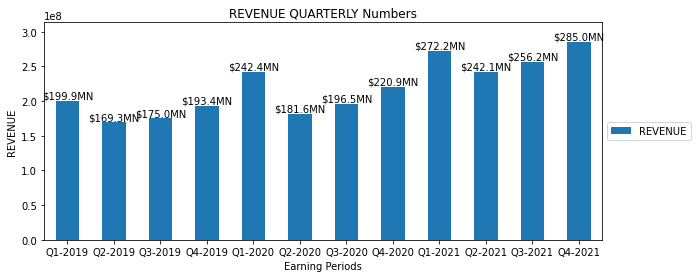

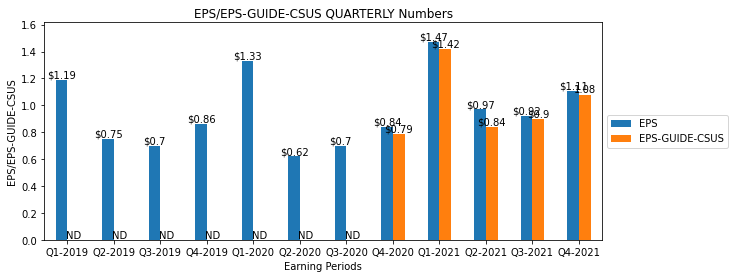

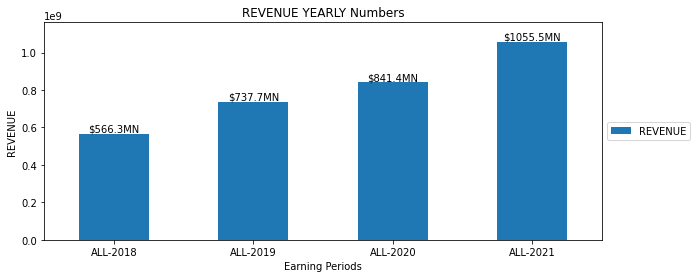

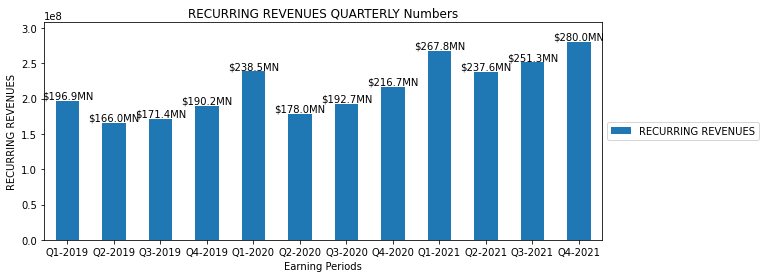

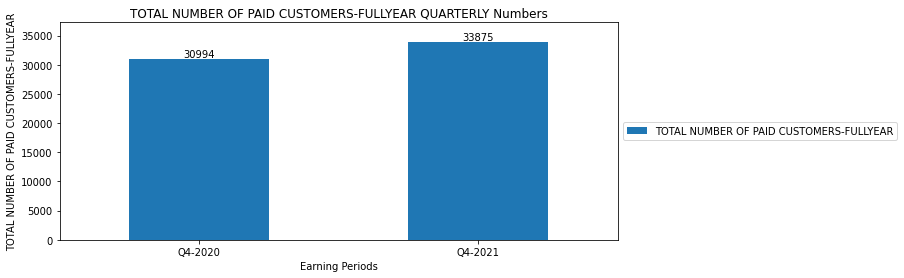

In [456]:
print(file)
if(file and orgData and entities):
    val = getOrgAttr(orgData, "ORGPROFILE|FiscalYearEnd")
    basefile = os.path.basename(file)
    filename = os.path.splitext(basefile)[0]
    edate = None
    #print(filename)
    fsplit = filename.split("-")
    if(len(fsplit) > 3):
        edate = fsplit[1]+"-"+fsplit[2]+"-"+fsplit[3].split("_")[0]
    else:
        fsplit = filename.split("_")
        edate = fsplit[1]
    #args = list()
    #print("EARNING DATE", edate)
    if(val):
        dobj = datetime.strptime(val, "%B")
        fynd = (dobj.month)
        allEntities["QTRS"] = getQtrs(csym, edate, fynd)
        #print(allEntities["QTRS"])
        
    for index,faq in enumerate(faqs):
        nf = False
        allEntities["SELF"] = None
        allEntities["SELF"] = dict()
        #print(faq["ENTITY"])
        for item in faq["ENTITY"]:
            #print(item, faq["ENTITY"][item])
            allEntities["SELF"]["*"+item] = faq["ENTITY"][item]
        if "FUNCTION" in faq:
            allEntities["SELF"]["*FUNCTION"] = faq["FUNCTION"]
        if "ARGS" in faq:
            allEntities["SELF"]["*ARGS"] = faq["ARGS"]
        if "FILTER" in faq:
            allEntities["SELF"]["*FILTER"] = faq["FILTER"]
        if "FILTERTYPE" in faq:
            allEntities["SELF"]["*FILTERTYPE"] = faq["FILTERTYPE"]
        if "FIELDS" in faq:
            allEntities["SELF"]["*FIELDS"] = faq["FIELDS"]
        if "SEARCH" in faq:
            allEntities["SELF"]["*SEARCH"] = faq["SEARCH"]
        if "INDEX" in faq:
            allEntities["SELF"]["*INDEX"] = faq["INDEX"]
        #print(allEntities["SELF"])
        print(str(index+1)+".", faq["Q"])
        ans = (faq["ANS"])
        #print(ans, faq["VARIABLES"])
        if "VARIABLES" not in faq or faq["VARIABLES"] is None:
            template = faq["TEMPLATE"]
            #print(template)
            #print(templates[template]["VARIABLES"])
            variables = templates[template]["VARIABLES"]
        else:
            variables = faq["VARIABLES"]
        for item in variables:
            var = item["VAR"]
            source = item["SOURCE"]
            how = item["HOW"]
            if "FIELD" not in item or item["FIELD"] is None:
                allEntities["SELF"][var] = getAttr(allEntities, source, None)
            else:
                field = item["FIELD"][0]
                if ("*" not in field and var not in allEntities["SELF"] and (how == "EXACT" or how == "TRANSFORMTOSTR")):
                    allEntities["SELF"][var] = getAttr(allEntities, item["SOURCE"], item["FIELD"][0])
                    if(how == "TRANSFORMTOSTR"):
                        allEntities["SELF"][var] = "\n".join(allEntities["SELF"][var])
                    if allEntities["SELF"][var] is None:
                        ans = faq["NF"]
                        print(ans)
                        print("\n")
                        nf = True
                        break
                elif("*" in field and var not in allEntities["SELF"] and (how == "EXACT" or how == "TRANSFORMTOSTR")):
                    #print(field)
                    for ent in allEntities["SELF"]:
                        if(ent in field):
                            field = field.replace(ent, allEntities["SELF"][ent])
                    #field = field.replace("*","")
                    #print(field, var, source)
                    #print(allEntities["ENTITIES"]["Q3-2021"]["REVENUE-RESULT"]["ISBEATSTR"])
                    allEntities["SELF"][var] = getAttr(allEntities, item["SOURCE"], field)
                    if(how == "TRANSFORMTOSTR"):
                        allEntities["SELF"][var] = "\n".join(allEntities["SELF"][var])
                    
                    if allEntities["SELF"][var] is None:
                        ans = faq["NF"]
                        print(ans)
                        print("\n")
                        nf = True
                        break
                elif(how == "APICALL"):
                    func = item["FIELD"][0]
                    if func in allEntities["SELF"]:
                        func = allEntities["SELF"][func]
                        #print(func)
                    args = item["FIELD"][1]
                    if args in allEntities["SELF"]:
                        args = allEntities["SELF"][args]
                    if not args:
                        ans = faq["NF"]
                        print(ans)
                        print("\n")
                        nf = True
                        break
                    for i,v in enumerate(args):
                        #if "*" in args[i] and args[i] in allEntities["SELF"]:
                        if "*" in args[i] and args[i] in allEntities["SELF"]:
                            #print(args[i])
                            args[i] = allEntities["SELF"][args[i]]
                            #print(args[i])
                    #print(args)
                    if not func or not args:
                        ans = faq["NF"]
                        print(ans)
                        print("\n")
                        nf = True
                        break
                    allEntities["SELF"][var] = wfunc(func, args)
                #print(field)
                #print(item["VAR"], item["SOURCE"], item["FIELD"][0], getAttr(allEntities, item["SOURCE"], item["FIELD"][0]))
        
        if not nf:
            if ans and ans != "*CHART" and ans != "*FRAME":
                for ent in allEntities["SELF"]:
                    if(ent in ans):
                        ans = ans.replace(ent, allEntities["SELF"][ent])
                #ans = ans.replace("*","")
                print(ans)
            elif ans and ans == "*CHART":
                if(allEntities["SELF"]["*GDATA"]):
                    showGraph(allEntities["SELF"]["*GDATA"])
                else:
                    print("Not enough information is available.")
            elif ans and ans == "*FRAME":
                print(allEntities["SELF"]["*FRAME"])
        
            print("\n")
            #print(allEntities["SELF"])

Text(0, 0.5, 'Revenue')

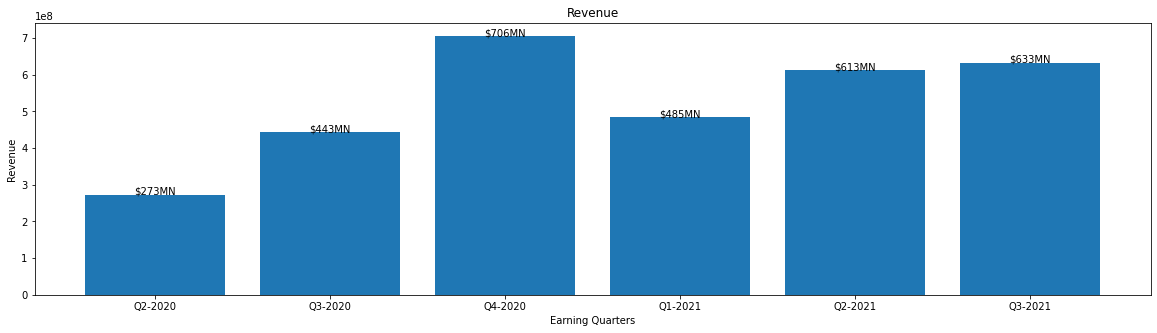

In [65]:
import matplotlib.pyplot as plt
import numpy as np
revenue = {"Q2-2020":273000000,"Q3-2020":443000000,"Q4-2020":706000000,"Q1-2021":485000000,"Q2-2021":613000000,"Q3-2021":633000000}
revtext = {"Q2-2020":"$273MN","Q3-2020":"$443MN","Q4-2020":"$706MN","Q1-2021":"$485MN","Q2-2021":"$613MN","Q3-2021":"$633MN"}
keys = revenue.keys()
#print(keys)
values = revenue.values()
plt.figure(figsize = (20,5))
plt.bar(keys, values, align='center')
for item in revenue:
    if(item in revtext):
        plt.text(item, revenue[item], (revtext[item]), ha = 'center')
#plt.bar(X_axis + 0.2, values, align='center')
plt.title("Revenue")
plt.xlabel("Earning Quarters")
plt.ylabel("Revenue")

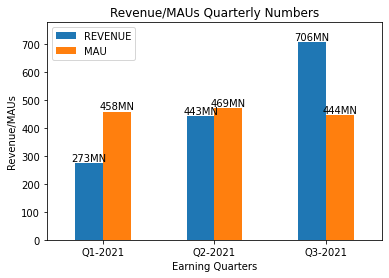

In [66]:
import pandas as pd
revenue = [273,443,706]
revenuetxt = ["273MN","443MN","706MN"]
mau = [458,469,444]
mautxt = ["458MN","469MN","444MN"]
index = ["Q1-2021","Q2-2021","Q3-2021"]
#print(revenue,mau,index)

df = pd.DataFrame(data={'REVENUE': revenue, 'MAU': mau}, index=index)
ax = df.plot(kind='bar', rot=0, xlabel='Earning Quarters', ylabel='Revenue/MAUs', title='Revenue/MAUs Quarterly Numbers', figsize=(6, 4))
for c in ax.containers:
    # set the bar label
    clbl = (c.get_label())
    if(clbl == "REVENUE"):
        ax.bar_label(c, labels=revenuetxt, fmt='%.0f', label_type='edge')
    else:
        ax.bar_label(c, labels=mautxt, fmt='%.0f', label_type='edge')

ax.margins(y=0.1)

{'DATA': {'REVENUE': [1142761000, 1692658000]}, 'TEXT': {'REVENUE': ['$1BN', '$2BN']}, 'INDEX': ['ALL-2019', 'ALL-2020'], 'FIELDS': ['REVENUE'], 'CALENDAR': 'Yearly'}


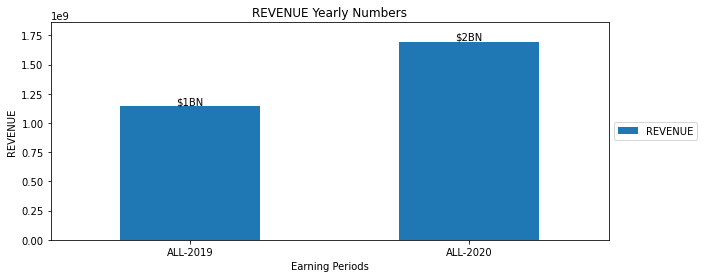

In [67]:
args = list()
args.append(allEntities["ENTITIES"])
#args.append("Q\d+-[0-9][0-9][0-9][0-9]")
args.append("ALL-[0-9][0-9][0-9][0-9]")
#fields = ["REVENUE","GLOBAL MONTHLY ACTIVE USERS"]
#fields = ["REVENUE-GUIDE-CSUS","REVENUE"]
fields = ["REVENUE"]
args.append(fields)
args.append("Yearly")
#args.append(8)
gData = getTableData(args)
print(gData)
showGraph(gData)

['GLOBAL MONTHLY ACTIVE USERS',
 'REVENUE - GLOBAL',
 'REVENUE - UNITED STATES',
 'REVENUE - INTERNATIONAL',
 'MONTHLY ACTIVE USERS - GLOBAL',
 'MONTHLY ACTIVE USERS - UNITED STATES',
 'MONTHLY ACTIVE USERS - INTERNATIONAL',
 'ACTIVE REVENUE PER USER - GLOBAL',
 'ACTIVE REVENUE PER USER - UNITED STATES',
 'ACTIVE REVENUE PER USER - INTERNATIONAL']

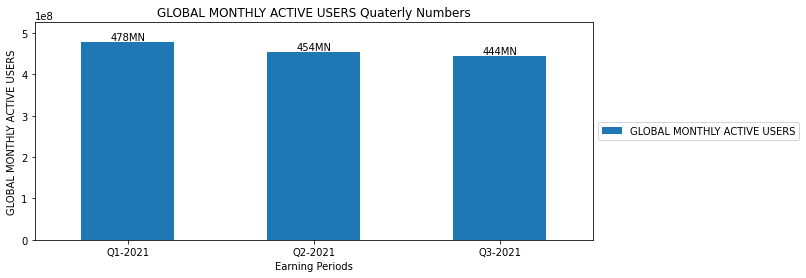

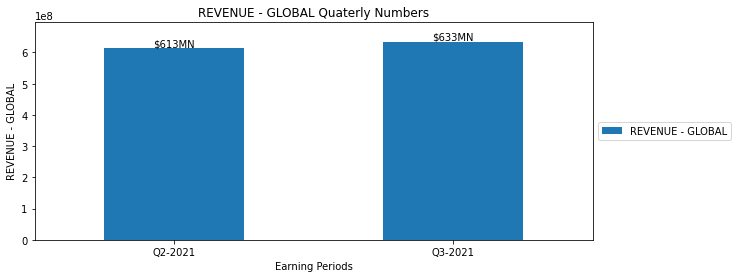

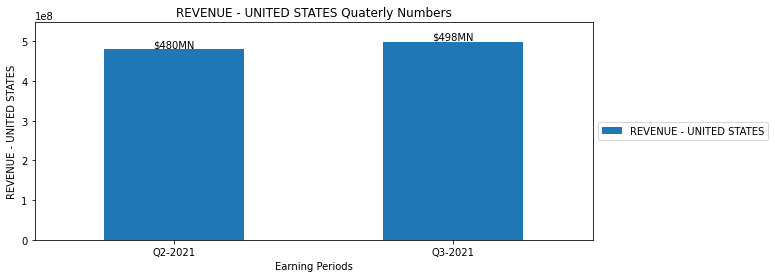

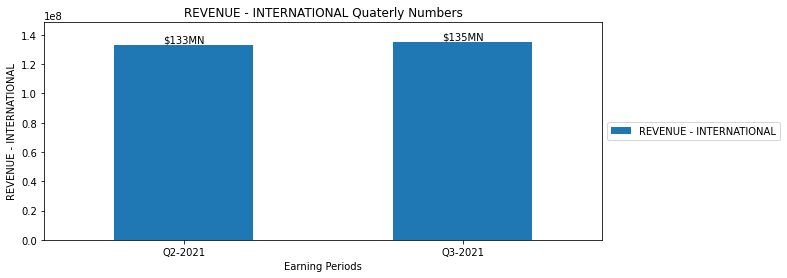

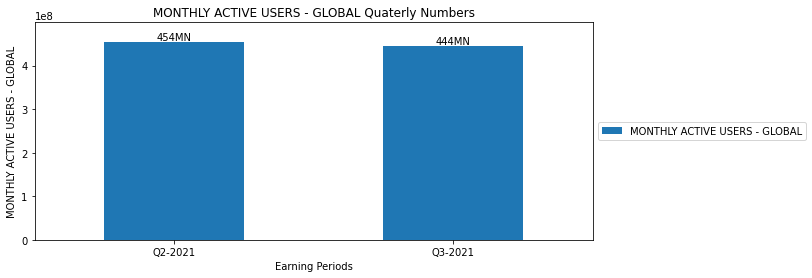

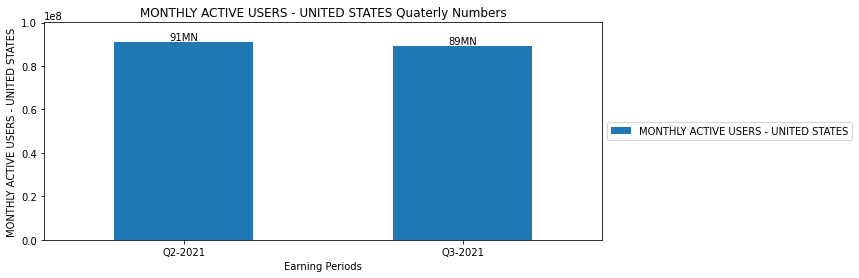

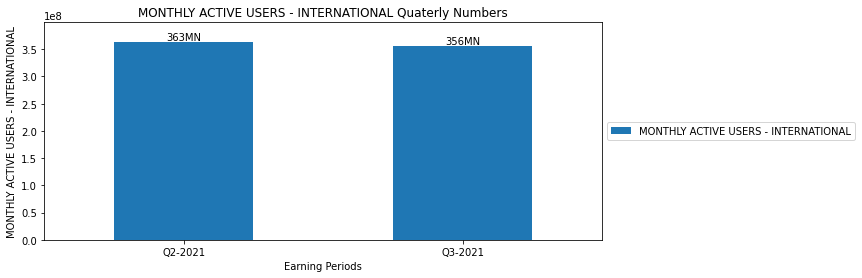

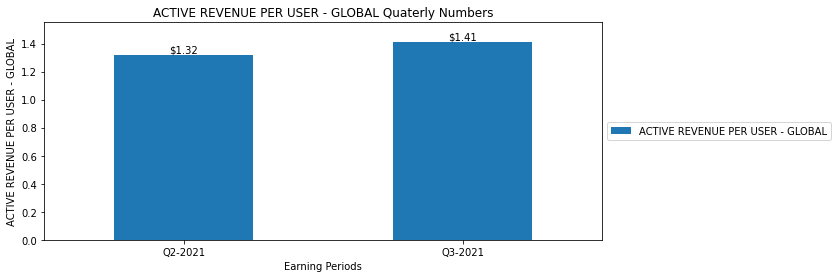

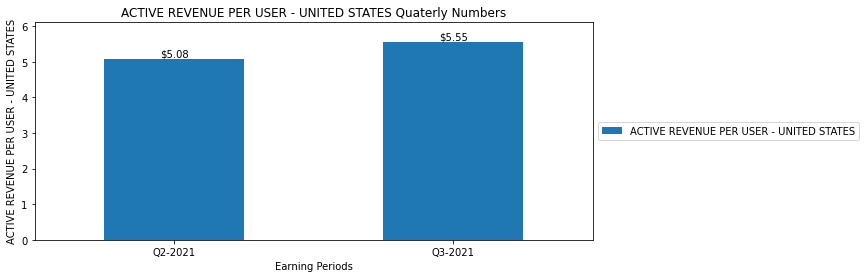

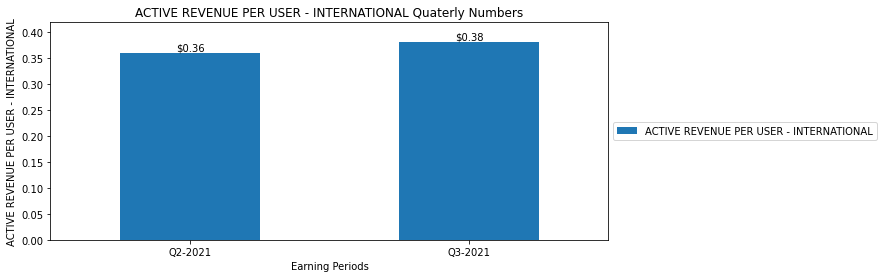

In [68]:
#args.append("ALL-[0-9][0-9][0-9][0-9]")
#fields = ["REVENUE","GLOBAL MONTHLY ACTIVE USERS"]
#fields = ["REVENUE-GUIDE-CSUS","REVENUE"]
args = list()
args.append(allEntities["ENTITIES"])
args.append("Q\d+-[0-9][0-9][0-9][0-9]")
args.append("Quaterly")
args.append("TEXT-METRICTYPE")
args.append("OPMETRIC")
showGraphWithCondition(args)

In [69]:
attr = getAttr(allEntities, "ORGDATA", "MAJORTRANS|ROSTERS")
#print(attr)
df = pd.read_json(attr)
#print(df)
index = "Individual or Entity"
search = "Most Recent Transaction"
df[index] = df[index].str.upper()
#print(df["Holder"])

newdf = df[df[search].str.contains("|".join(["Purchase","Sale"]))]
newdf = newdf.set_index(index)
#print(len(newdf))
if(len(newdf) > 0):
    print(newdf)
#print(df)

                                         Most Recent Transaction  \
Individual or Entity                                               
FLORES CHRISTINEGENERAL COUNSEL                             Sale   
GAVINI NAVEENOFFICER                                        Sale   
MORGENFELD TODD RCHIEF FINANCIAL OFFICER                    Sale   
YANG TSELI LILYOFFICER                                      Sale   

                                                  Date  \
Individual or Entity                                     
FLORES CHRISTINEGENERAL COUNSEL           Jun 27, 2021   
GAVINI NAVEENOFFICER                      Sep 12, 2021   
MORGENFELD TODD RCHIEF FINANCIAL OFFICER  Jun 27, 2021   
YANG TSELI LILYOFFICER                    Aug 26, 2021   

                                         Shares Owned as of Transaction Date  
Individual or Entity                                                          
FLORES CHRISTINEGENERAL COUNSEL                                       294872  
GAVIN